## import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
mpl.rc('axes', unicode_minus=False)
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/final_data (1).csv')
df = data.copy()

In [ ]:
df = df.drop(columns=['Unnamed: 0','거래일'])

# 1. Preprocessing

## 1.1 data type

In [ ]:
df.tail(3)

지역코드  법정동      아파트      지번  ...        NG         GC        HG         CL
244453  강동구  암사동    중앙하이츠  493-14  ...  2.948692  42.433846  3.707885  78.786154
244454  강동구  암사동  롯데캐슬퍼스트   414-2  ...  2.948692  42.433846  3.707885  78.786154
244455  강동구  천호동       삼성     528  ...  2.948692  42.433846  3.707885  78.786154

[3 rows x 46 columns]

In [ ]:
num_feature = ['세대','인구','자동차등록','인구이동(전입지별)',
               '출생아수(명)', '사망자수(명)' ,'혼인건수(건)','이혼건수(건)']
for col in num_feature:
  df[col] = df[col].str.replace(",","").astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244456 entries, 0 to 244455
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지역코드         244456 non-null  object 
 1   법정동          244456 non-null  object 
 2   아파트          244456 non-null  object 
 3   지번           244336 non-null  object 
 4   전용면적         244456 non-null  float64
 5   층            244456 non-null  int64  
 6   건축년도         244456 non-null  int64  
 7   거래금액         244456 non-null  int64  
 8   거래년도         244456 non-null  int64  
 9   거래월일         244456 non-null  object 
 10  세대           244456 non-null  int64  
 11  인구           244456 non-null  int64  
 12  세대당인구        244456 non-null  float64
 13  자동차등록        244456 non-null  int64  
 14  인구이동(전입지별)   244456 non-null  int64  
 15  외국인증권투자      244456 non-null  float64
 16  국고채 3년(평균)   244456 non-null  float64
 17  국고채 5년(평균)   244456 non-null  float64
 18  국고채 10년(평균)  244456 non-

# 2. Exploratory Data Analysis

## 2.1 거래금액 순위

In [ ]:
df['평당가'] = df['거래금액'] / df['전용면적']
df['거래횟수'] = [1]*len(df.index)
df

지역코드  법정동        아파트      지번  ...        HG         CL          평당가  거래횟수
0       종로구  내수동  경희궁의아침2단지      71  ...  3.315405  75.536190   923.426623     1
1       종로구  내수동  경희궁 파크팰리스      95  ...  3.315405  75.536190   925.122868     1
2       종로구  내수동  경희궁의아침3단지      72  ...  3.315405  75.536190   958.336717     1
3       종로구  내수동      세종로대우     167  ...  3.315405  75.536190   813.918757     1
4       종로구  내수동      세종로대우     167  ...  3.315405  75.536190   834.855205     1
...     ...  ...        ...     ...  ...       ...        ...          ...   ...
244451  강동구  성내동         로얄   435-5  ...  3.707885  78.786154   700.317125     1
244452  강동구  성내동  다성이즈빌 아파트  434-13  ...  3.707885  78.786154  1285.451197     1
244453  강동구  암사동      중앙하이츠  493-14  ...  3.707885  78.786154   924.059140     1
244454  강동구  암사동    롯데캐슬퍼스트   414-2  ...  3.707885  78.786154  1498.528231     1
244455  강동구  천호동         삼성     528  ...  3.707885  78.786154  1403.274307     1

[244456 rows x 48 columns]

### 2.1.1 거래횟수 순위

In [ ]:
거래횟수랭킹 = pd.concat([df.groupby('아파트').mean()[['거래금액','거래년도']].sort_values('거래금액',ascending=False),
                          df.groupby('아파트').sum()[['거래횟수']]],
                          axis = 1)
거래횟수랭킹20 = 거래횟수랭킹[거래횟수랭킹.거래횟수>10].head(20)
거래횟수랭킹20
#2018년부터 거래횟수가 10회를 넘는 아파트들만 

거래금액         거래년도  거래횟수
한남더힐                         449567.829457  2018.790698   258
현대2차(10,11,20,23,24,25동)     414434.782609  2019.304348    46
현대7차(73~77,82,85동)           405470.000000  2019.340000    50
갤러리아 포레                      397774.031250  2019.171875    64
반포 주공1단지                     378880.513333  2018.973333   150
신현대11차                       371887.500000  2019.200000    40
현대6차(78~81,83,84,86,87동)     362750.000000  2019.241935    62
현대1차(12,13,21,22,31,32,33동)  361028.125000  2019.270833    48
현대4차저층(51~56동)               339566.666667  2018.750000    12
아크로리버파크                      316992.857143  2019.088670   203
래미안 신반포 리오센트                 311923.076923  2019.923077    13
신현대12차                       310508.450704  2019.408451    71
래미안퍼스티지                      301766.111111  2019.122222   270
삼성서초가든스위트                    300035.714286  2018.928571    14
개포우성2                        292064.102564  2019.153846    39
미성1차                         287450.000000  2019.450000    20
선경2차(8동-12동)                 284483.928571  2018.964286    28
반포래미안아이파크                    282224.137931  2019.637931    58
래미안대치팰리스                     280795.138889  2018.875000   144
개포우성1                        280793.478261  2019.065217    46

In [ ]:
거래횟수랭킹[거래횟수랭킹.거래횟수>10].reset_index()

index           거래금액         거래년도  거래횟수
0                         한남더힐  449567.829457  2018.790698   258
1     현대2차(10,11,20,23,24,25동)  414434.782609  2019.304348    46
2           현대7차(73~77,82,85동)  405470.000000  2019.340000    50
3                      갤러리아 포레  397774.031250  2019.171875    64
4                     반포 주공1단지  378880.513333  2018.973333   150
...                        ...            ...          ...   ...
2939                   한양아이클래스    9571.395349  2018.860465    43
2940            EG Soul Leader    9318.627451  2019.431373    51
2941                   와이즈플레이스    9255.714286  2019.238095    21
2942                     진명비베레    9054.545455  2019.454545    11
2943                       썬앤빌    7844.285714  2019.000000    28

[2944 rows x 4 columns]

### 2.1.2 거래횟수 순위 시각화


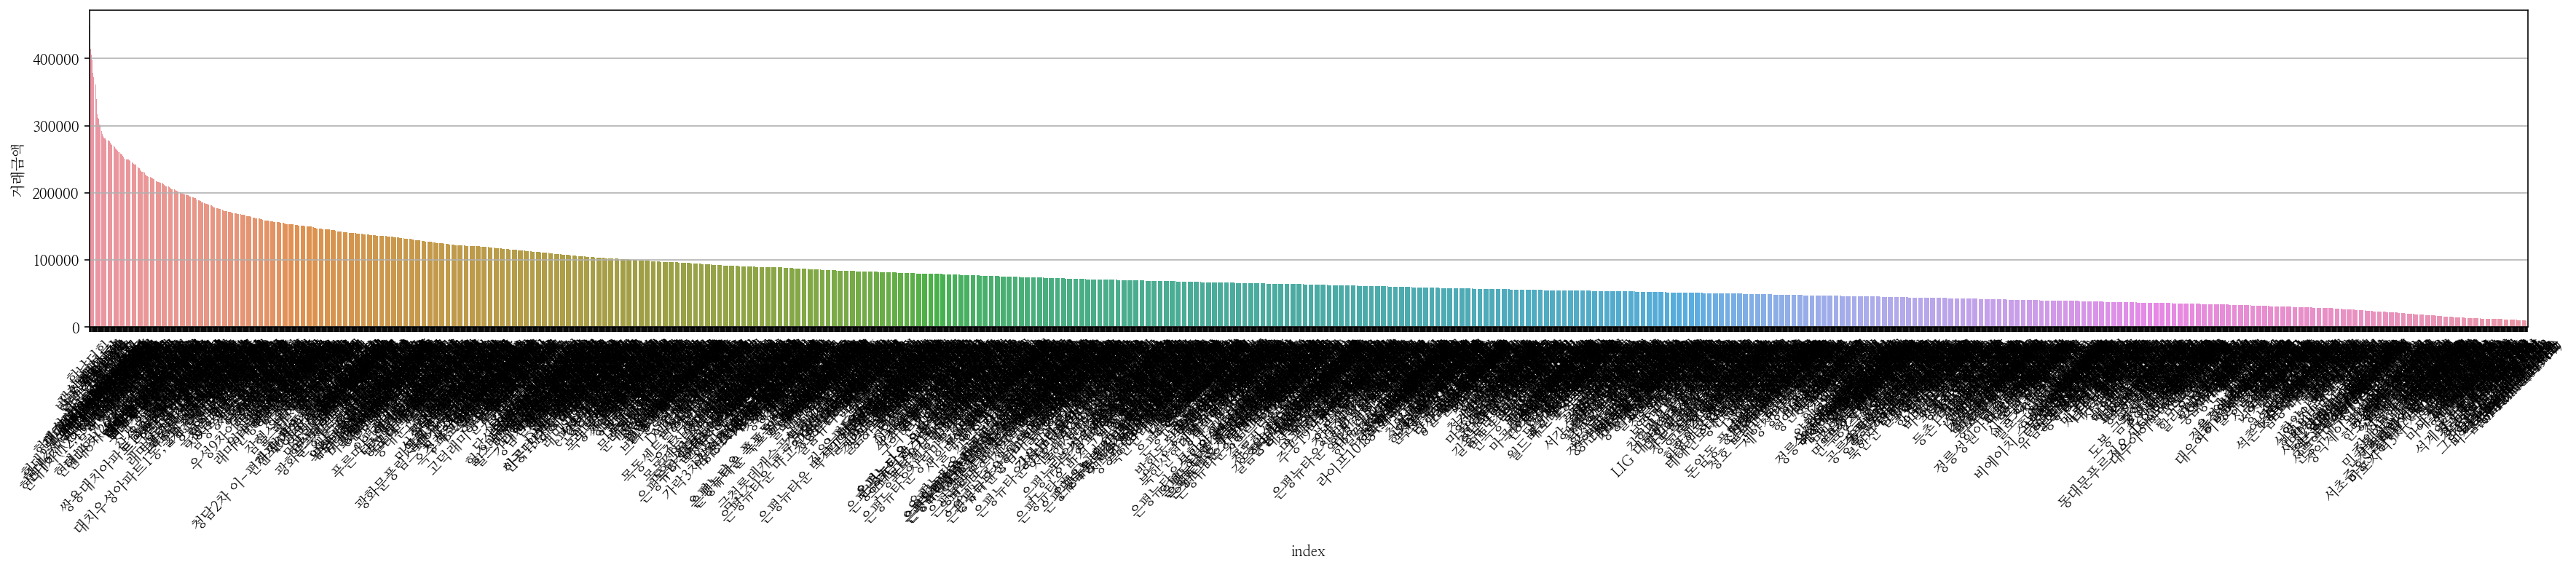

In [ ]:
plt.figure(figsize=(30,4))
plt.xticks(rotation=45)
sns.barplot(x='index',y='거래금액',data=거래횟수랭킹[거래횟수랭킹.거래횟수>10].reset_index())

## ★ 2.2 평당가 순위

In [ ]:
평당가랭킹 = pd.concat([df.groupby('아파트').mean()[['평당가']].sort_values('평당가',ascending=False),
                        df.groupby('아파트').sum()[['거래횟수']]],
                        axis = 1)
평당가랭킹20 = 평당가랭킹[평당가랭킹.거래횟수>10].head(20)
평당가랭킹20

평당가  거래횟수
개포주공 1단지                 4008.672694   315
개포주공 4단지                 3548.223398    17
아크로리버파크                  3371.309559   203
아크로리버뷰신반포                3359.509697    31
반포 주공1단지                 3267.271252   150
디에이치아너힐즈                 3228.870708    34
현대5차(71,72동)             3166.206286    21
청담자이                     3129.974899    79
신반포자이                    3095.721297    39
신반포10                    3075.012122    65
한신(개포)                   3039.201955    30
현대14차(203,204,205,206동)  3007.288666    43
한양1차(영동한양)               2999.999351   124
래미안대치팰리스                 2998.577228   144
에이아이디차관주택                2981.990593   116
신반포8                     2977.724644    51
래미안퍼스티지                  2892.447200   270
현대4차저층(51~56동)           2879.983240    12
래미안블레스티지                 2859.869865   114
트리마제                     2844.421234    73

## ★ 2.3 구별 순위

### 2.3.1 구별 순위

In [ ]:
구별랭킹 = pd.concat([df.groupby('지역코드').mean()[['평당가','거래금액']].sort_values('평당가',ascending=False),                 
                      df.groupby('지역코드').sum()[['거래횟수']]],
                      axis = 1)
구별랭킹
# 평당가랭킹[평당가랭킹.거래횟수>10].head(20)

평당가           거래금액   거래횟수
강남구   1965.900547  172790.735915  12265
서초구   1726.341862  163525.710964   9850
송파구   1423.073380  117229.070079  15240
용산구   1417.798535  145481.003948   4812
성동구   1266.980612   98494.772688   9344
마포구   1191.961147   90848.400701   8842
광진구   1114.909593   93132.966703   4535
동작구   1071.001067   85849.420518   8461
영등포구  1029.975473   78392.765241  10121
강동구   1027.079886   75117.814662  12399
중구    1011.835658   79091.760355   3380
양천구   1000.926721   80106.613279  11507
종로구    946.691028   74959.540149   2142
서대문구   904.409304   68237.382385   8209
강서구    859.112329   61072.219892  15021
동대문구   848.548937   59769.149452   8752
성북구    769.144509   58858.286911  12774
관악구    760.426104   54469.209824   8021
은평구    734.623953   55065.121912   9351
노원구    726.248617   45667.180333  25464
구로구    697.858907   49927.368378  13478
강북구    674.652714   49009.045639   5653
중랑구    657.136930   45164.718913   8243
금천구    634.319841   43204.616049   4860
도봉구    601.020968   41282.194681  11732

In [ ]:
df.head(1)

지역코드  법정동        아파트  지번  ...        HG        CL         평당가  거래횟수
0  종로구  내수동  경희궁의아침2단지  71  ...  3.315405  75.53619  923.426623     1

[1 rows x 48 columns]

### 2.3.2 구별 순위 시각화


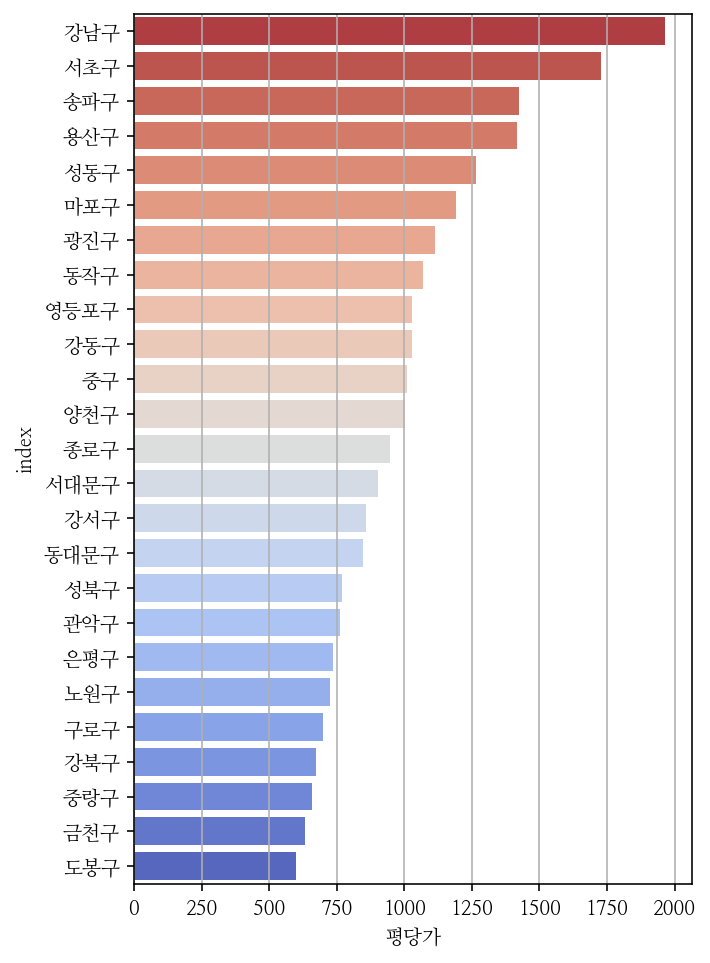

In [ ]:
plt.figure(figsize=(5,8))
sns.barplot(data=구별랭킹.reset_index(),y='index',x='평당가',orient='h',palette='coolwarm_r');
# 서울지도에 색깔넣기

## ★ 2.4 월별 평당가

### 2.4.1 월별 평당가 시각화

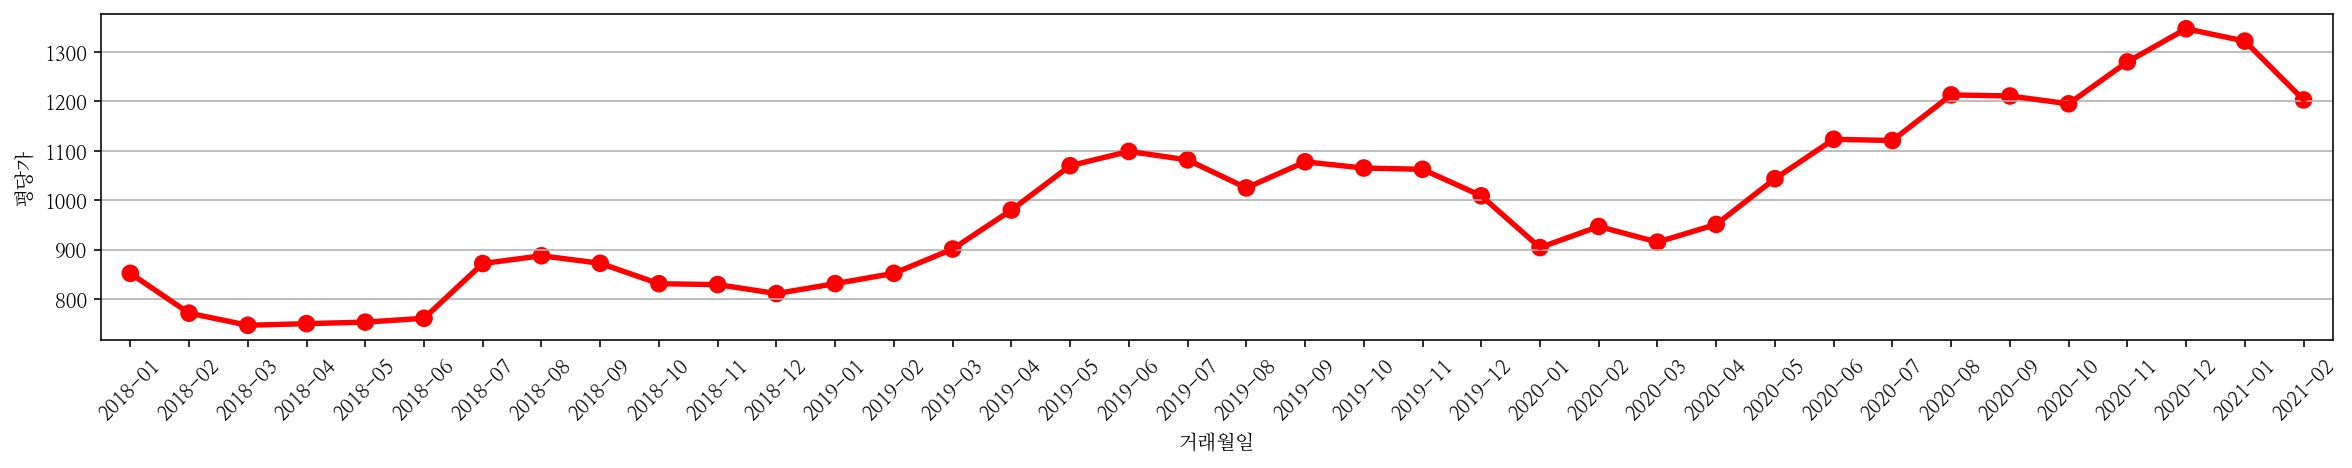

In [ ]:
월별 = df.groupby(['거래월일']).mean()[['평당가','거래금액']].sort_values('거래월일',ascending=True).reset_index()
plt.figure(figsize=(20,3))
plt.xticks(rotation=45)
sns.pointplot(x='거래월일',y='평당가',data=월별,color='red')

## 2.5 시간에따른 변화

In [ ]:
df.groupby('거래월일').mean().iloc[:,3:].head()

거래금액    거래년도        세대  ...         CL         평당가  거래횟수
거래월일                                     ...                             
2018-01  70619.033906  2018.0  179600.0  ...  75.536190  852.238577   1.0
2018-02  61528.813918  2018.0  179600.0  ...  63.177619  771.688384   1.0
2018-03  58725.683707  2018.0  179600.0  ...  62.024091  747.166249   1.0
2018-04  59878.922443  2018.0  179690.0  ...  62.356316  750.464868   1.0
2018-05  58954.411577  2018.0  179690.0  ...  70.189444  753.532624   1.0

[5 rows x 40 columns]

In [ ]:
df_time = df.groupby('거래월일').mean().iloc[:,3:].copy()
df_norm = df_time / df_time.iloc[0] - 1

### 2.5.1 거래월별 지표변화

In [ ]:
df_norm.head()

거래금액  거래년도        세대        인구  ...        HG        CL       평당가  거래횟수
거래월일                                         ...                                    
2018-01  0.000000   0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000   0.0
2018-02 -0.128722   0.0  0.000000  0.000000  ... -0.144491 -0.163611 -0.094516   0.0
2018-03 -0.168416   0.0  0.000000  0.000000  ... -0.154738 -0.178882 -0.123290   0.0
2018-04 -0.152085   0.0  0.000501 -0.003052  ... -0.169435 -0.174484 -0.119419   0.0
2018-05 -0.165177   0.0  0.000501 -0.003052  ... -0.007713 -0.070784 -0.115820   0.0

[5 rows x 40 columns]

In [ ]:
df_norm.columns

Index(['거래금액', '거래년도', '세대', '인구', '세대당인구', '자동차등록', '인구이동(전입지별)', '외국인증권투자',
       '국고채 3년(평균)', '국고채 5년(평균)', '국고채 10년(평균)', '회사채 3년(평균)', 'CD 91물(평균)',
       '콜금리(1일물,평균)', '소비자물가', '- 농축수산물', '- 공업제품', '- 집세', '- 공공서비스',
       '- 개인서비스', '근원물가', '출생아수(명)', '사망자수(명)', '혼인건수(건)', '이혼건수(건)', 'KS11',
       'KQ11', 'DJI', 'IXIC', 'VIX', 'CSI300', 'SSEC', 'DE30', 'FCHI', 'NG',
       'GC', 'HG', 'CL', '평당가', '거래횟수'],
      dtype='object')

### 2.5.2 거래월별 지표변화 시각화

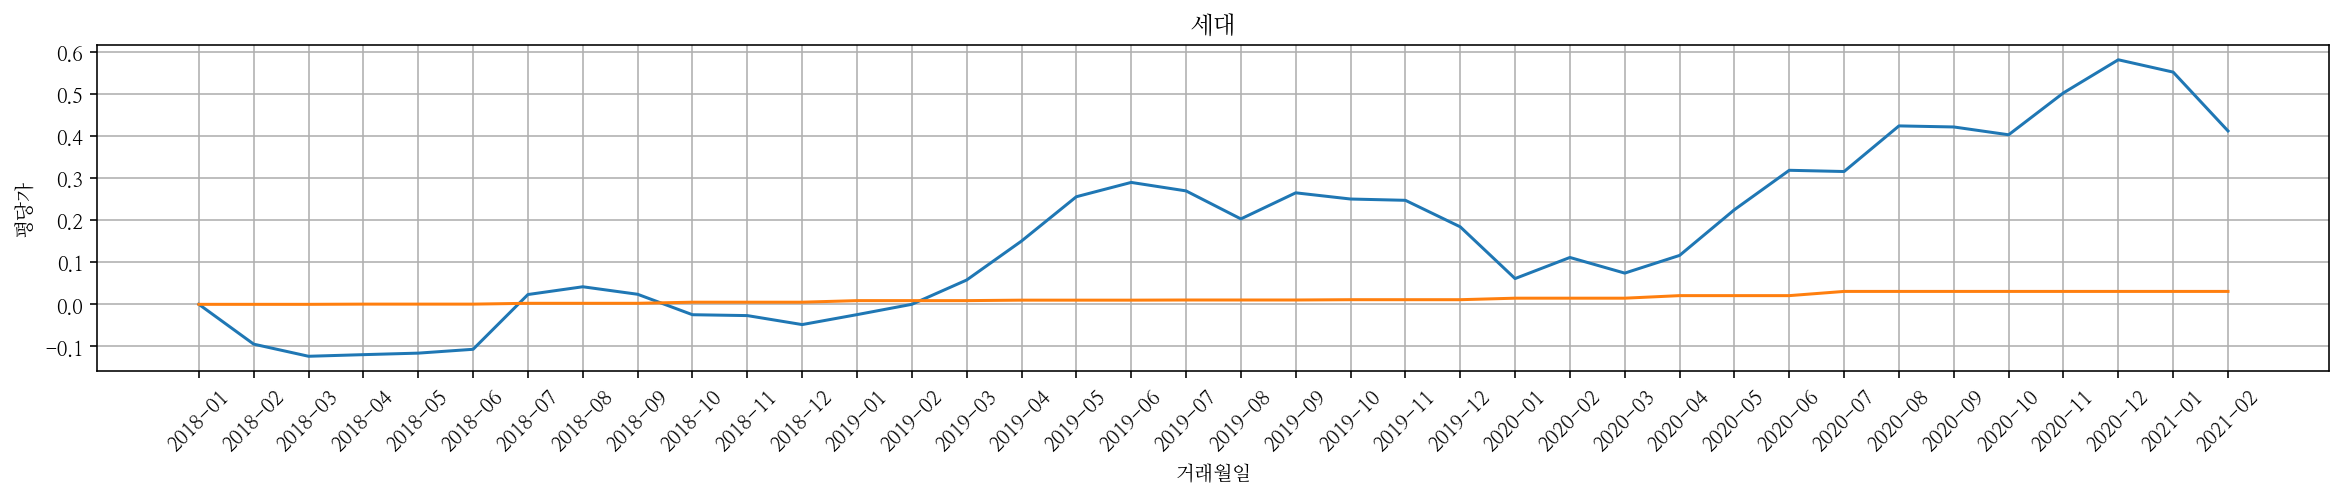

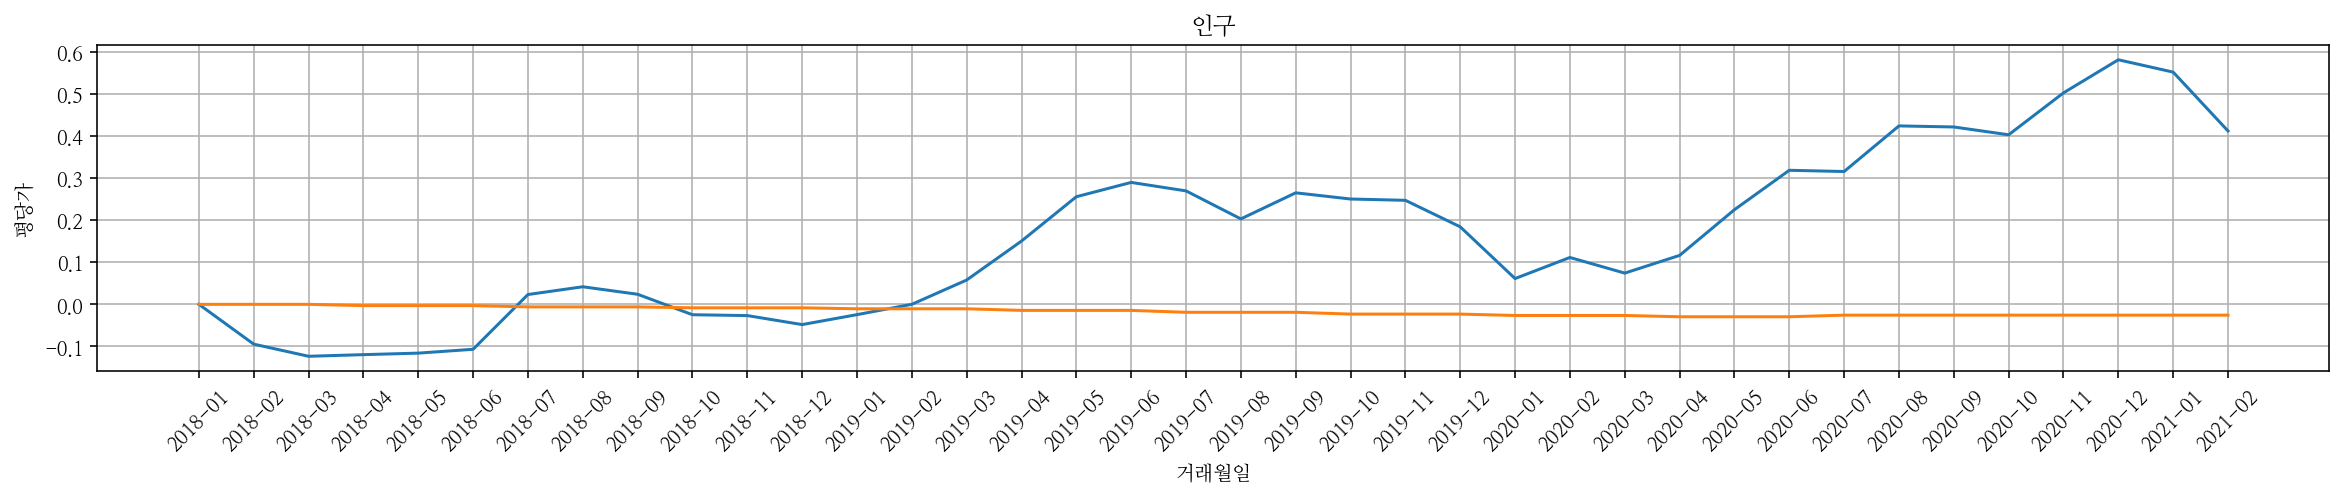

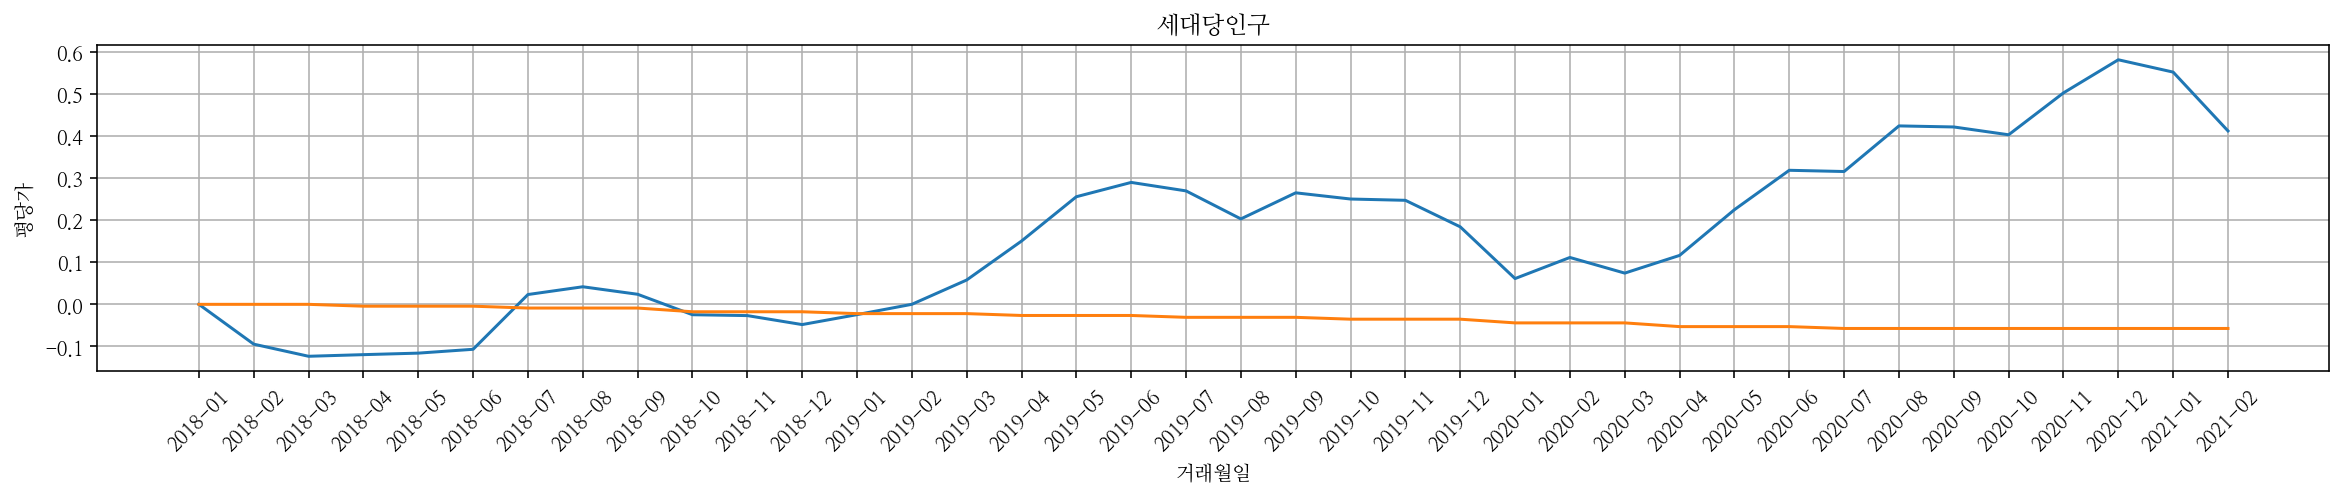

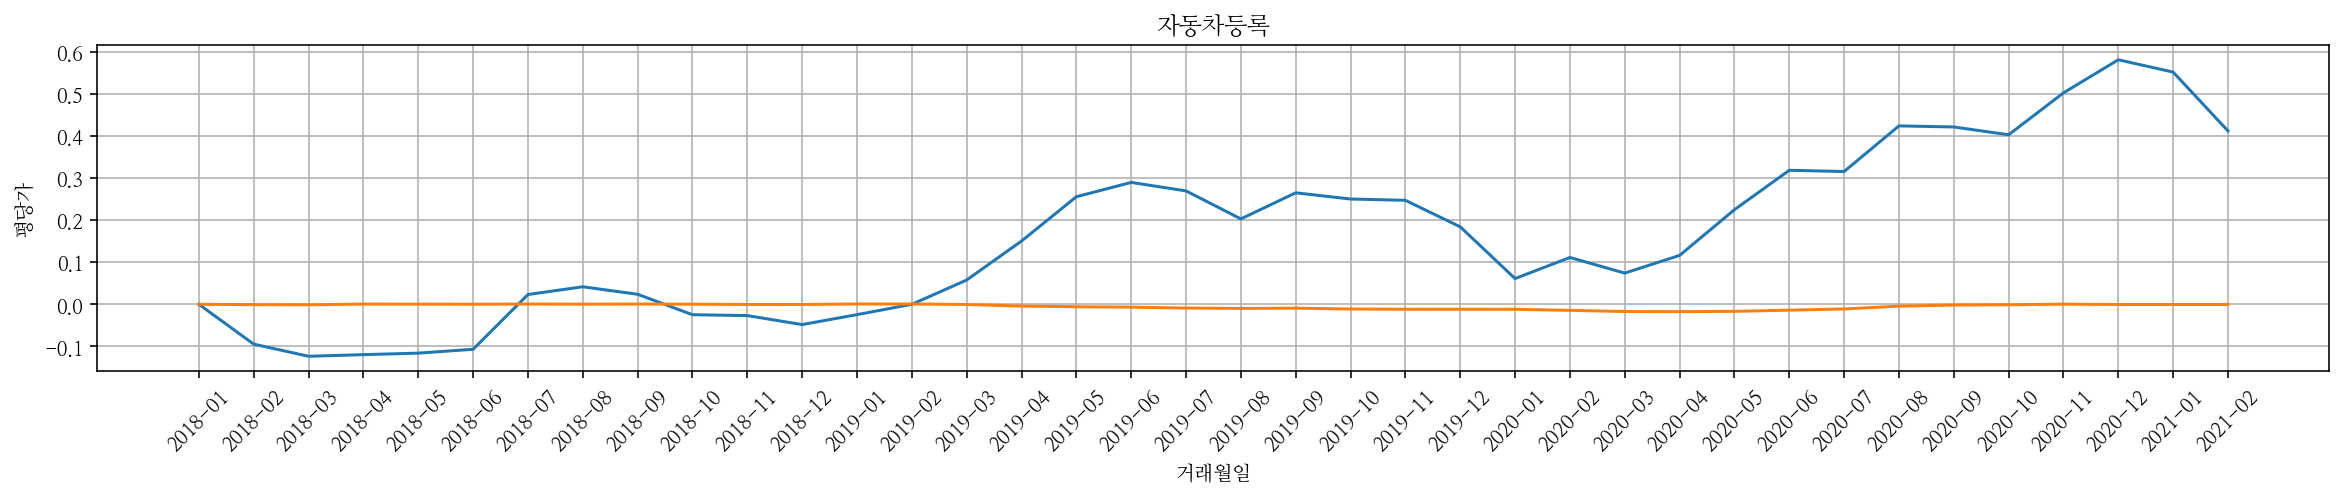

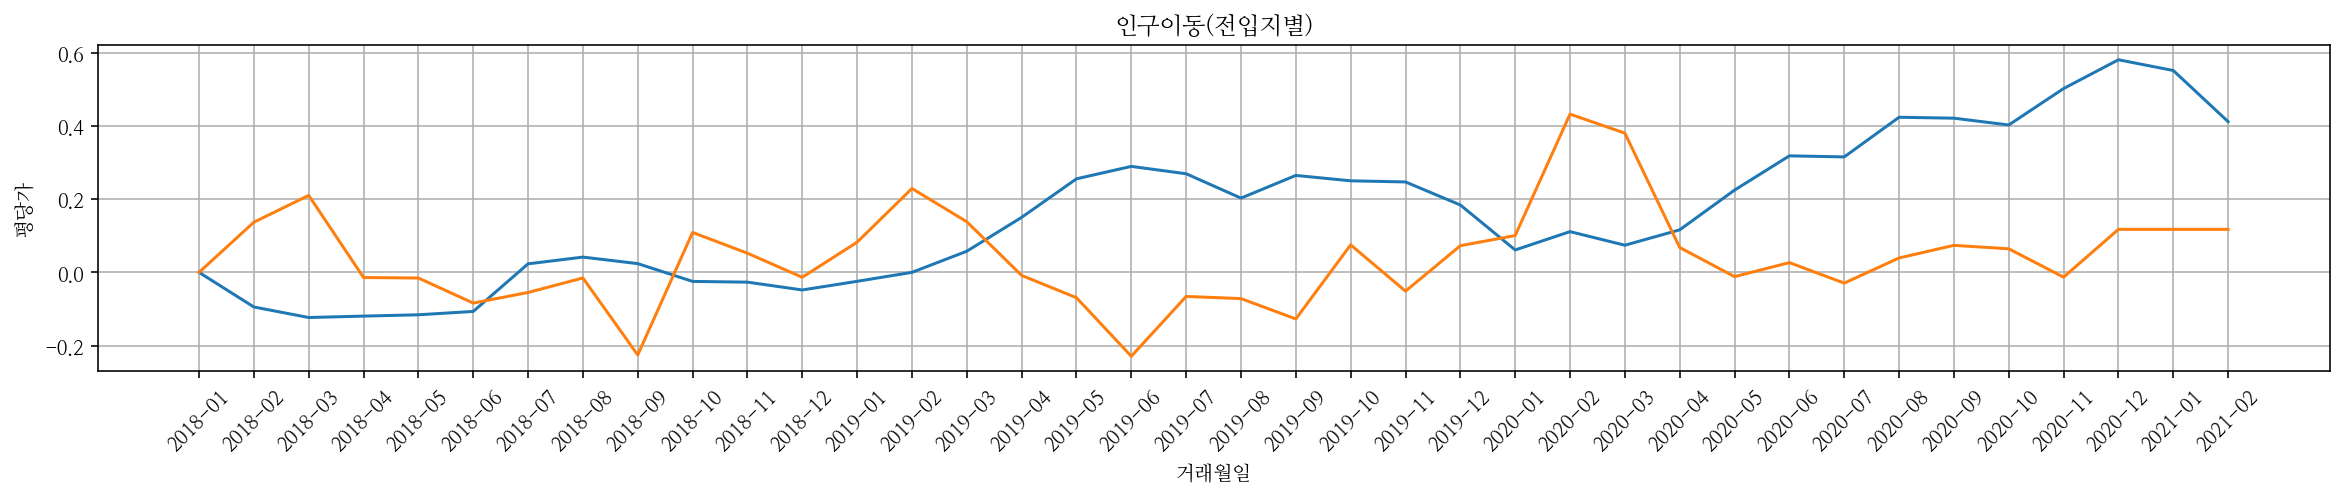

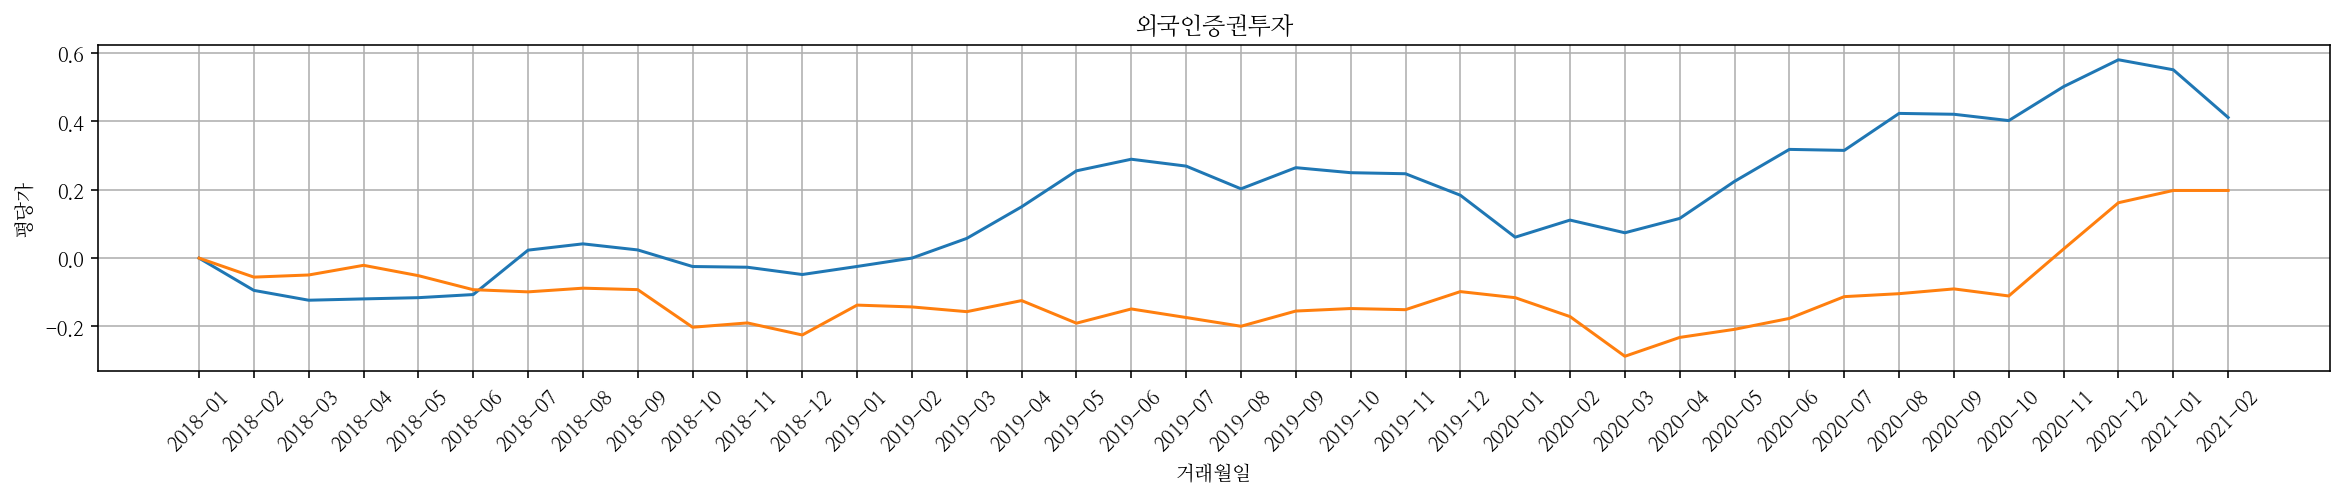

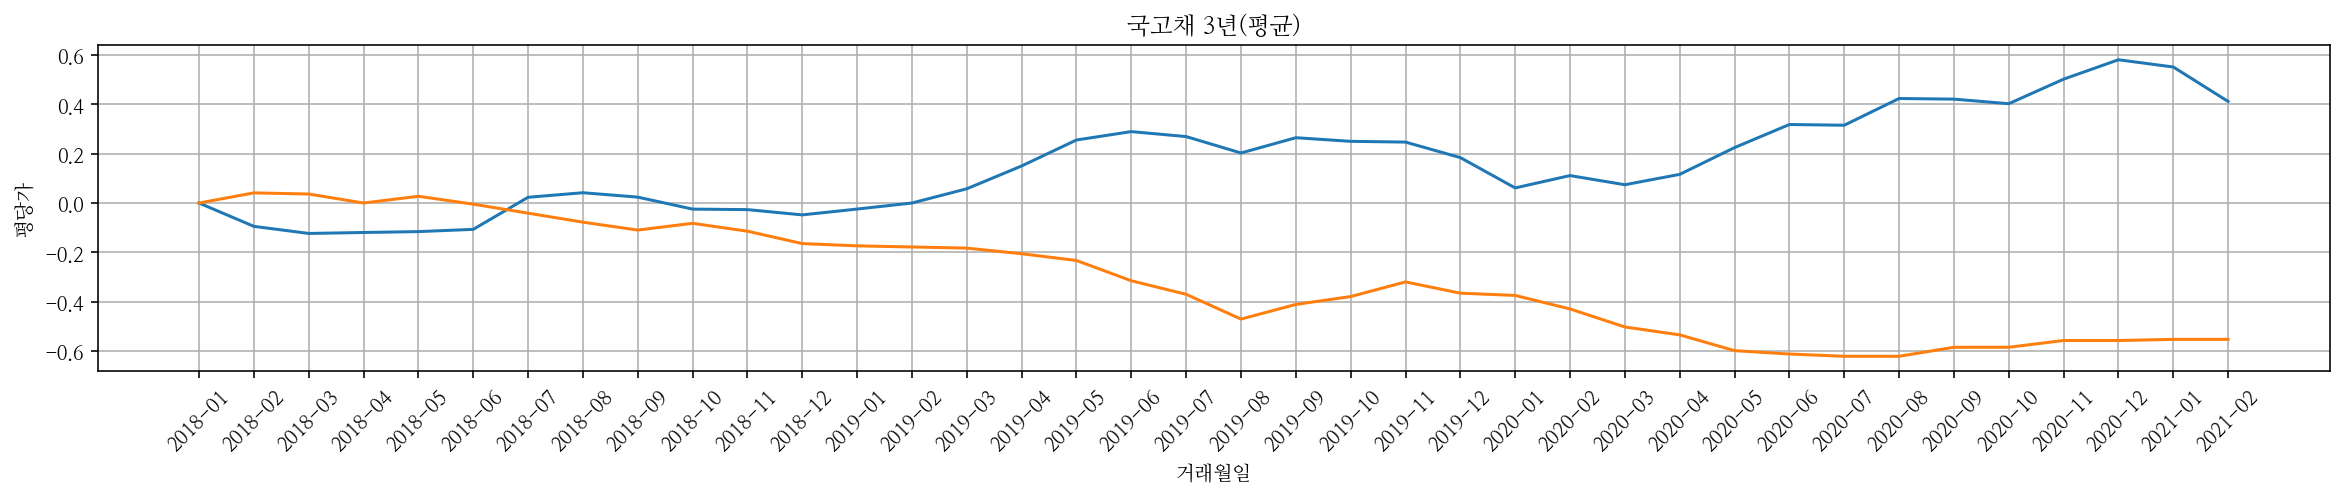

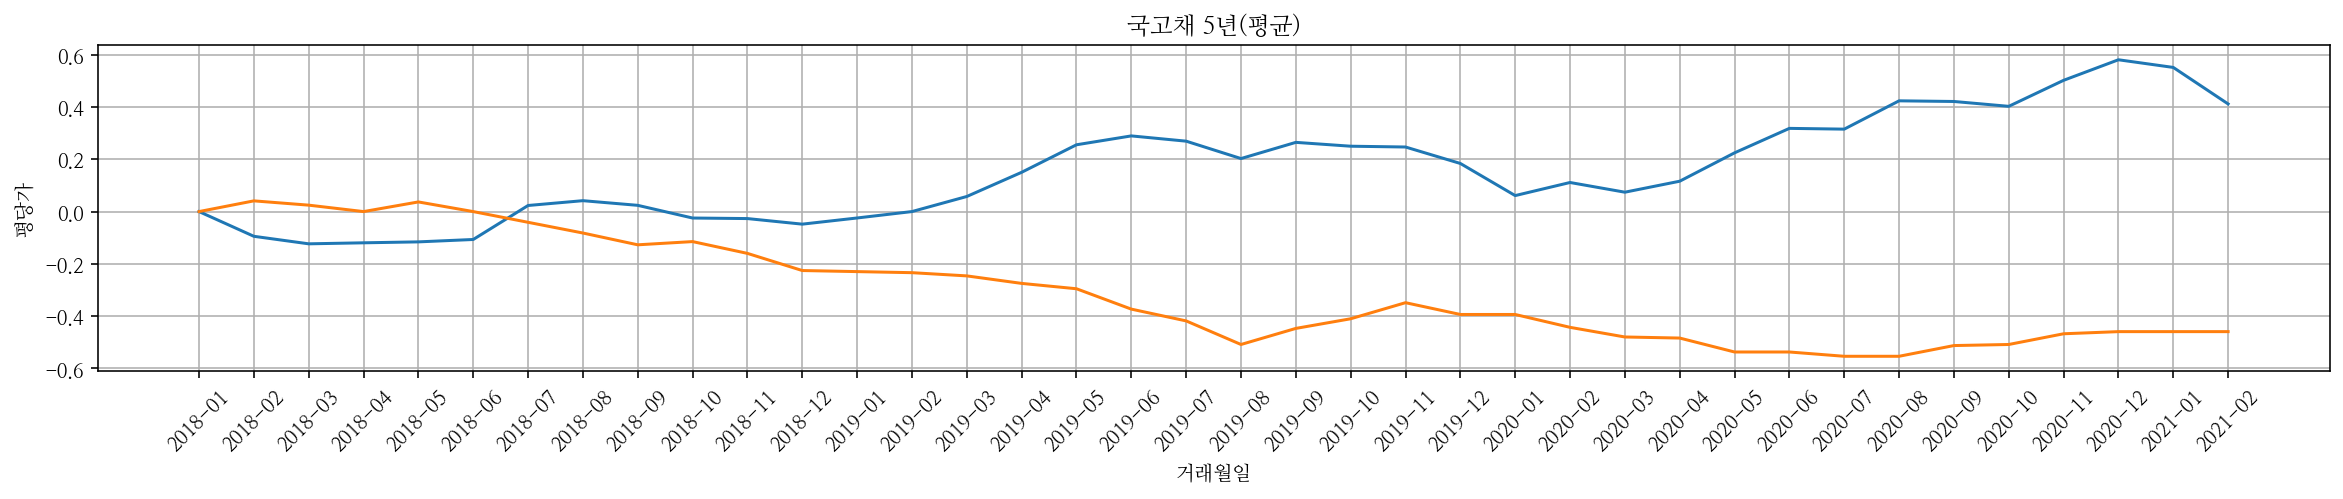

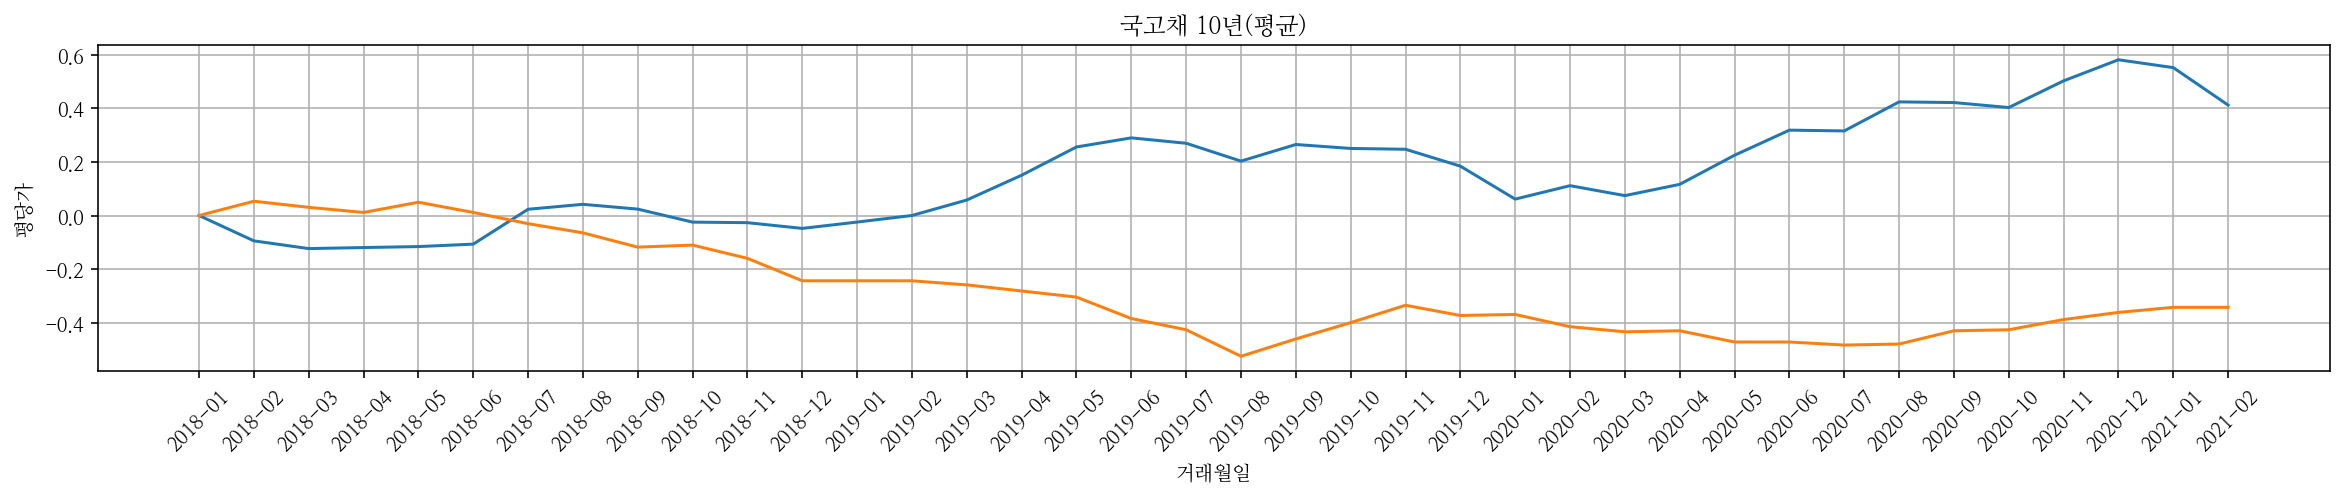

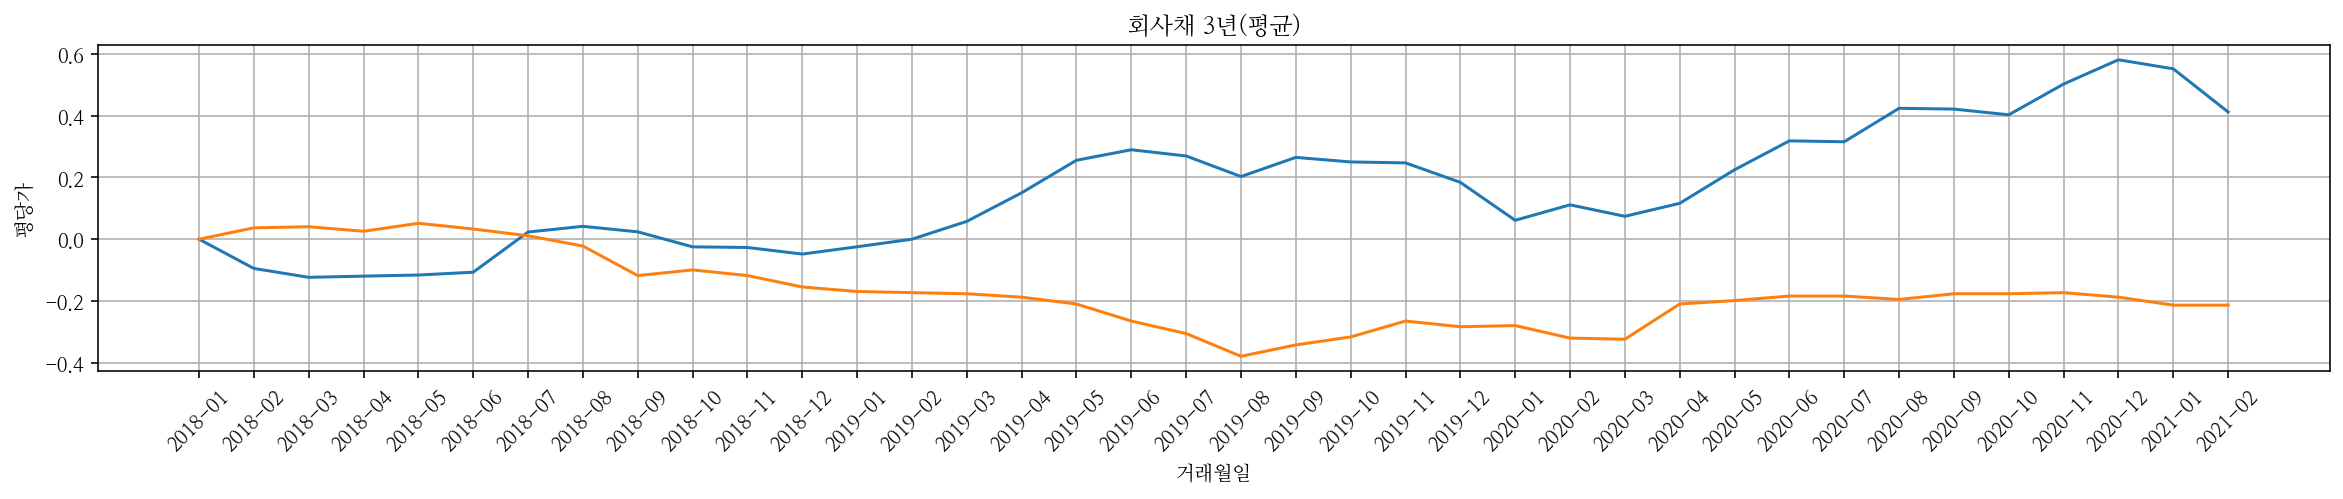

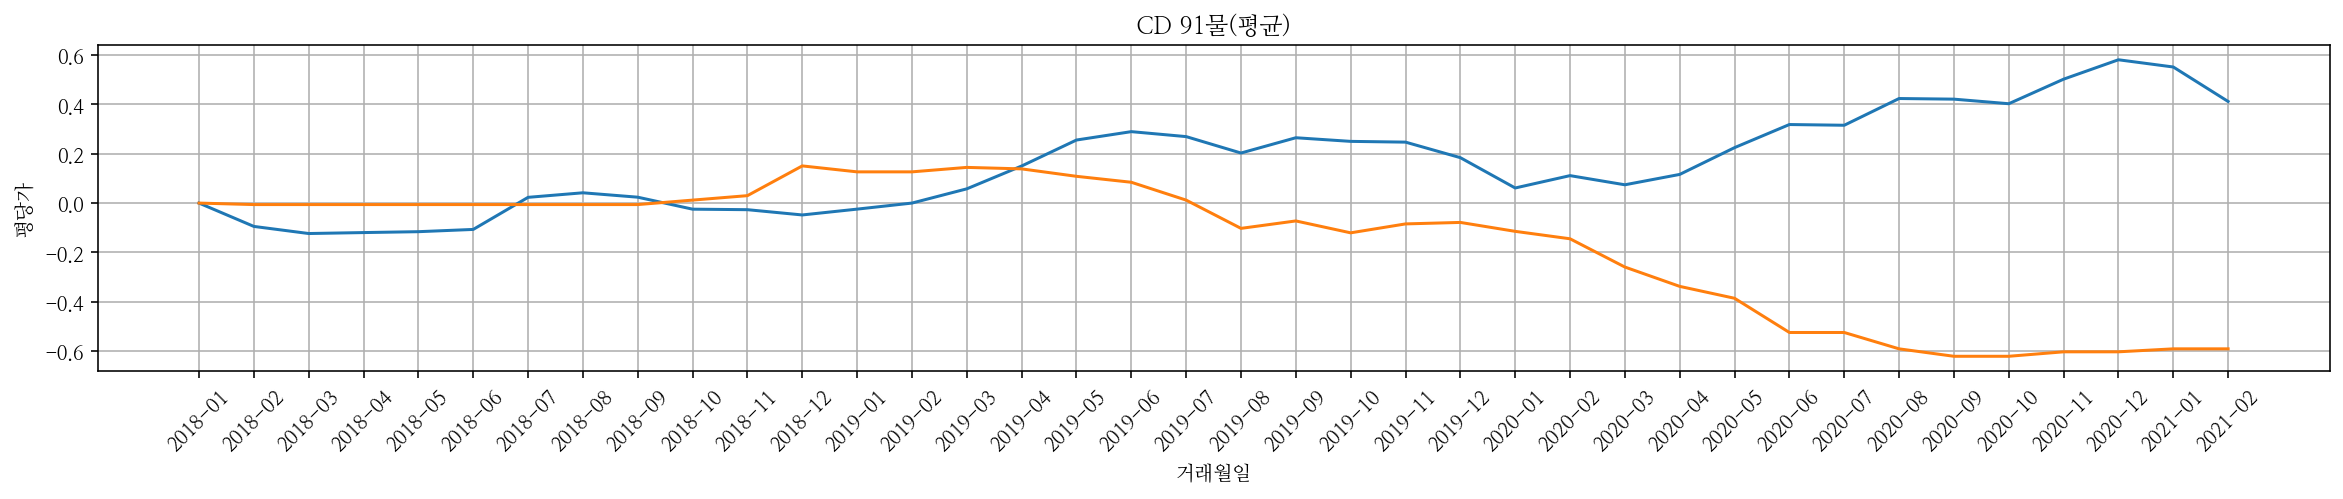

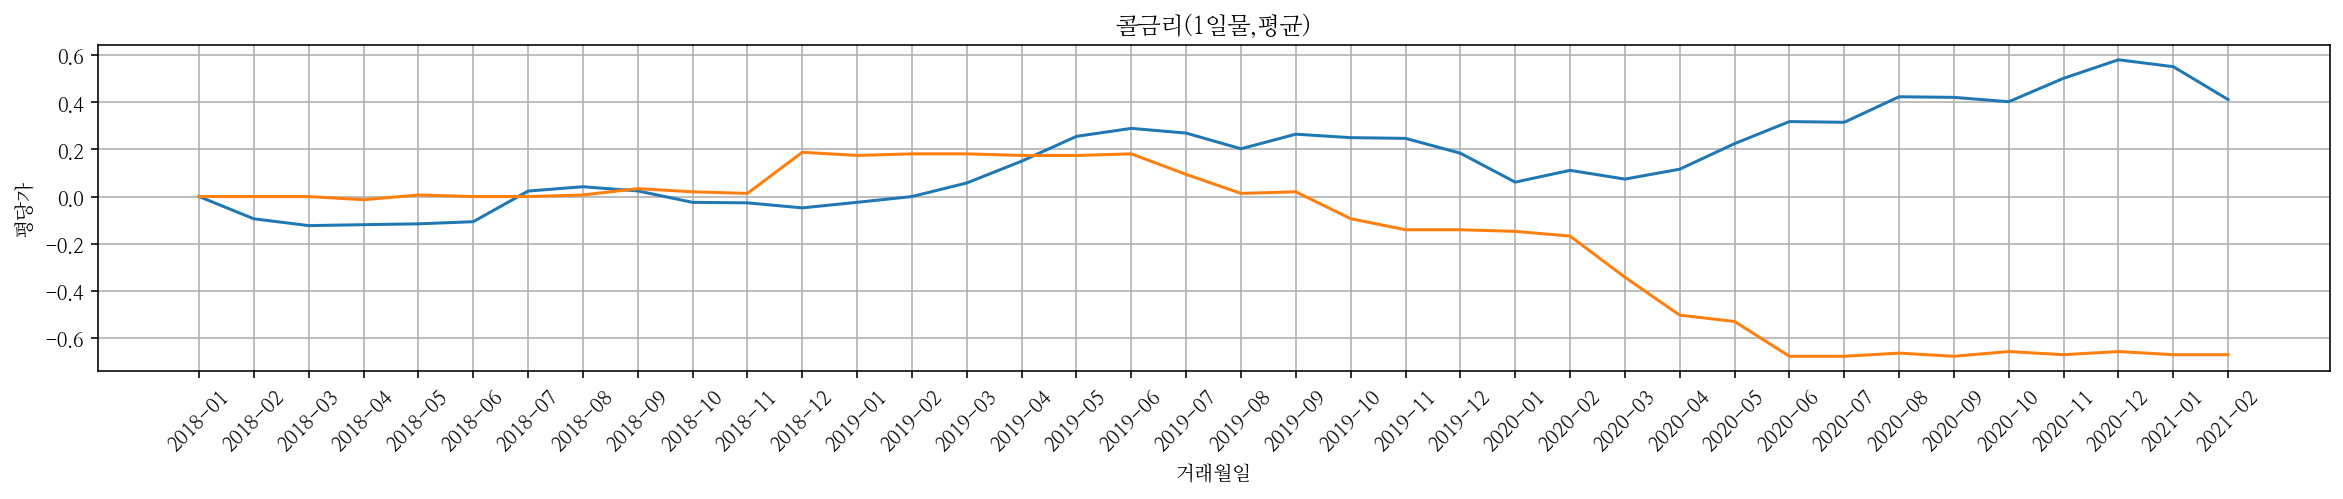

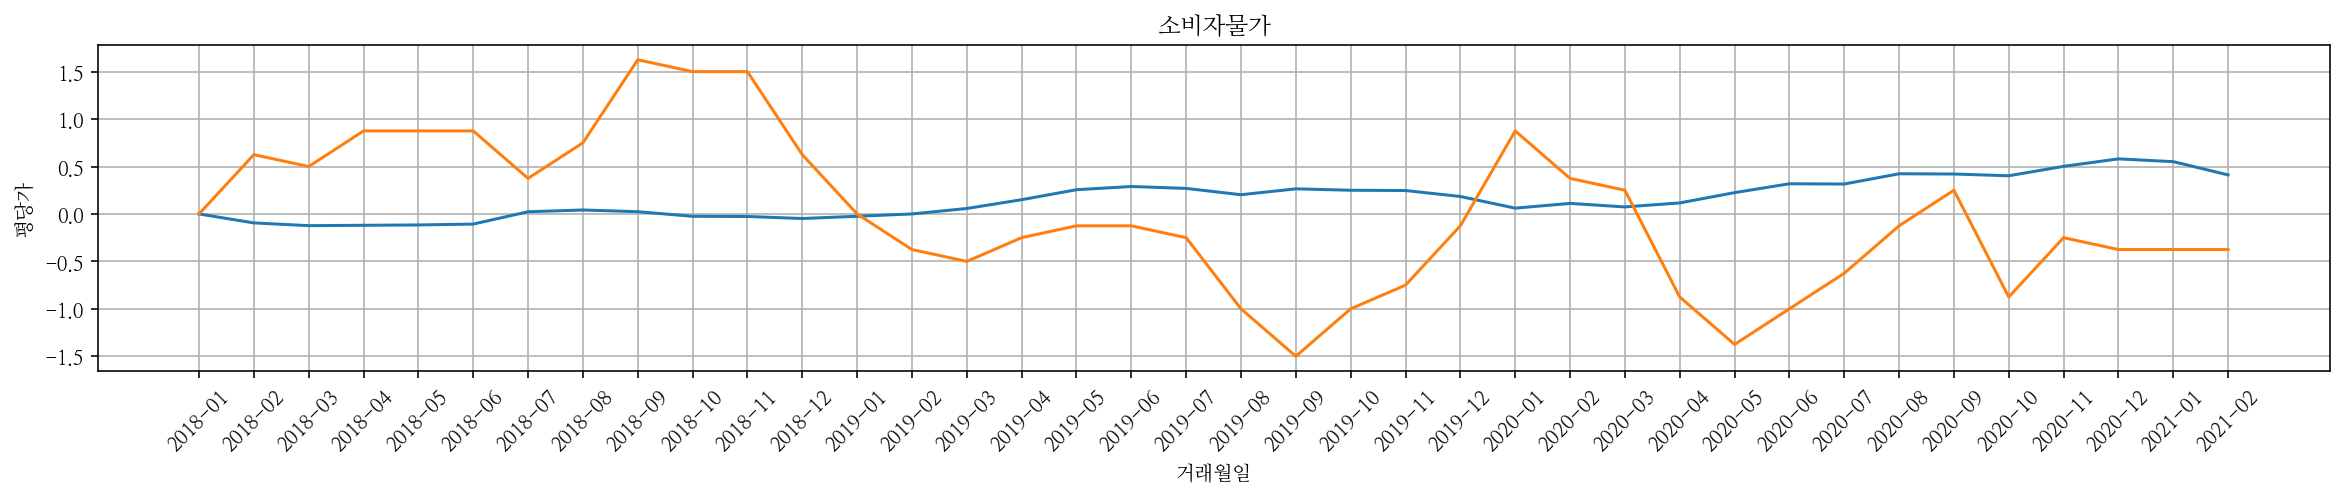

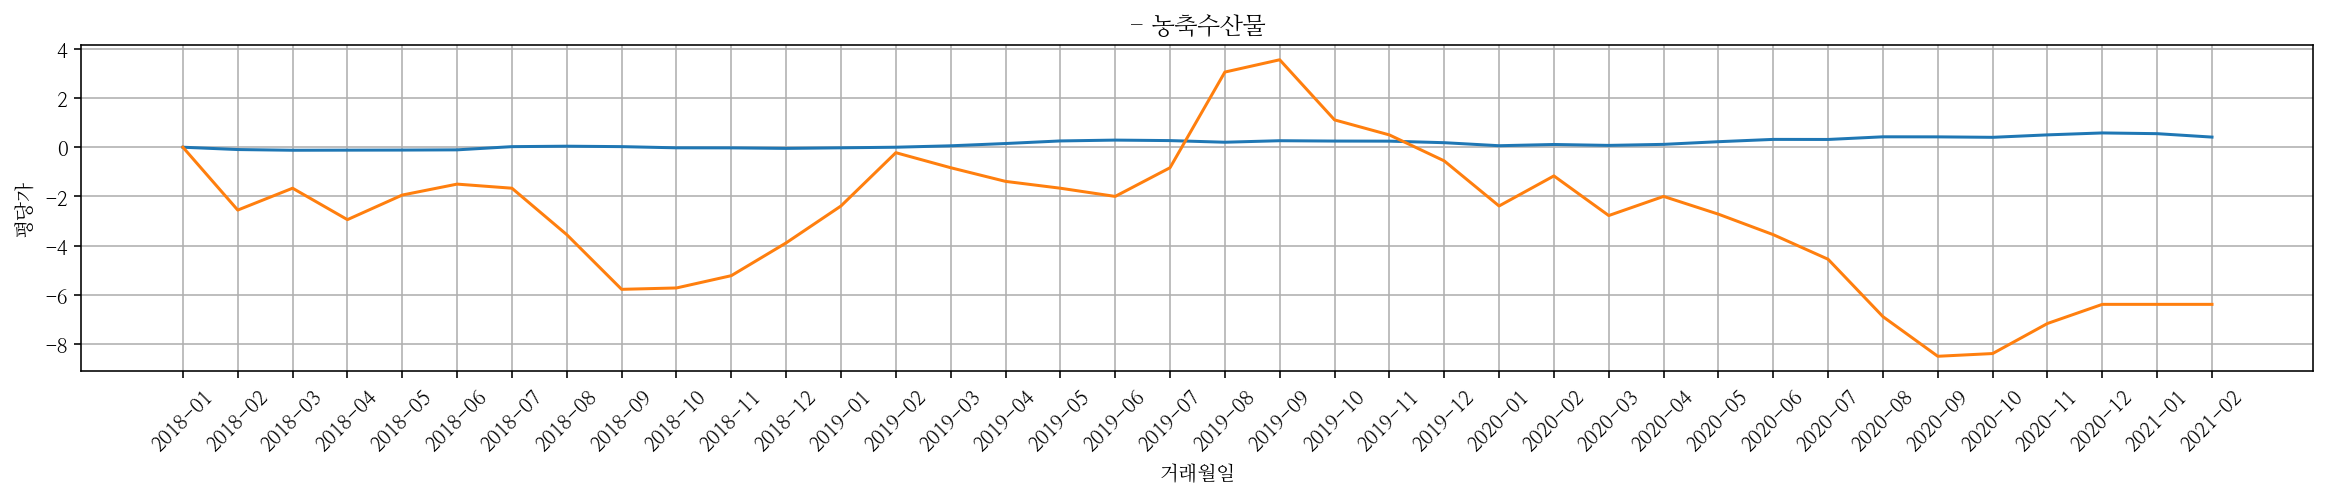

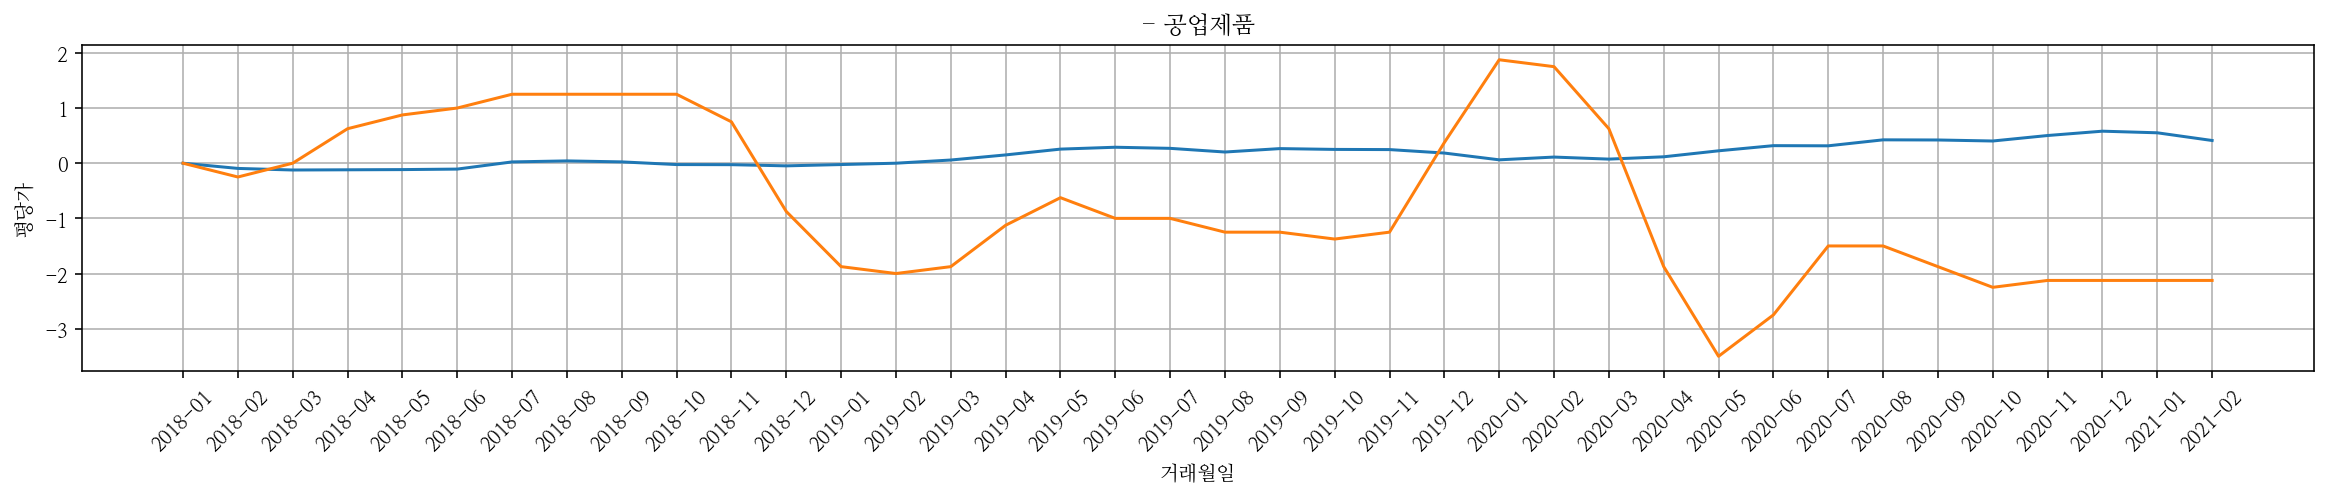

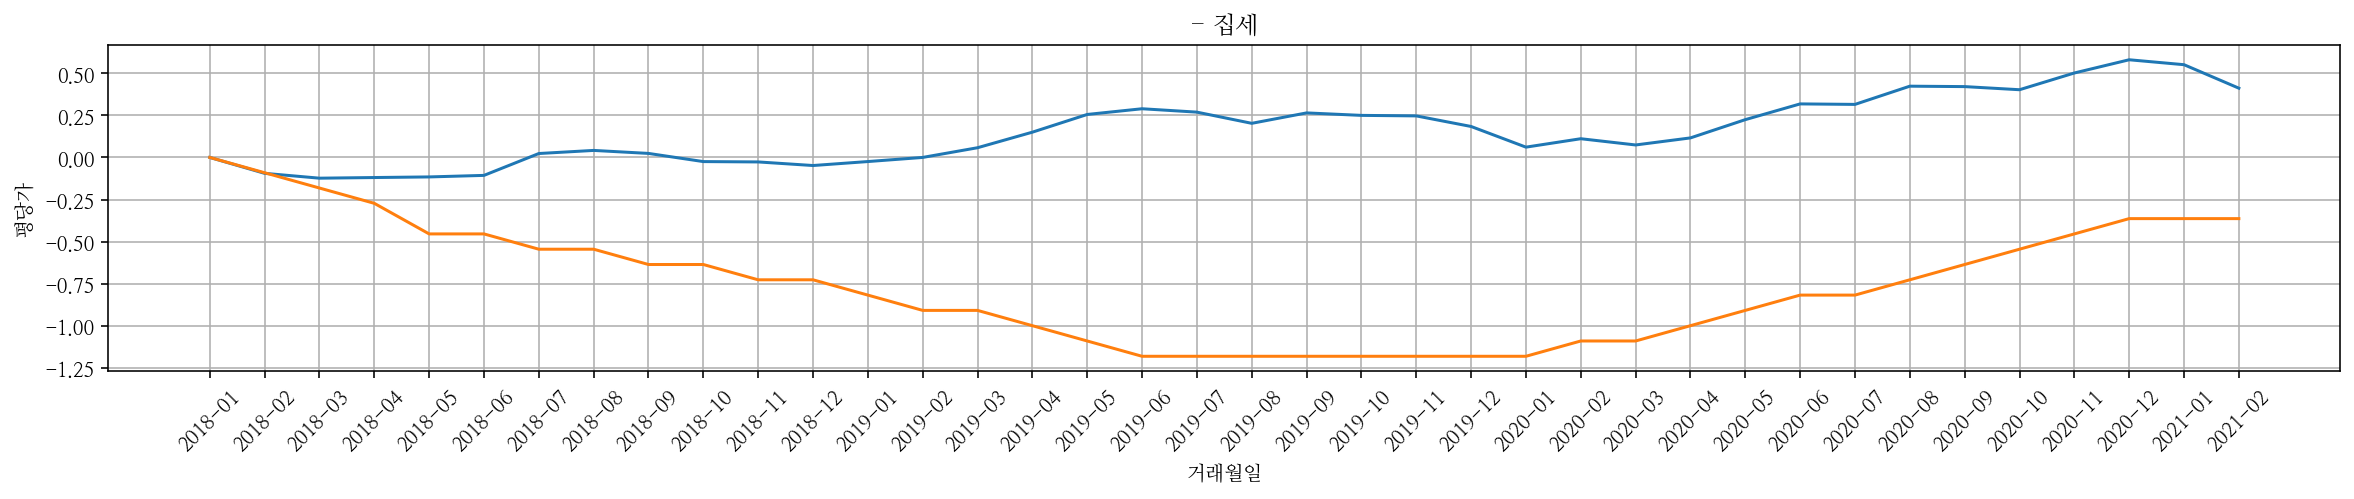

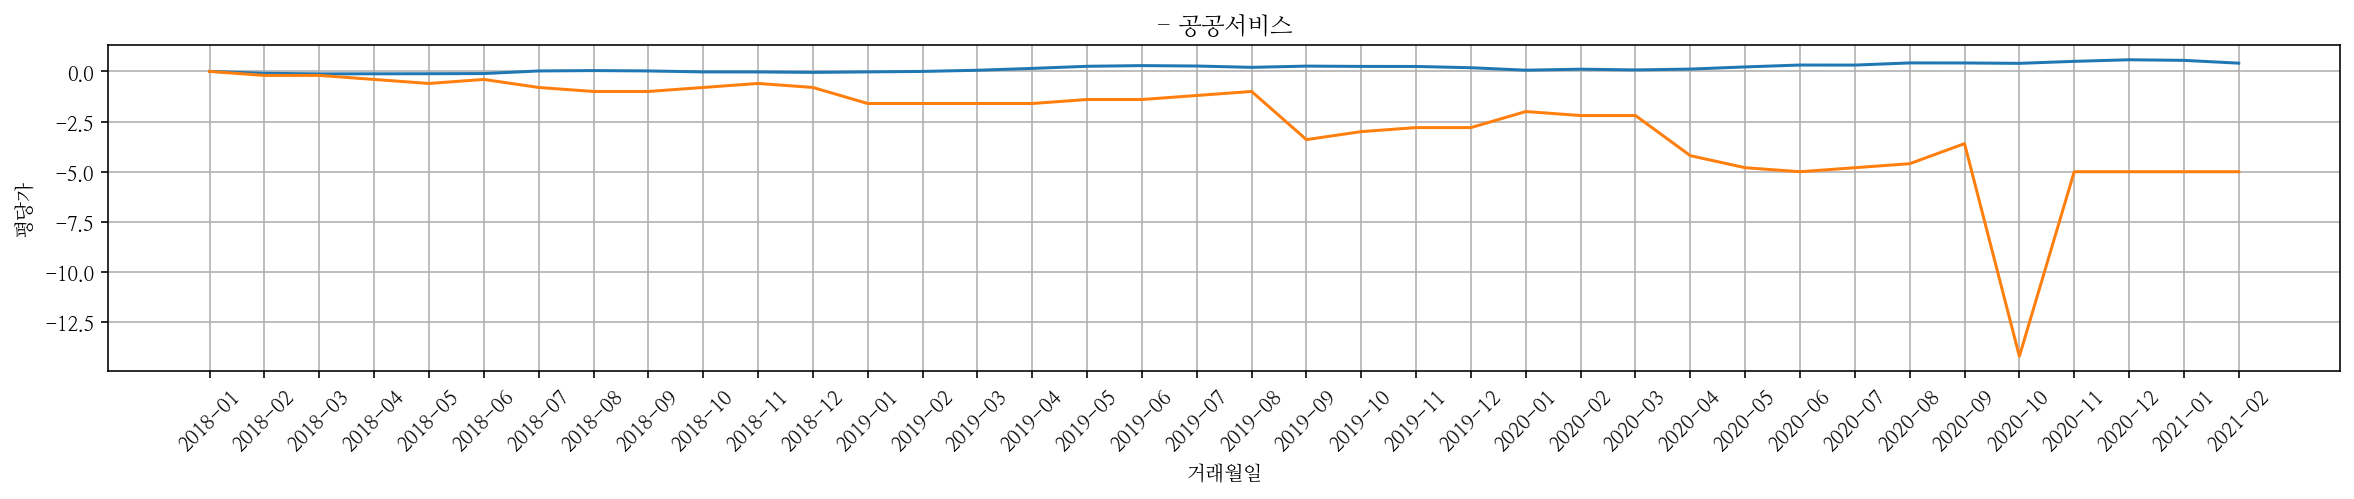

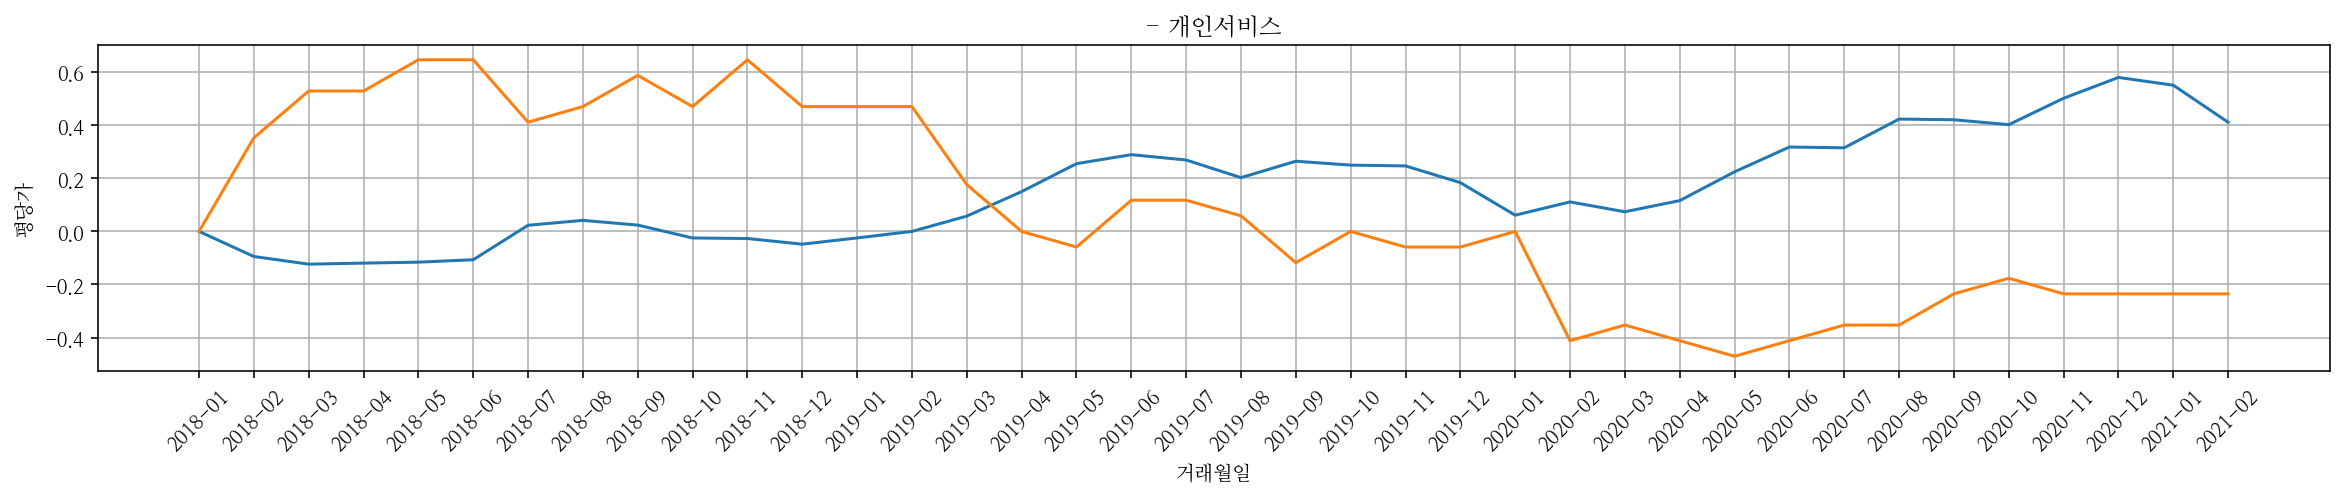

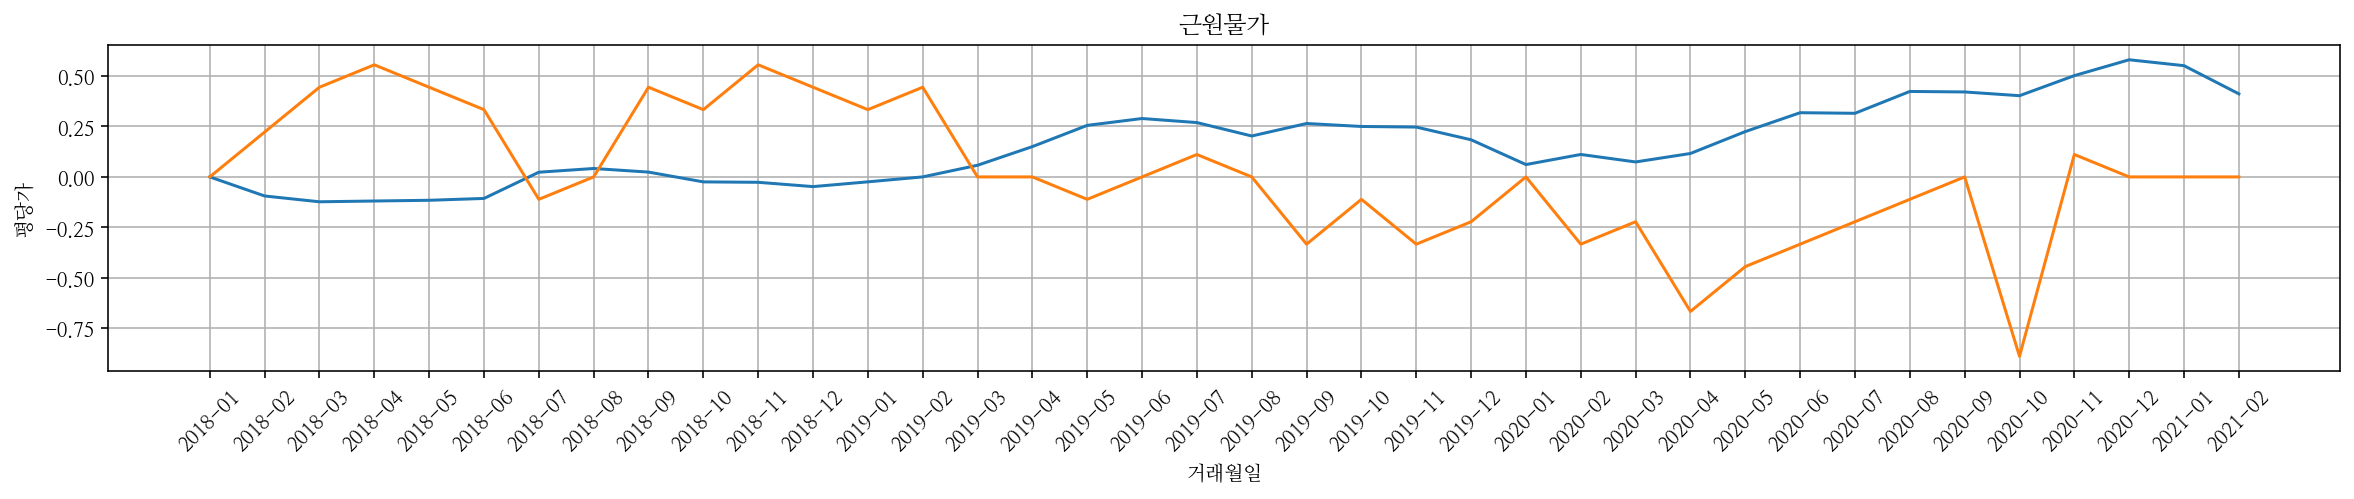

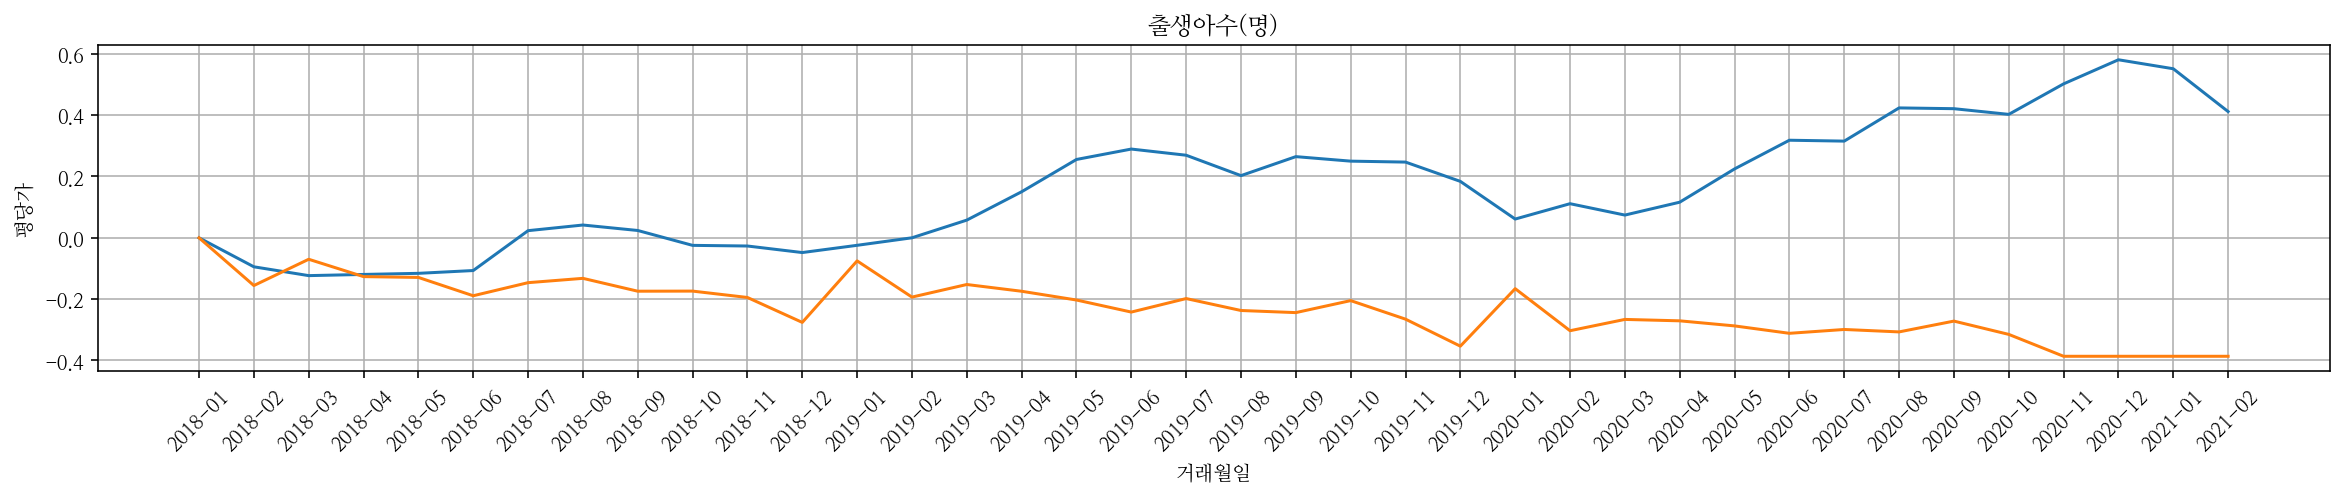

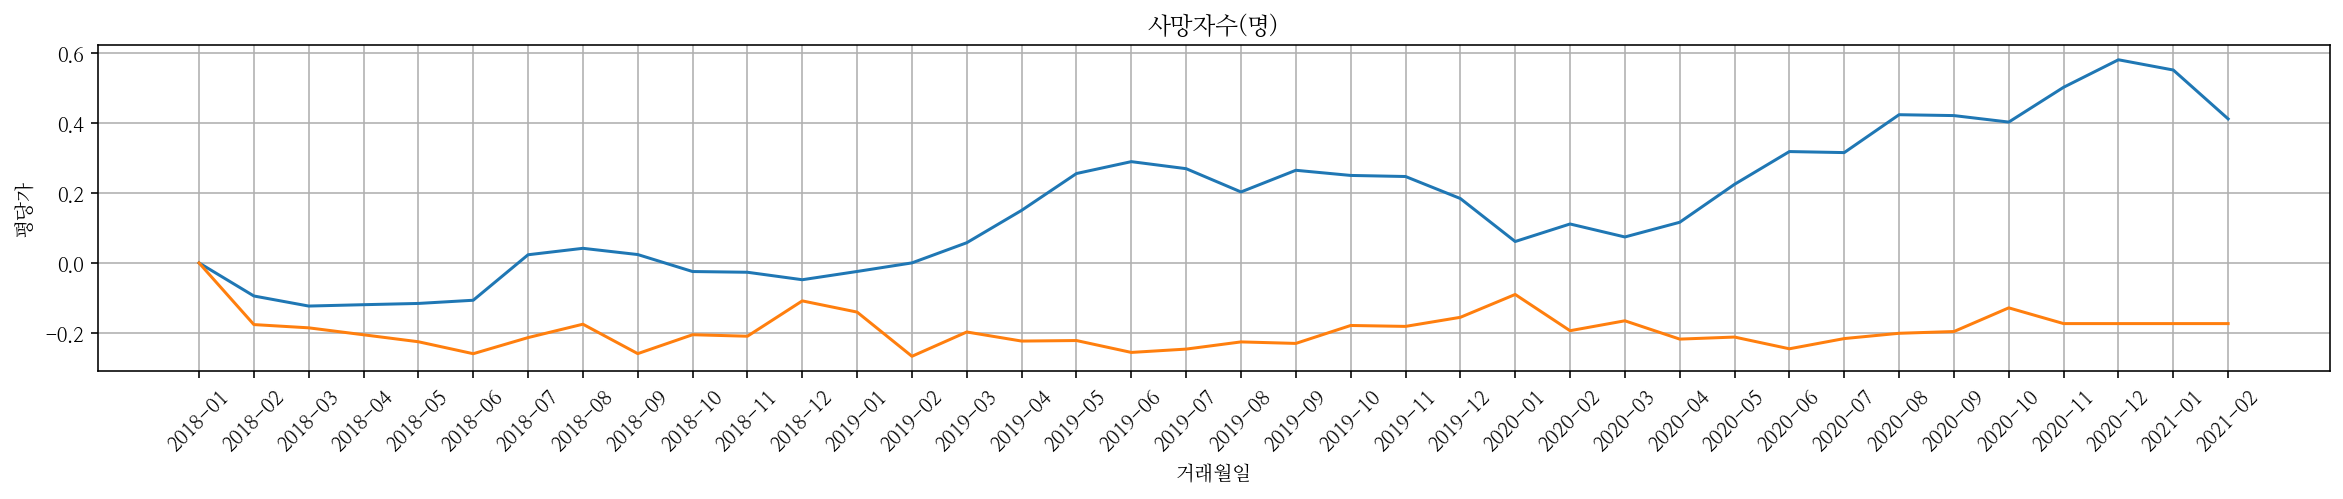

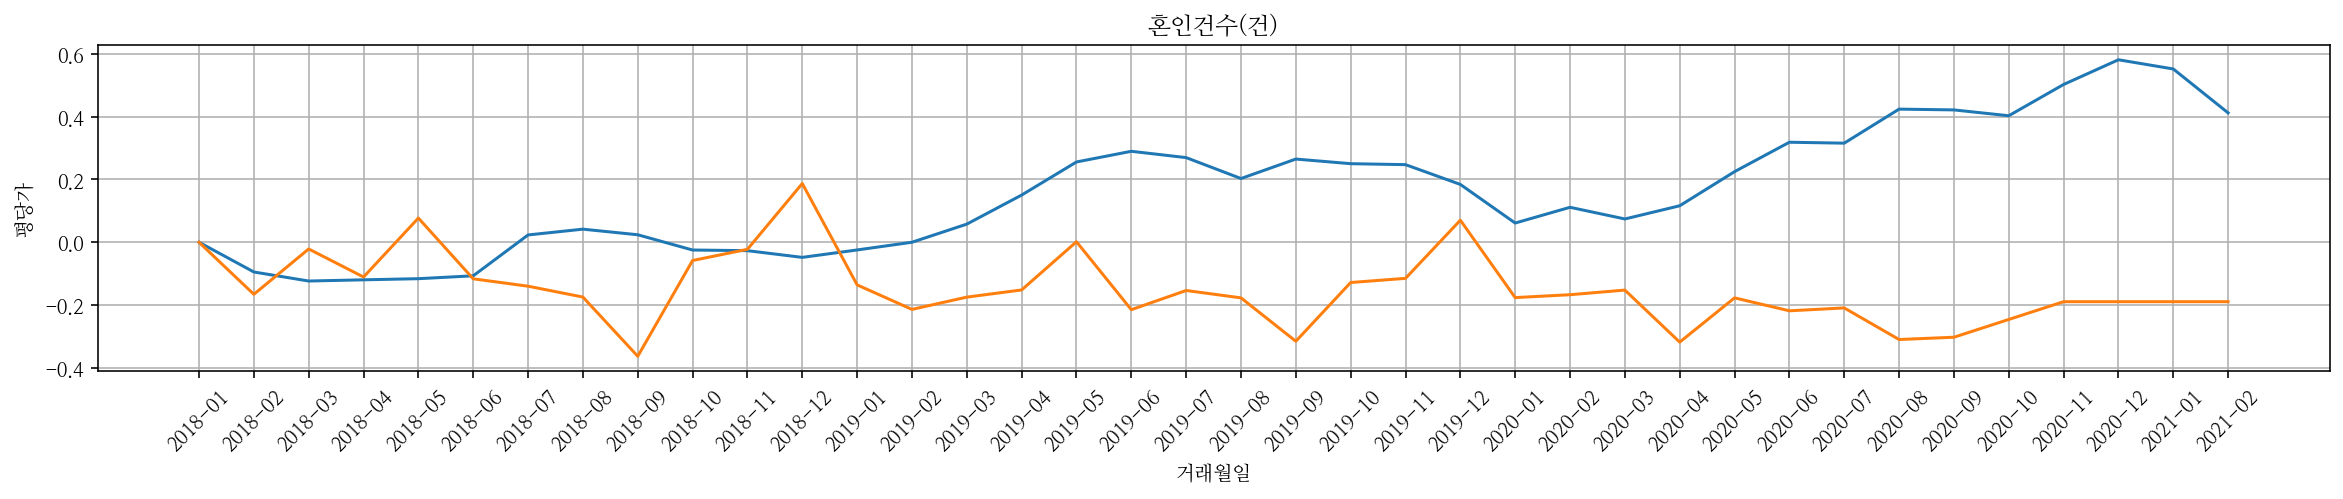

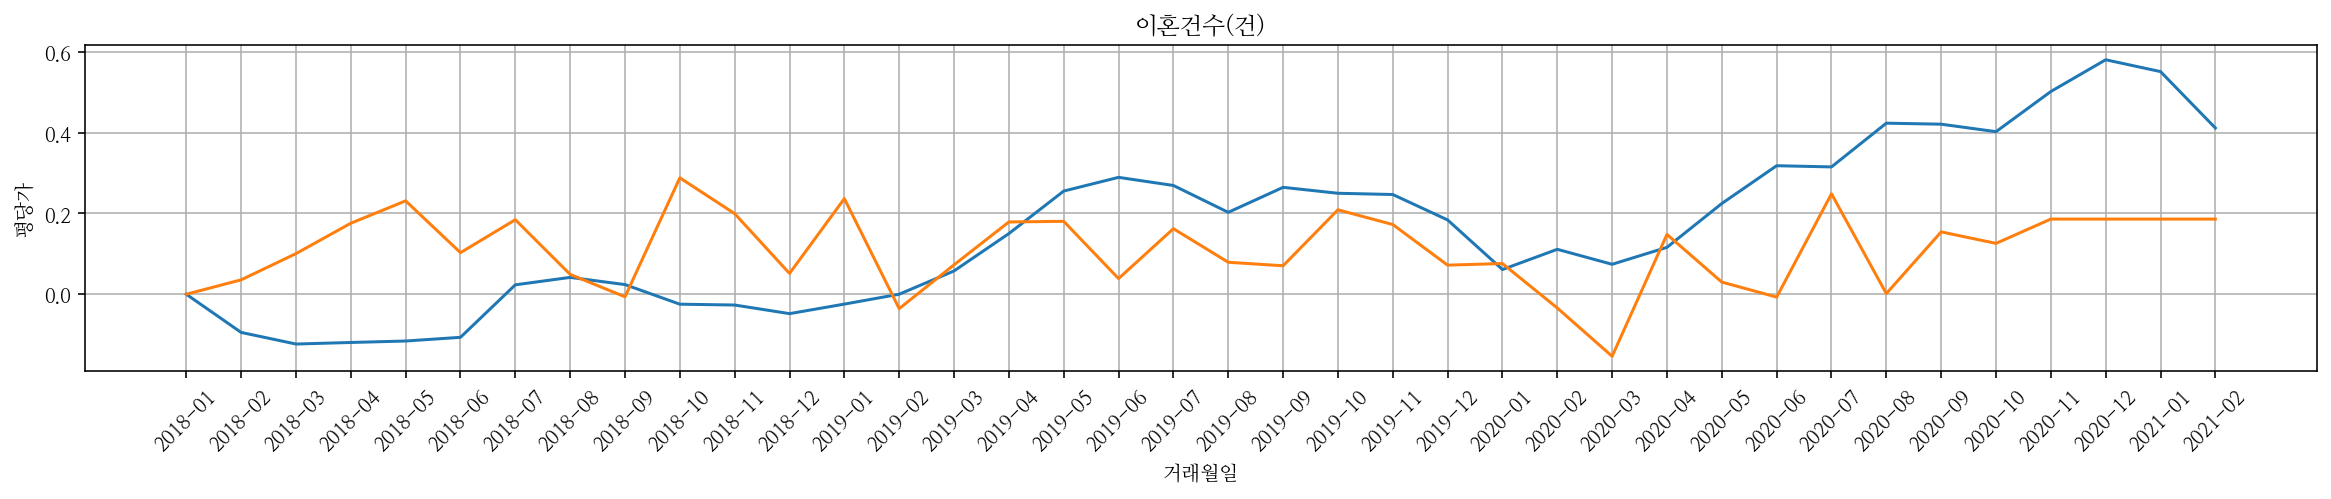

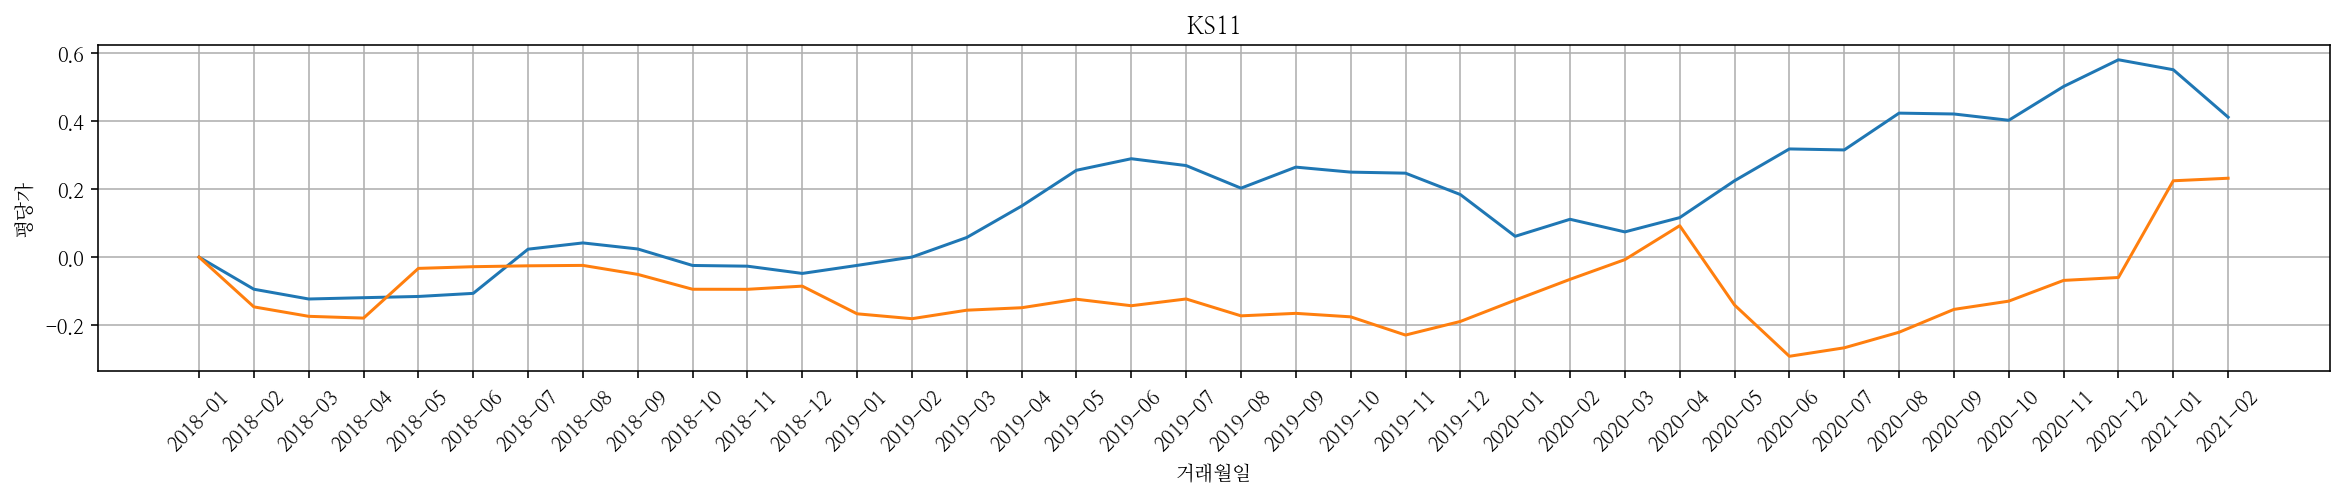

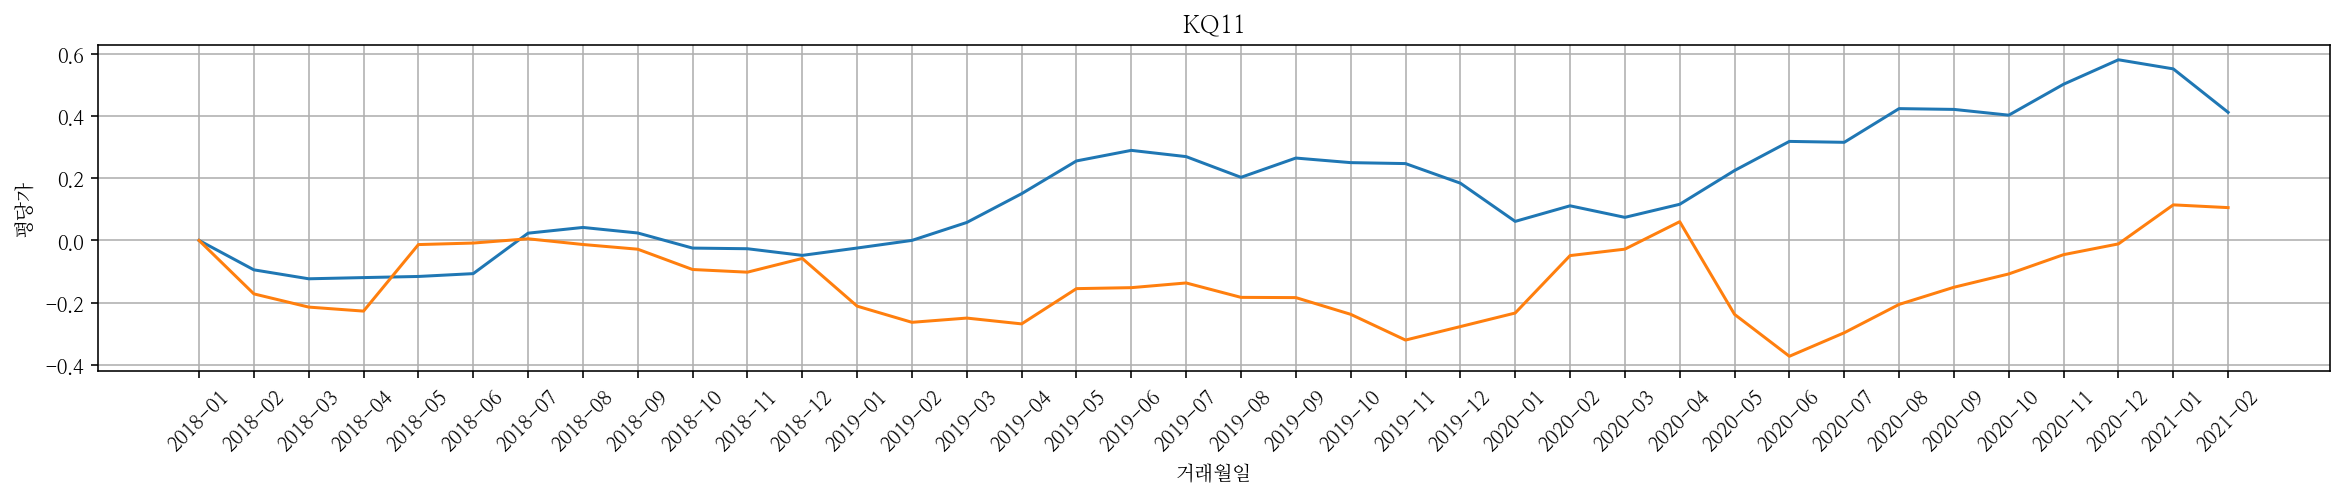

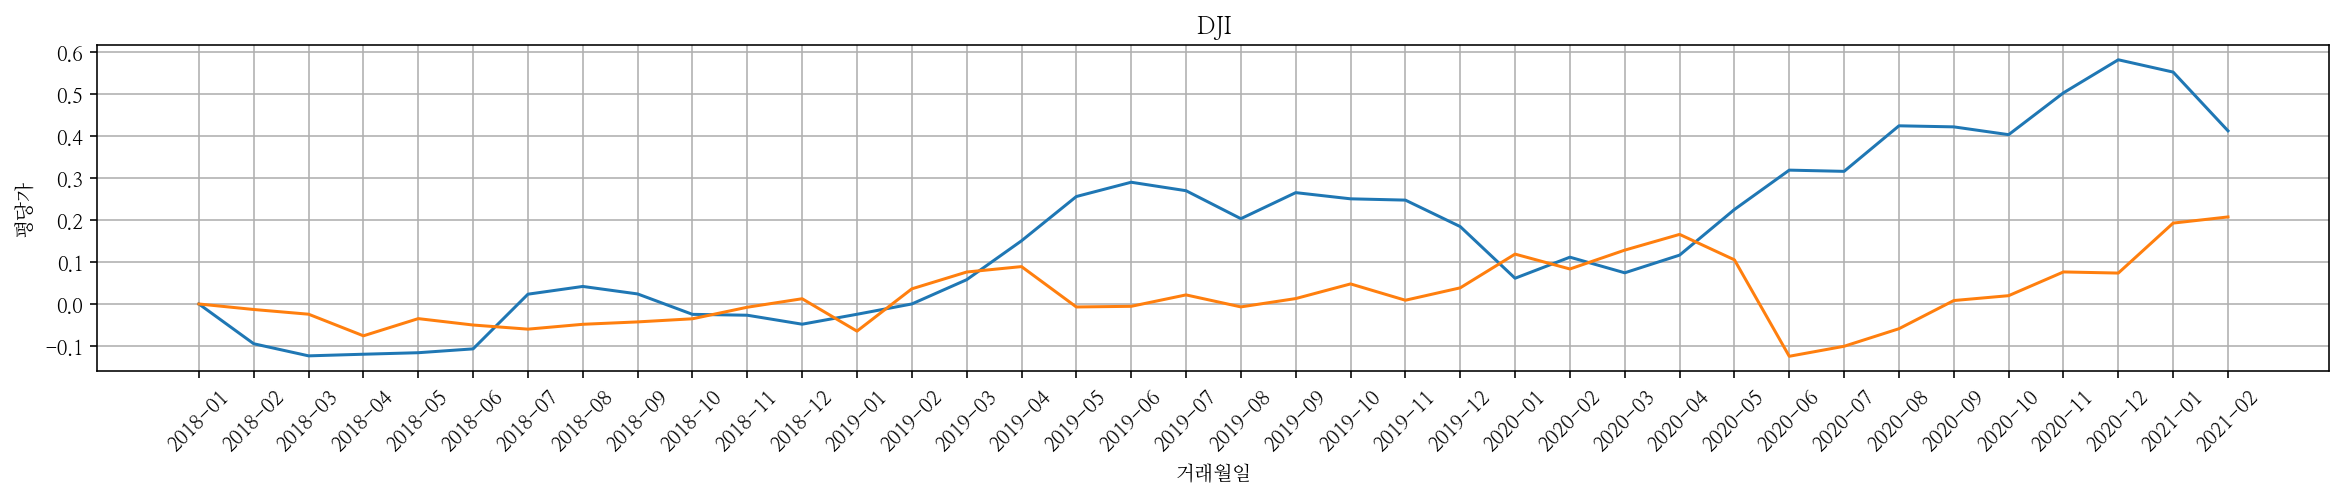

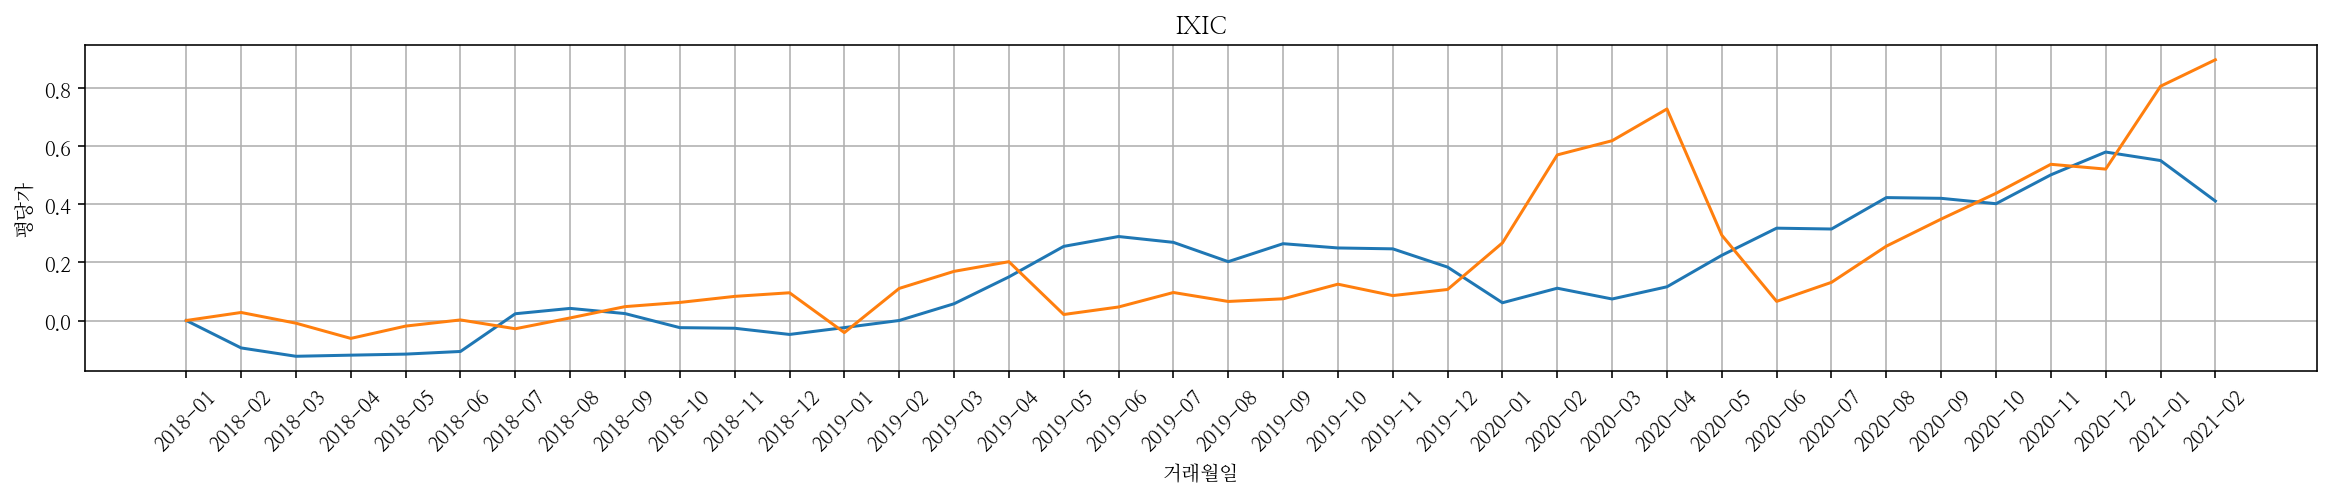

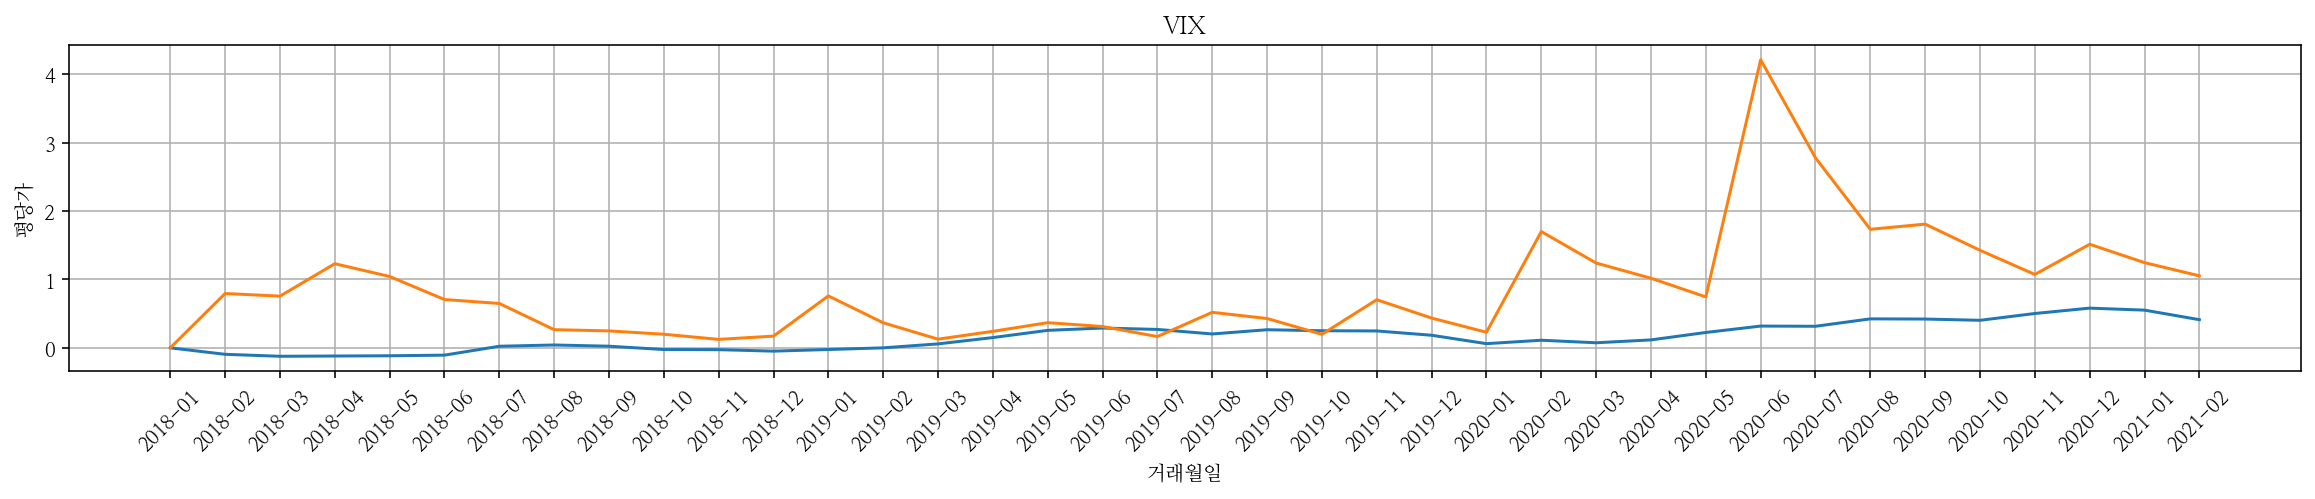

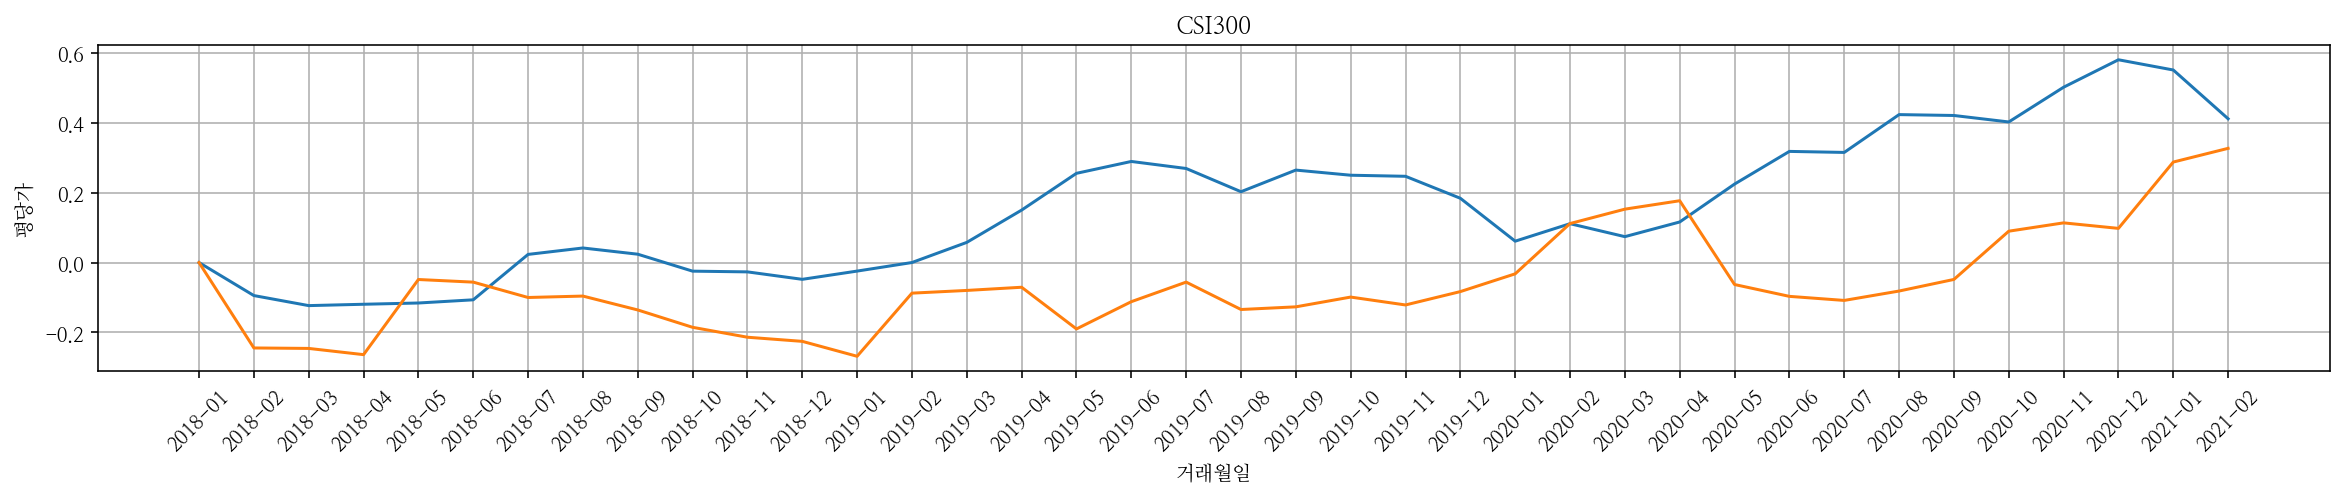

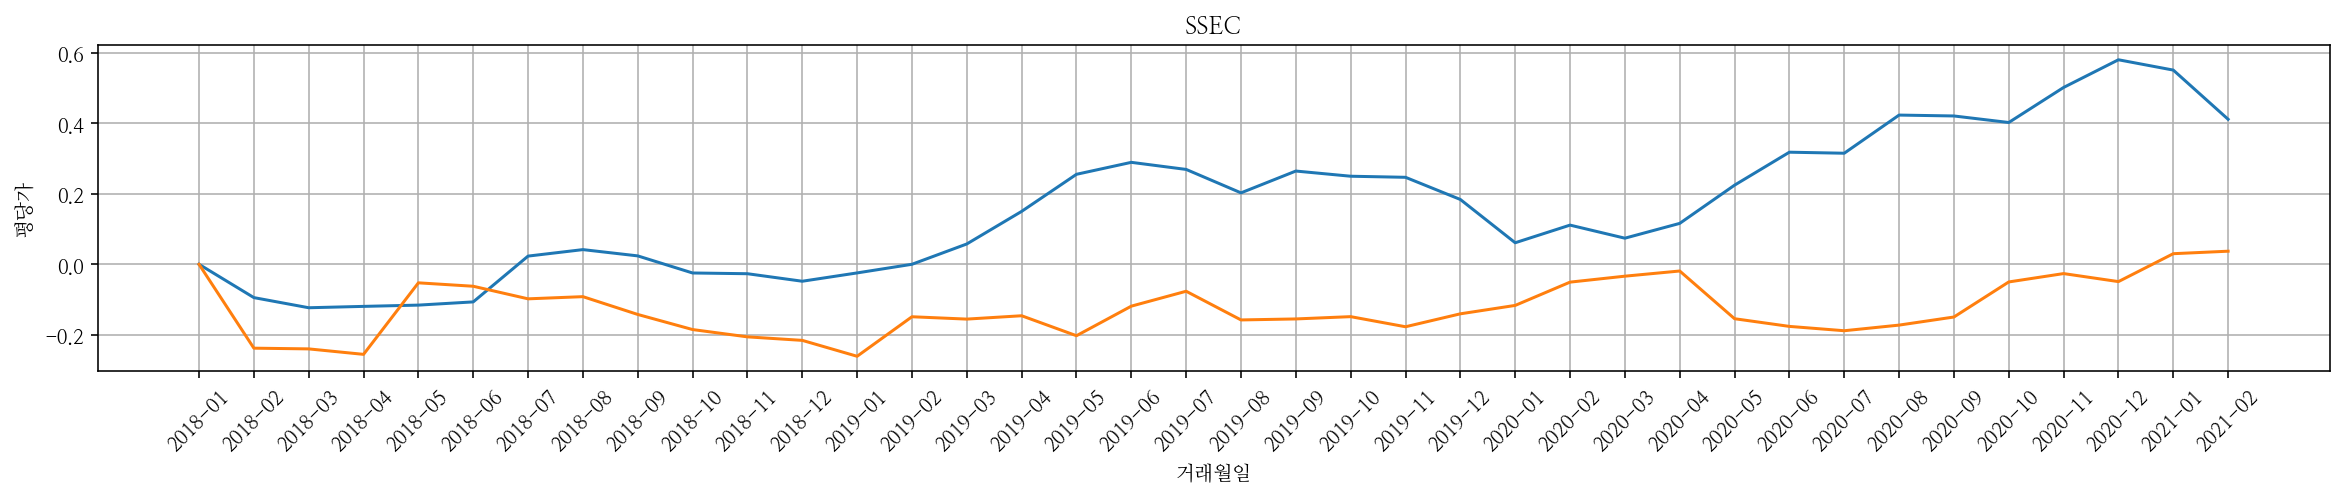

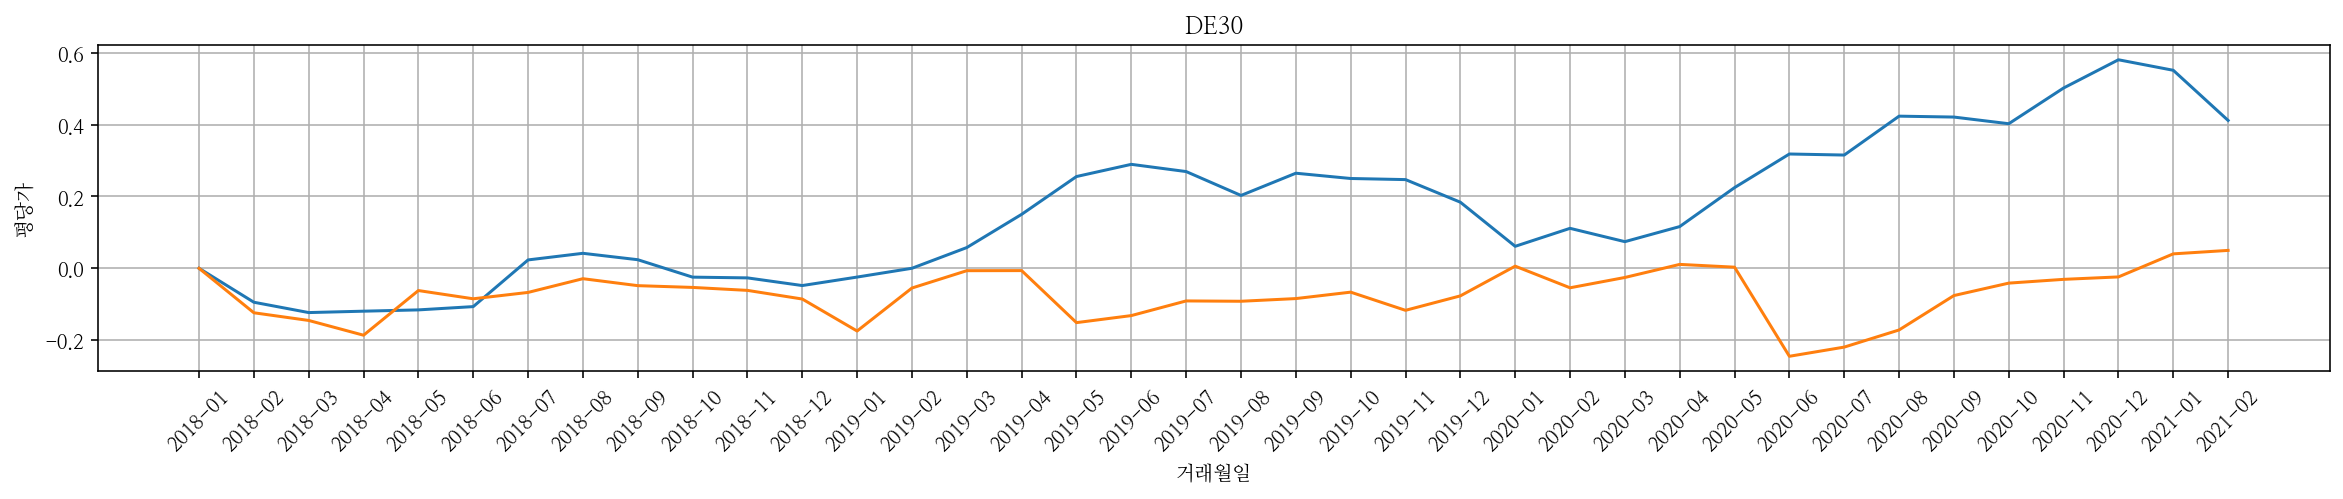

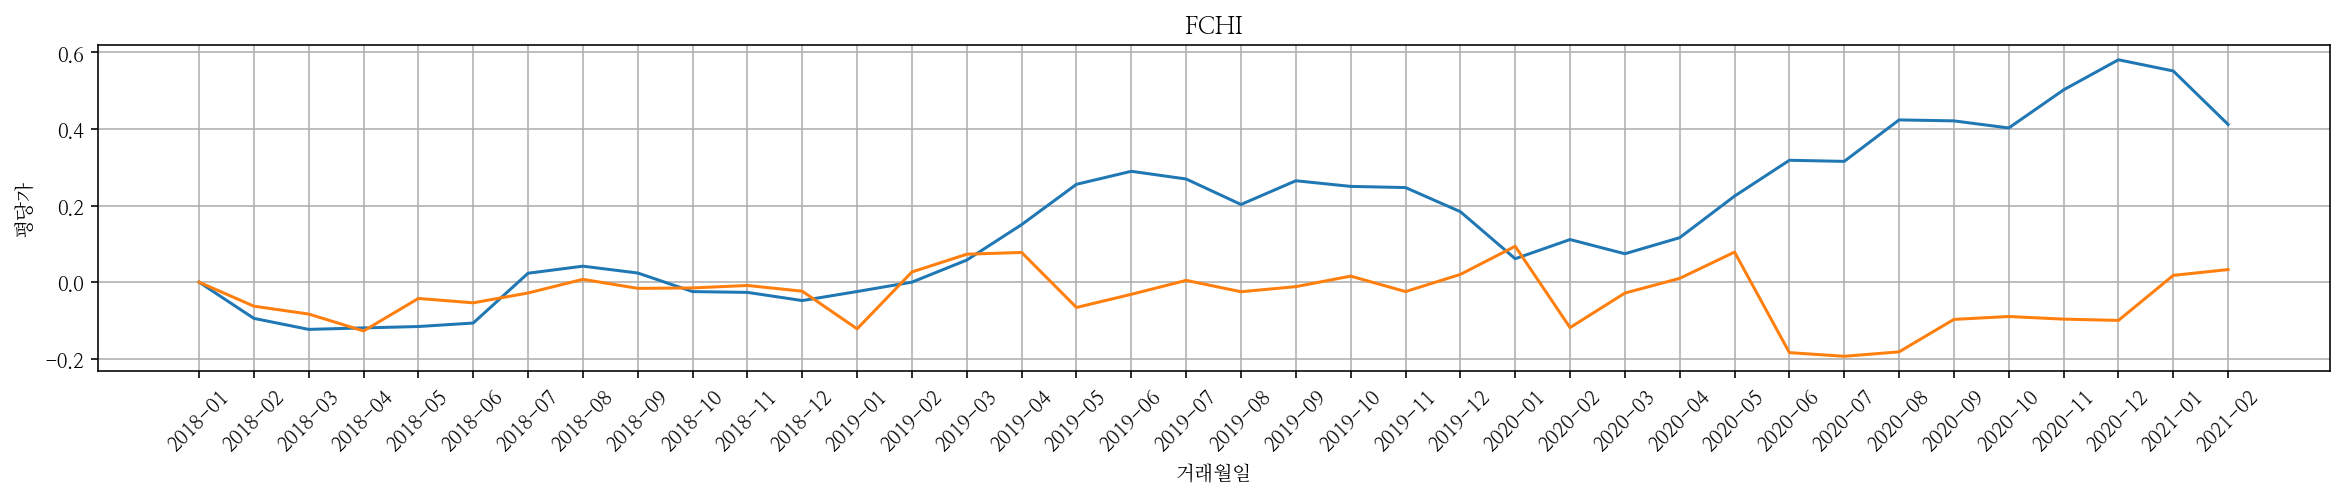

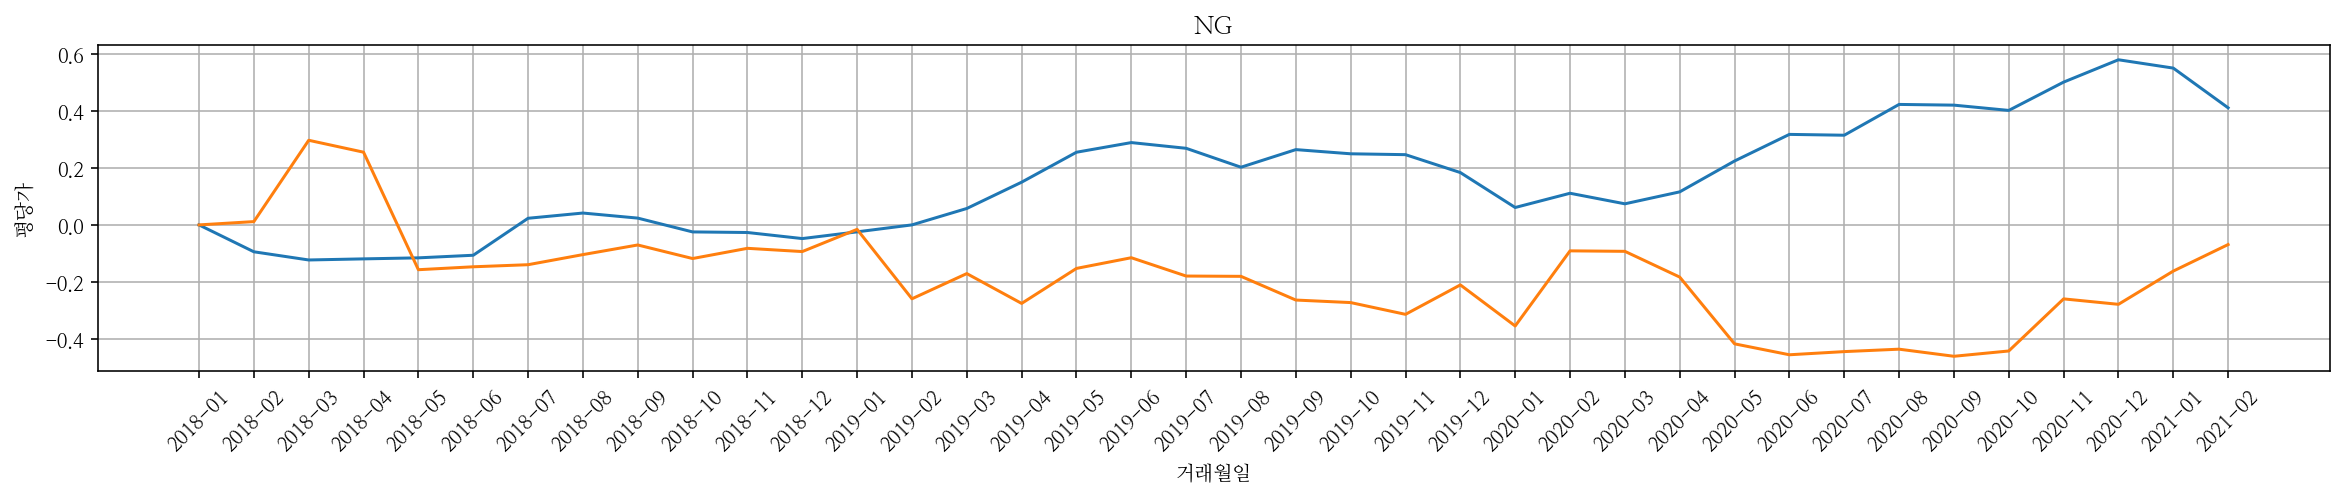

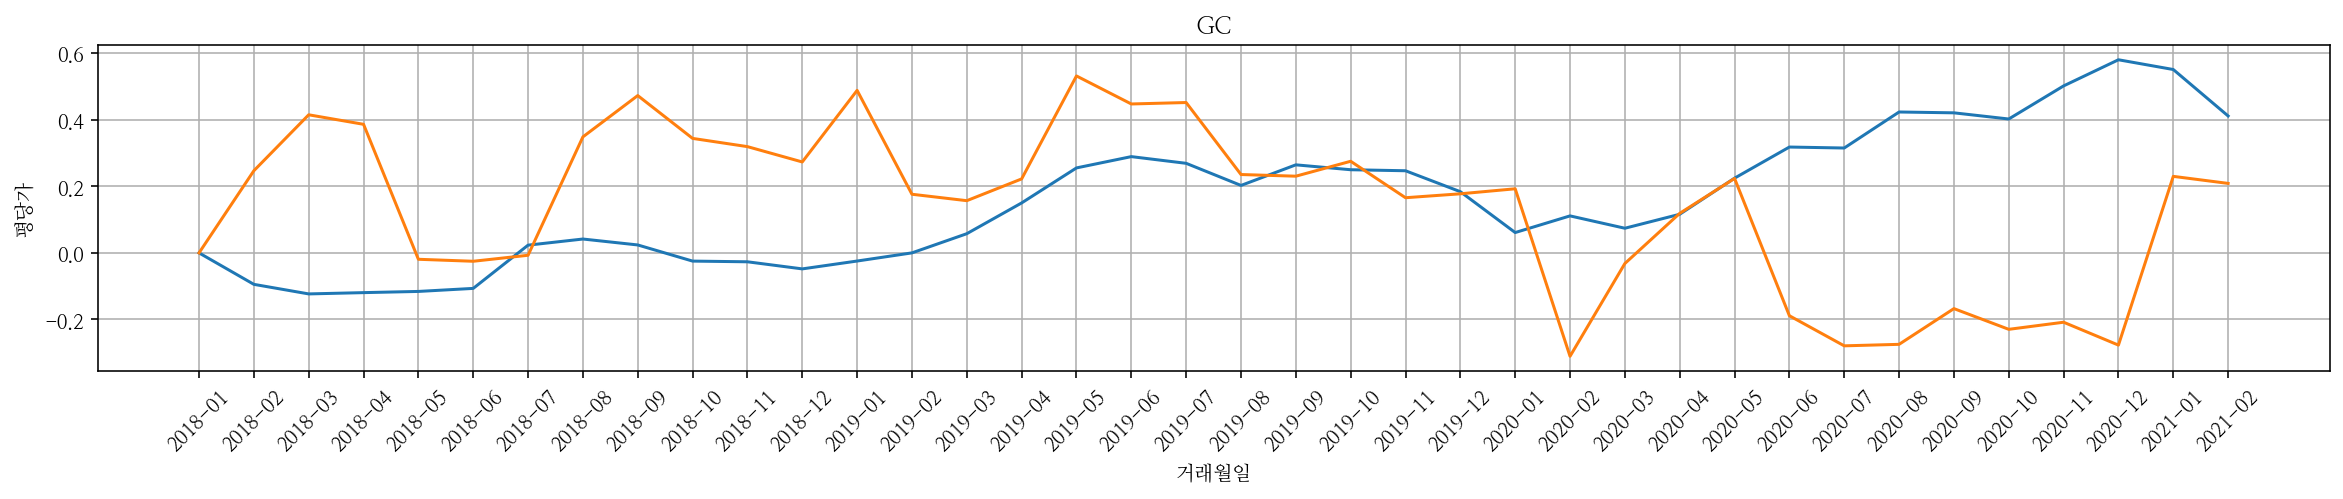

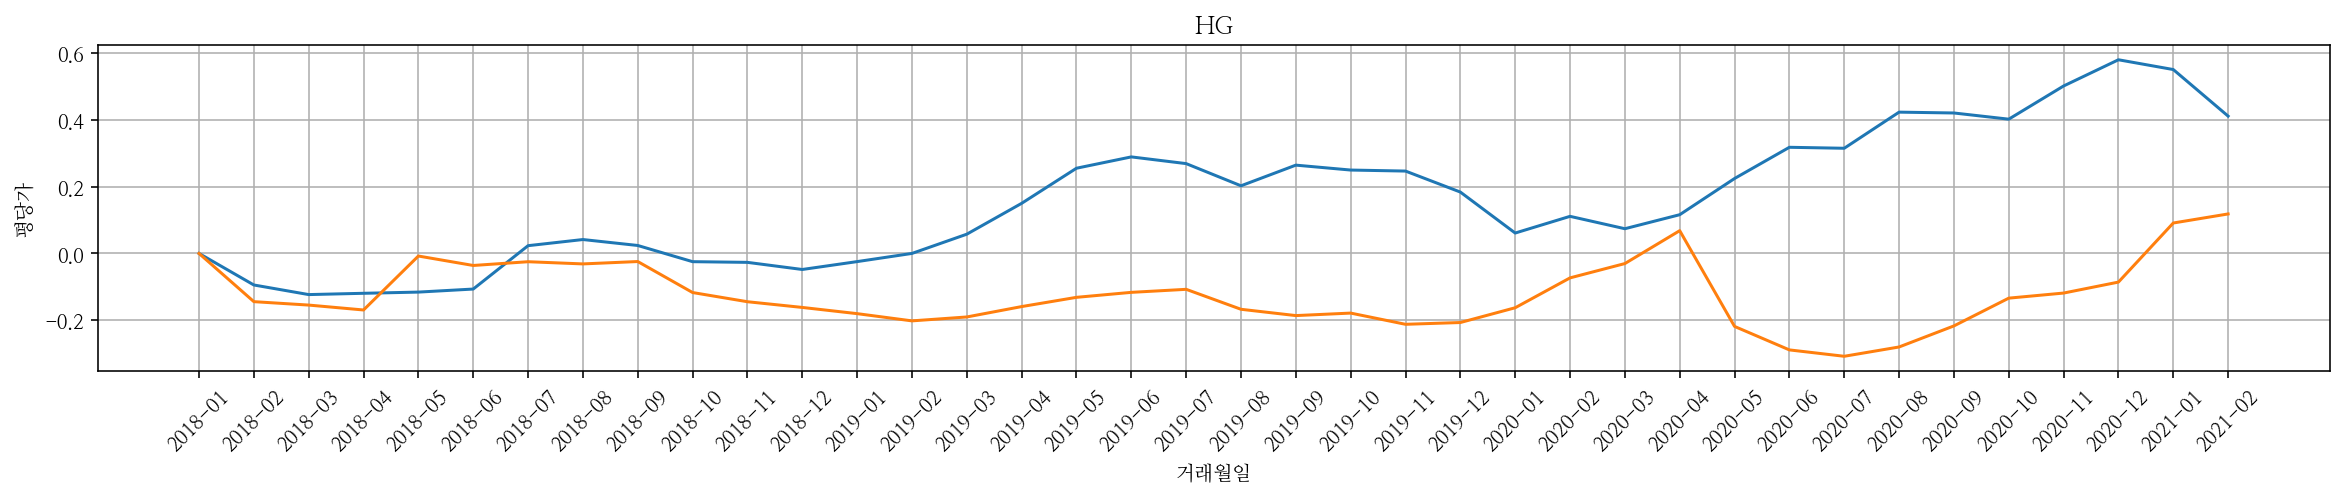

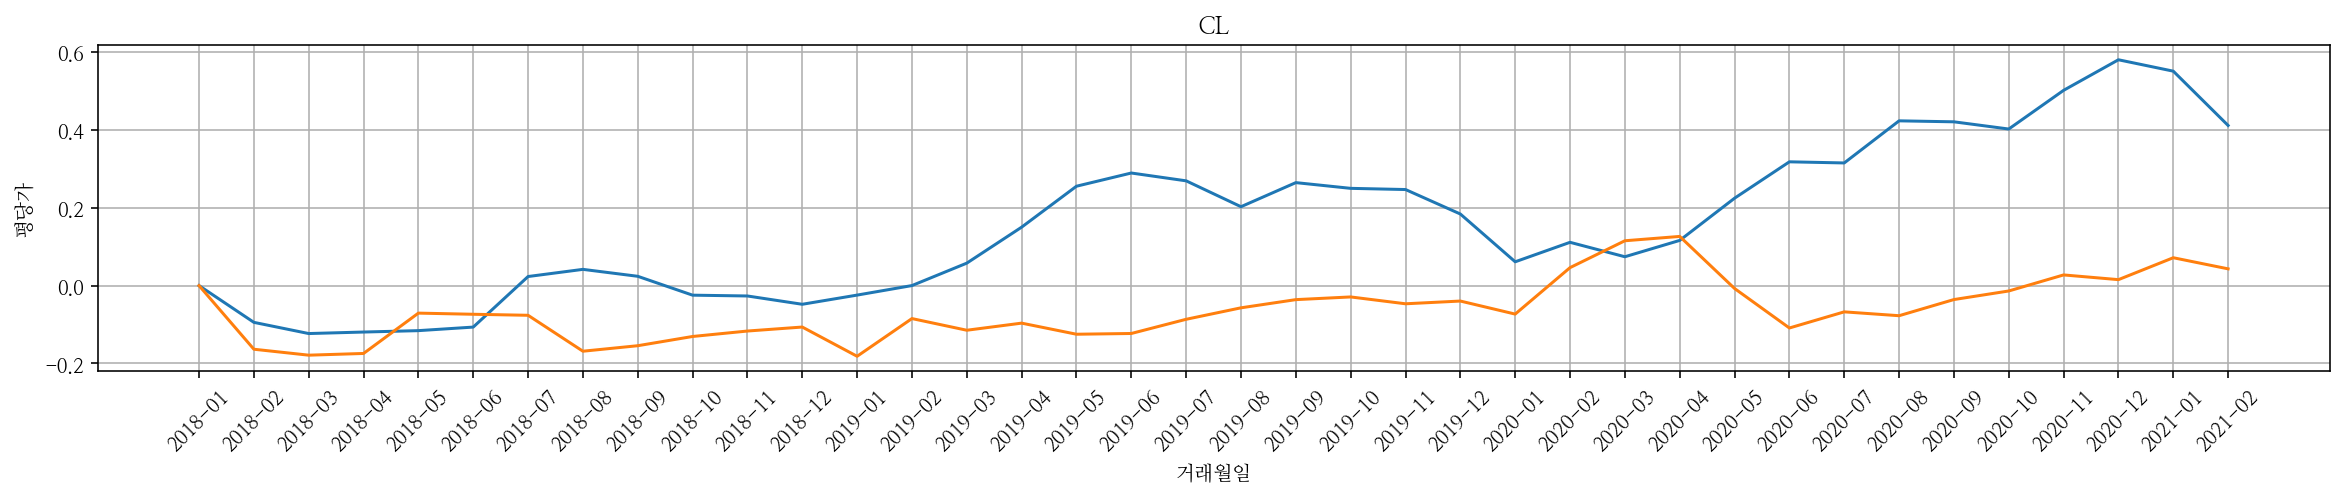

In [ ]:
for col in df_norm.columns[2:-2]:
  plt.figure(figsize=(20,3))
  plt.xticks(rotation=45)
  plt.title(col)
  sns.lineplot(x='거래월일',y='평당가',data=df_norm.reset_index())
  sns.lineplot(x='거래월일',y=col,data=df_norm.reset_index())

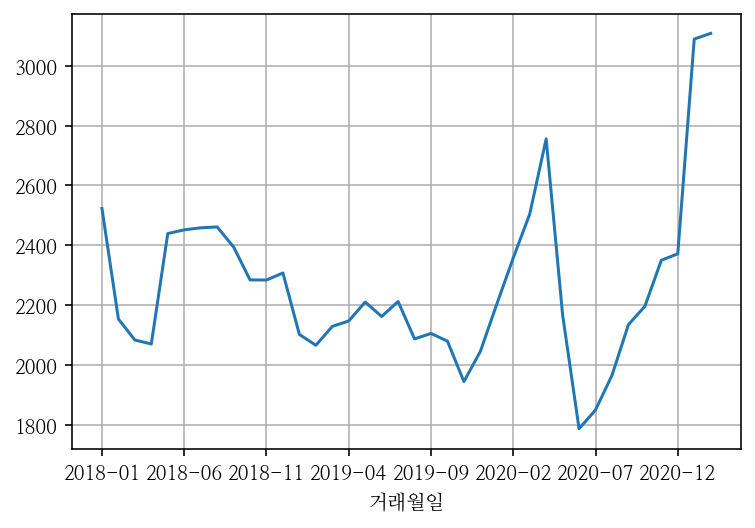

In [ ]:
df_time['KS11'].plot()
# df_time['IXIC'].plot()

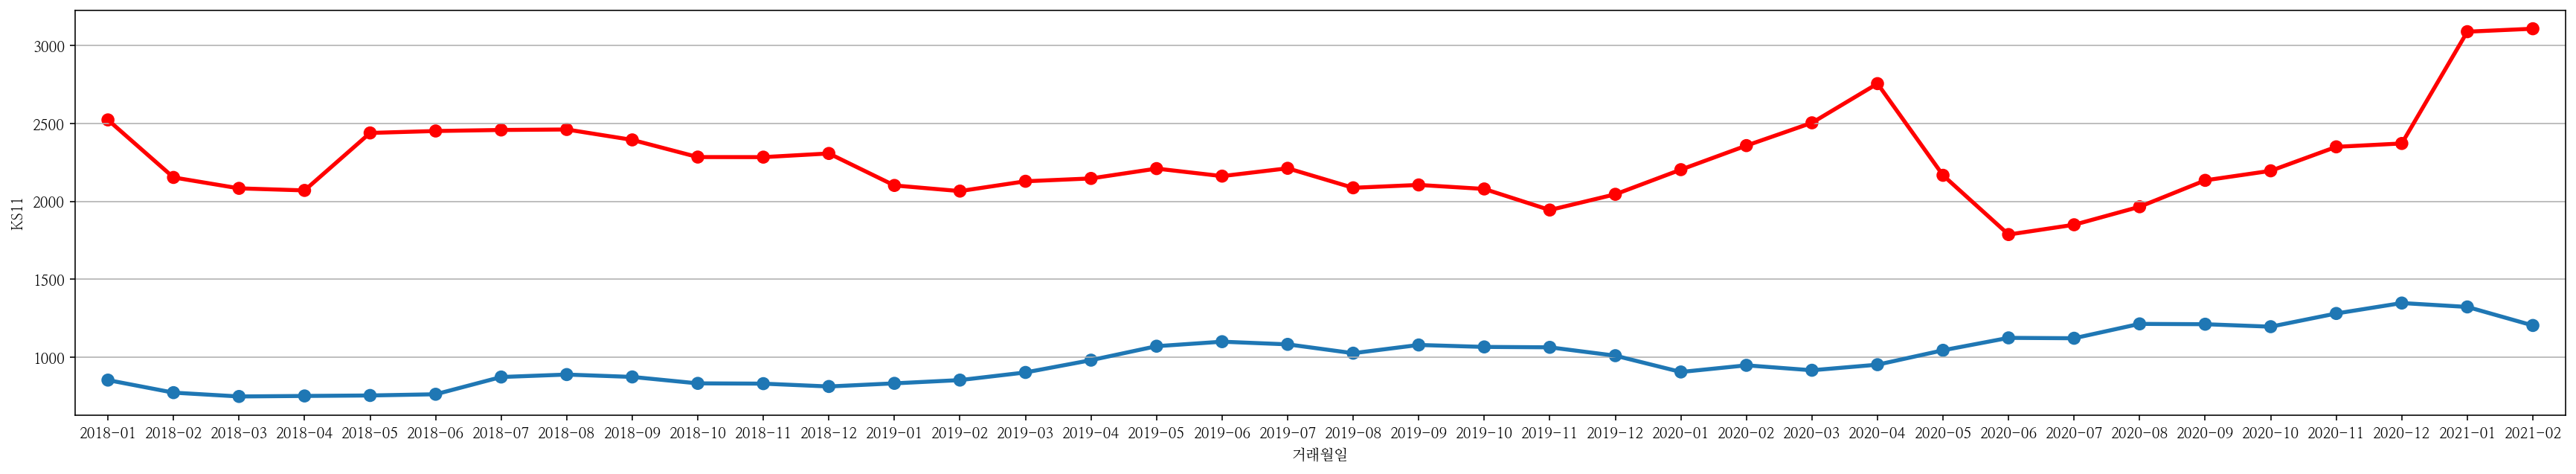

In [ ]:
df_time['mean'] = (df_time['KS11']+df_time['IXIC'])/11
plt.figure(figsize=(30,5))
sns.pointplot(x="거래월일",y="평당가",data=df_time.reset_index())
sns.pointplot(x="거래월일",y="KS11",data=df_time.reset_index(),color='red');

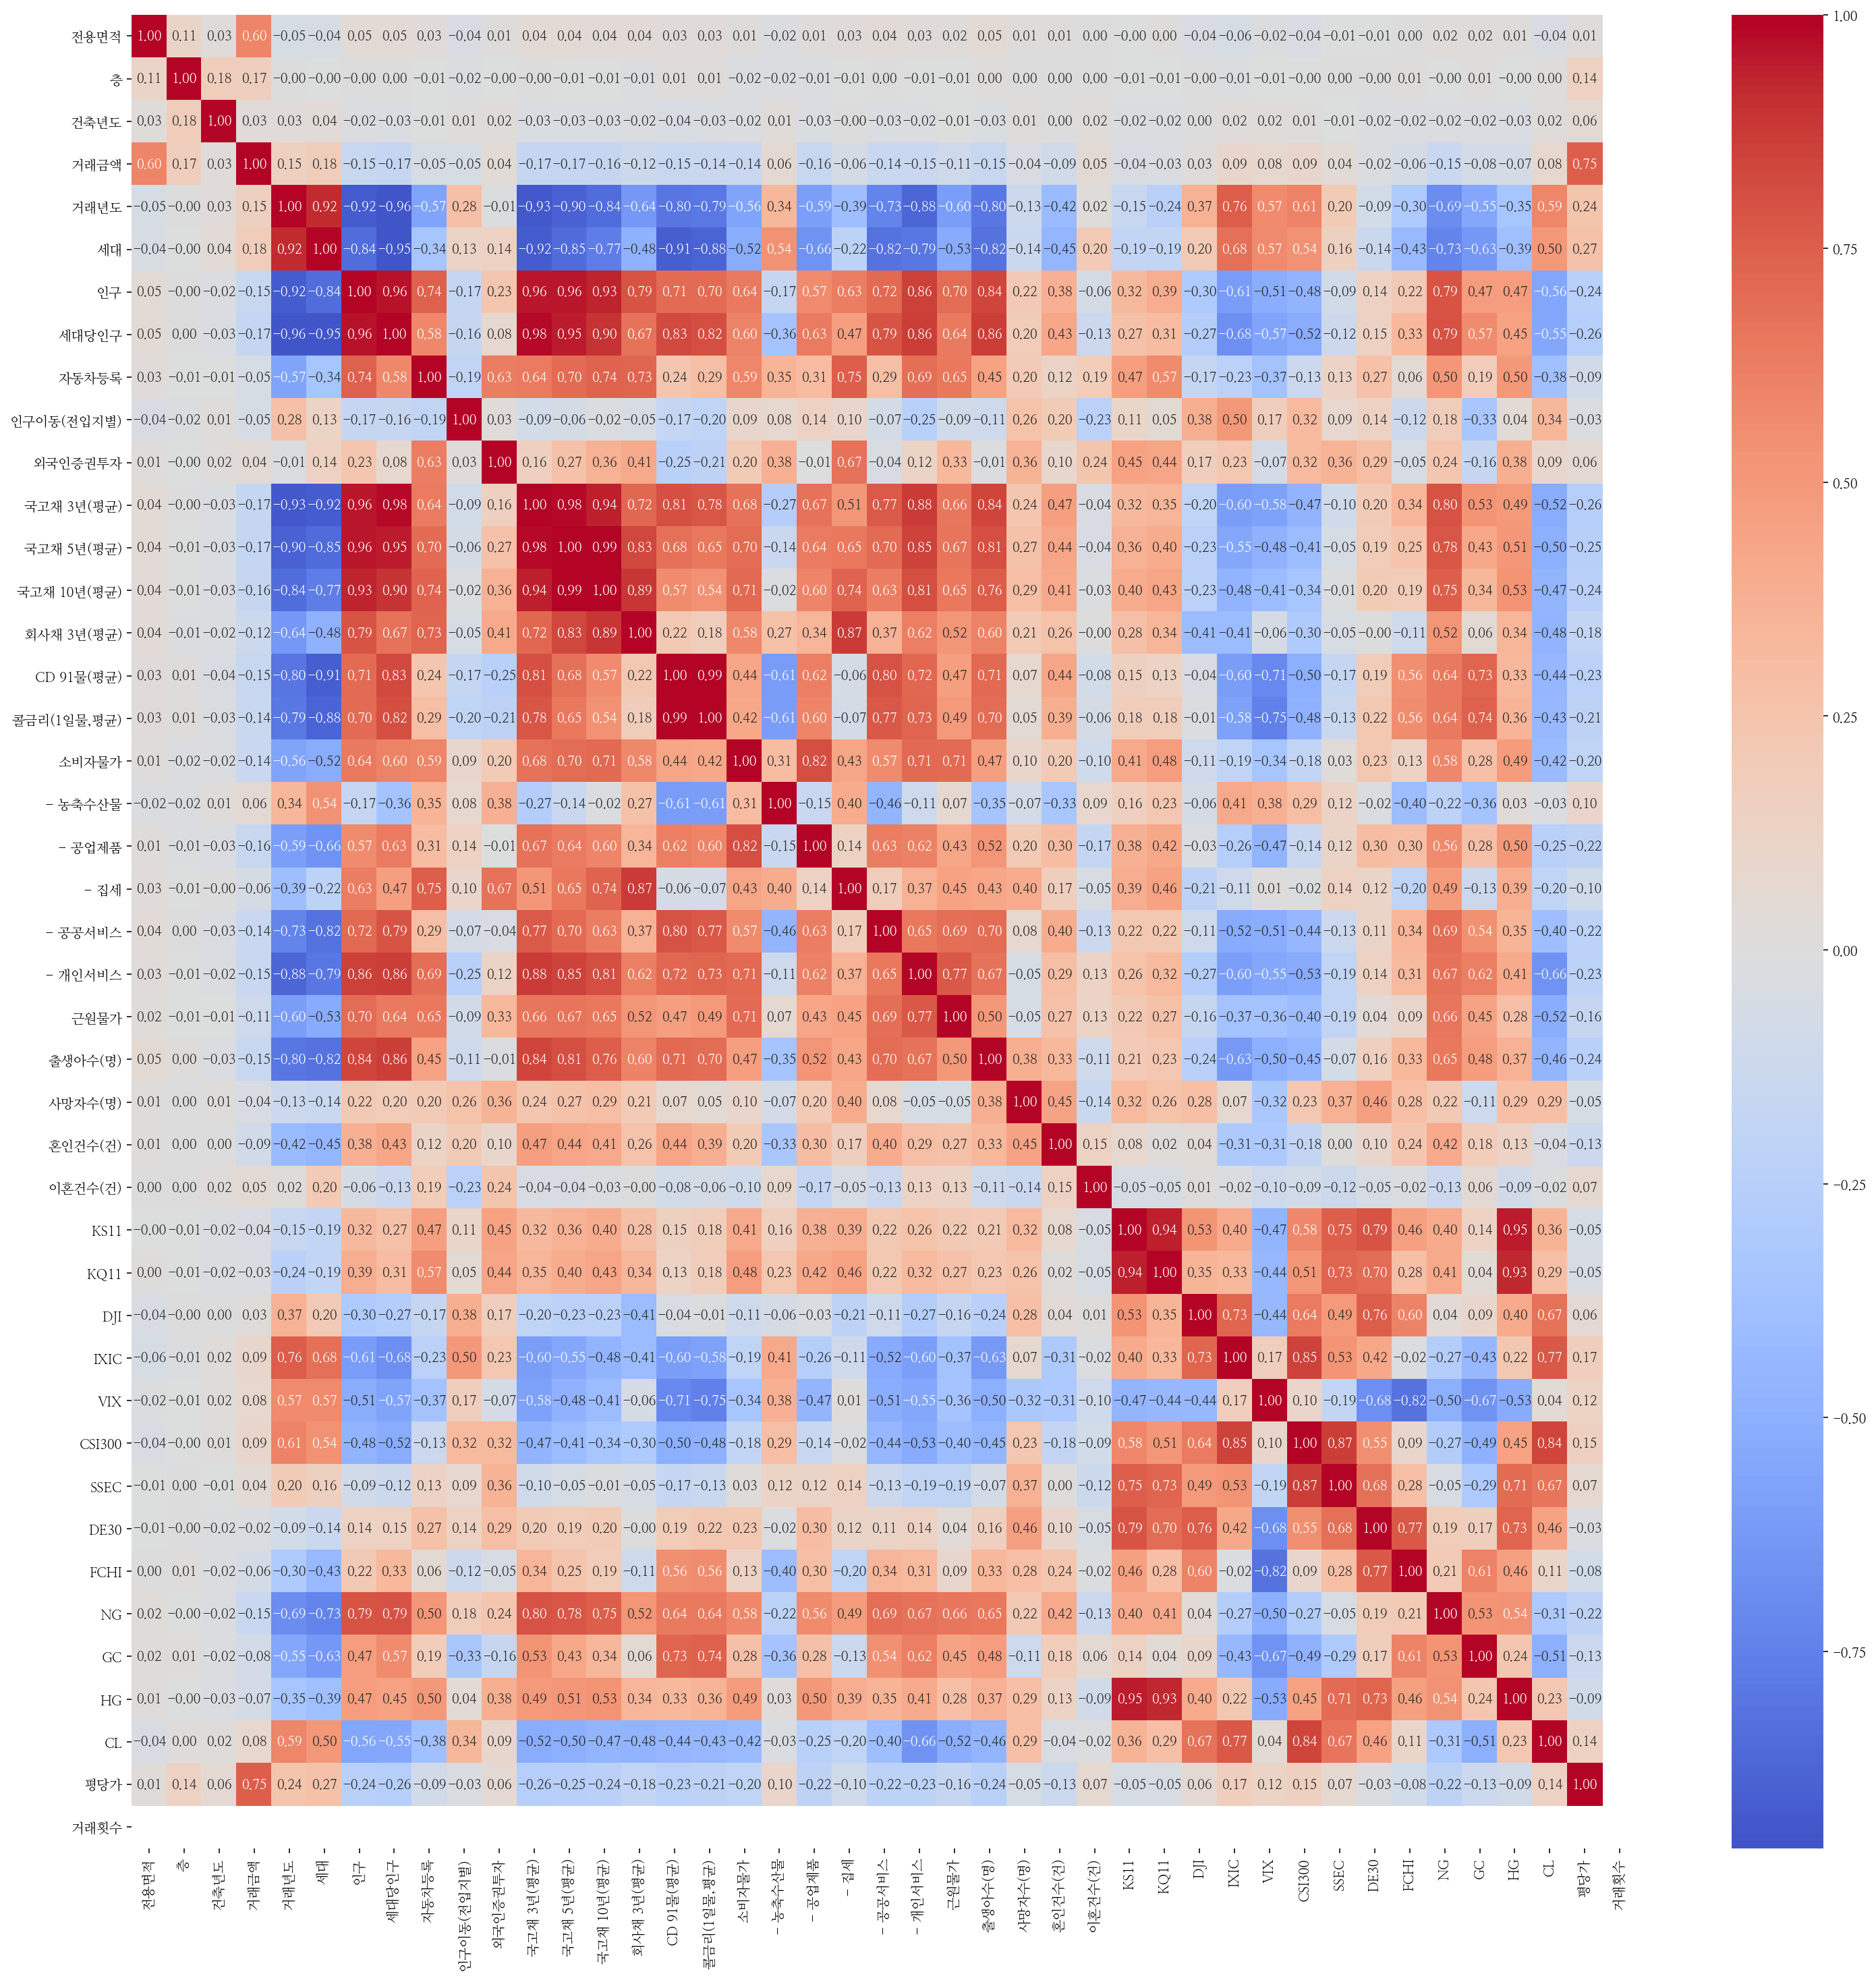

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap='coolwarm',center=0,annot=True,fmt='.2f');

## 2.6 ★ 인구vs세대당인구vs인구이동(전입지별)

### 2.6.1 인구, 세대당 인구, 인구이동 추이 시각화

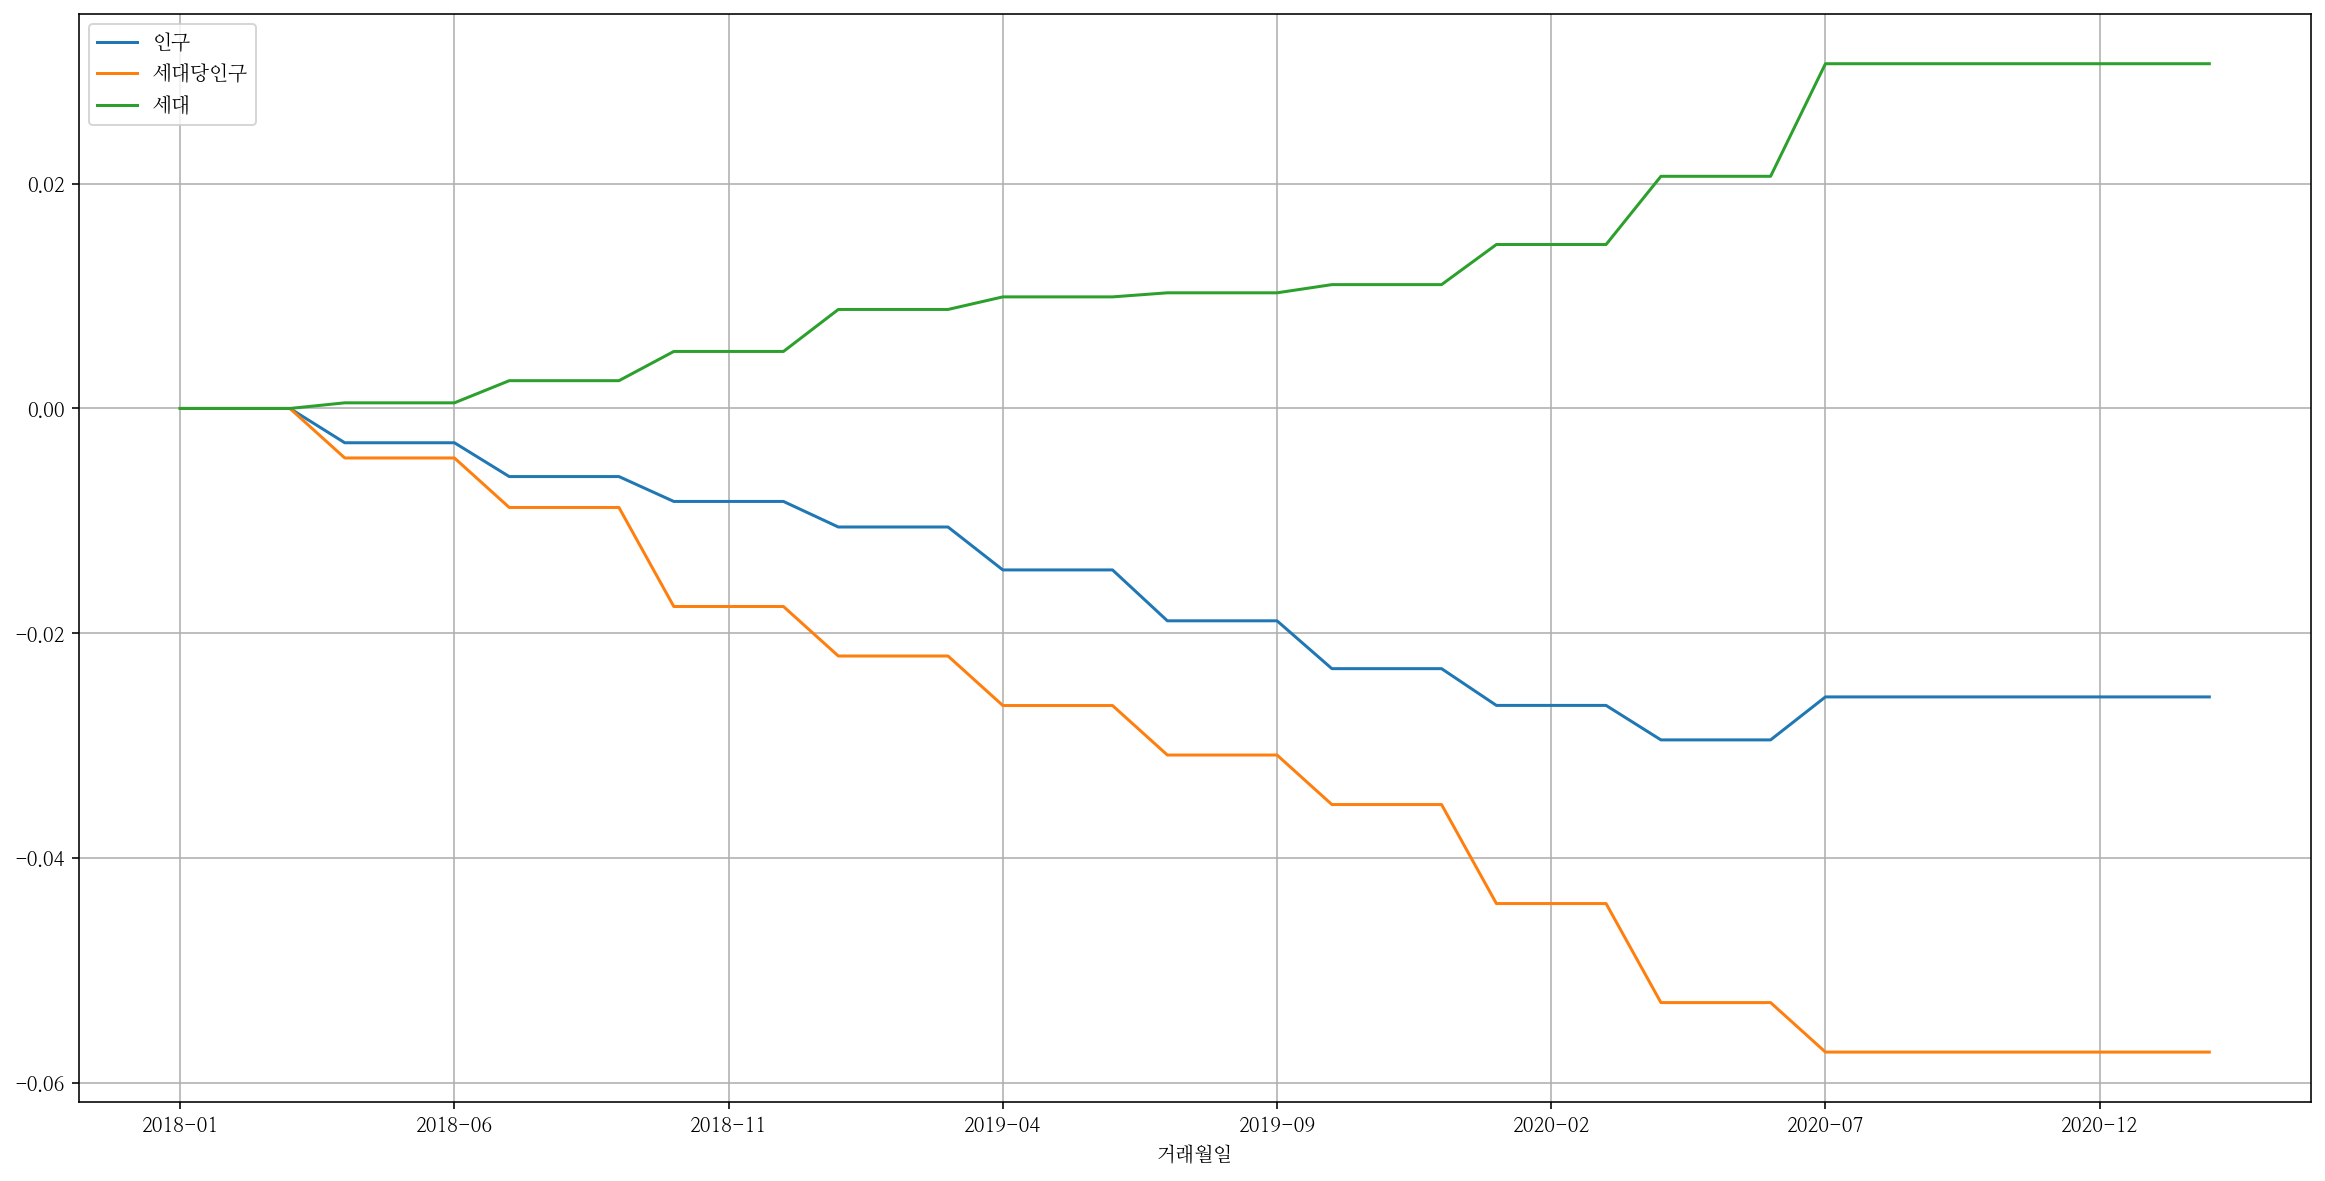

In [ ]:
df_norm[['인구','세대당인구','세대',]].plot(figsize=(20,10))

### 2.6.2 거래월일별 인구이동 시각화

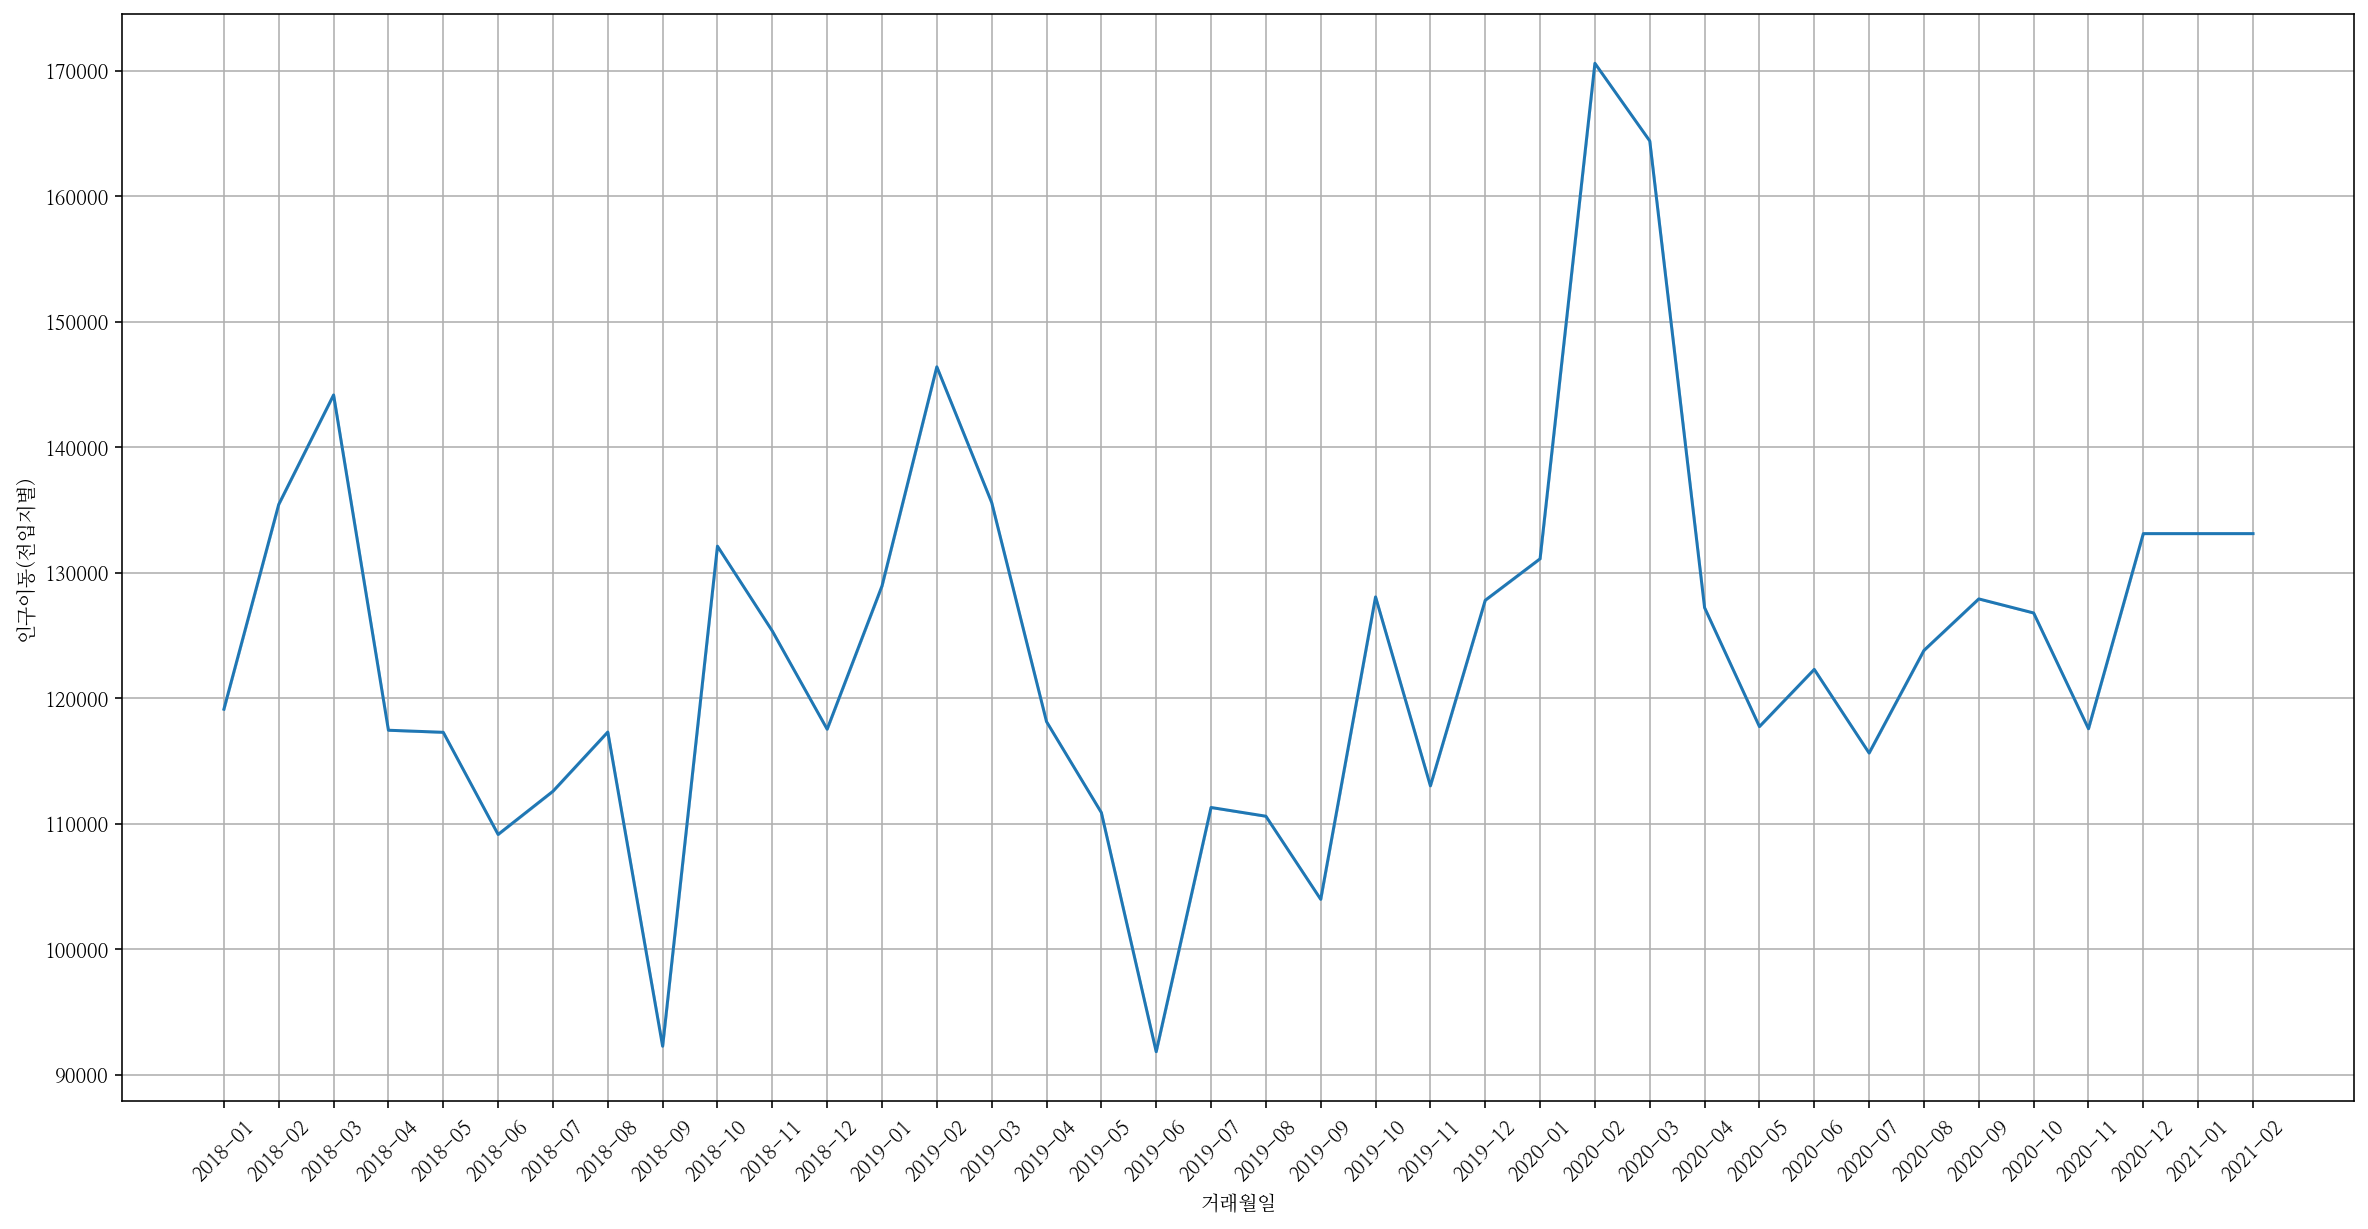

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.lineplot(data=df,x='거래월일',y='인구이동(전입지별)')

## 2.7 집값분포

### 2.7.1 집값 분포 Histogram

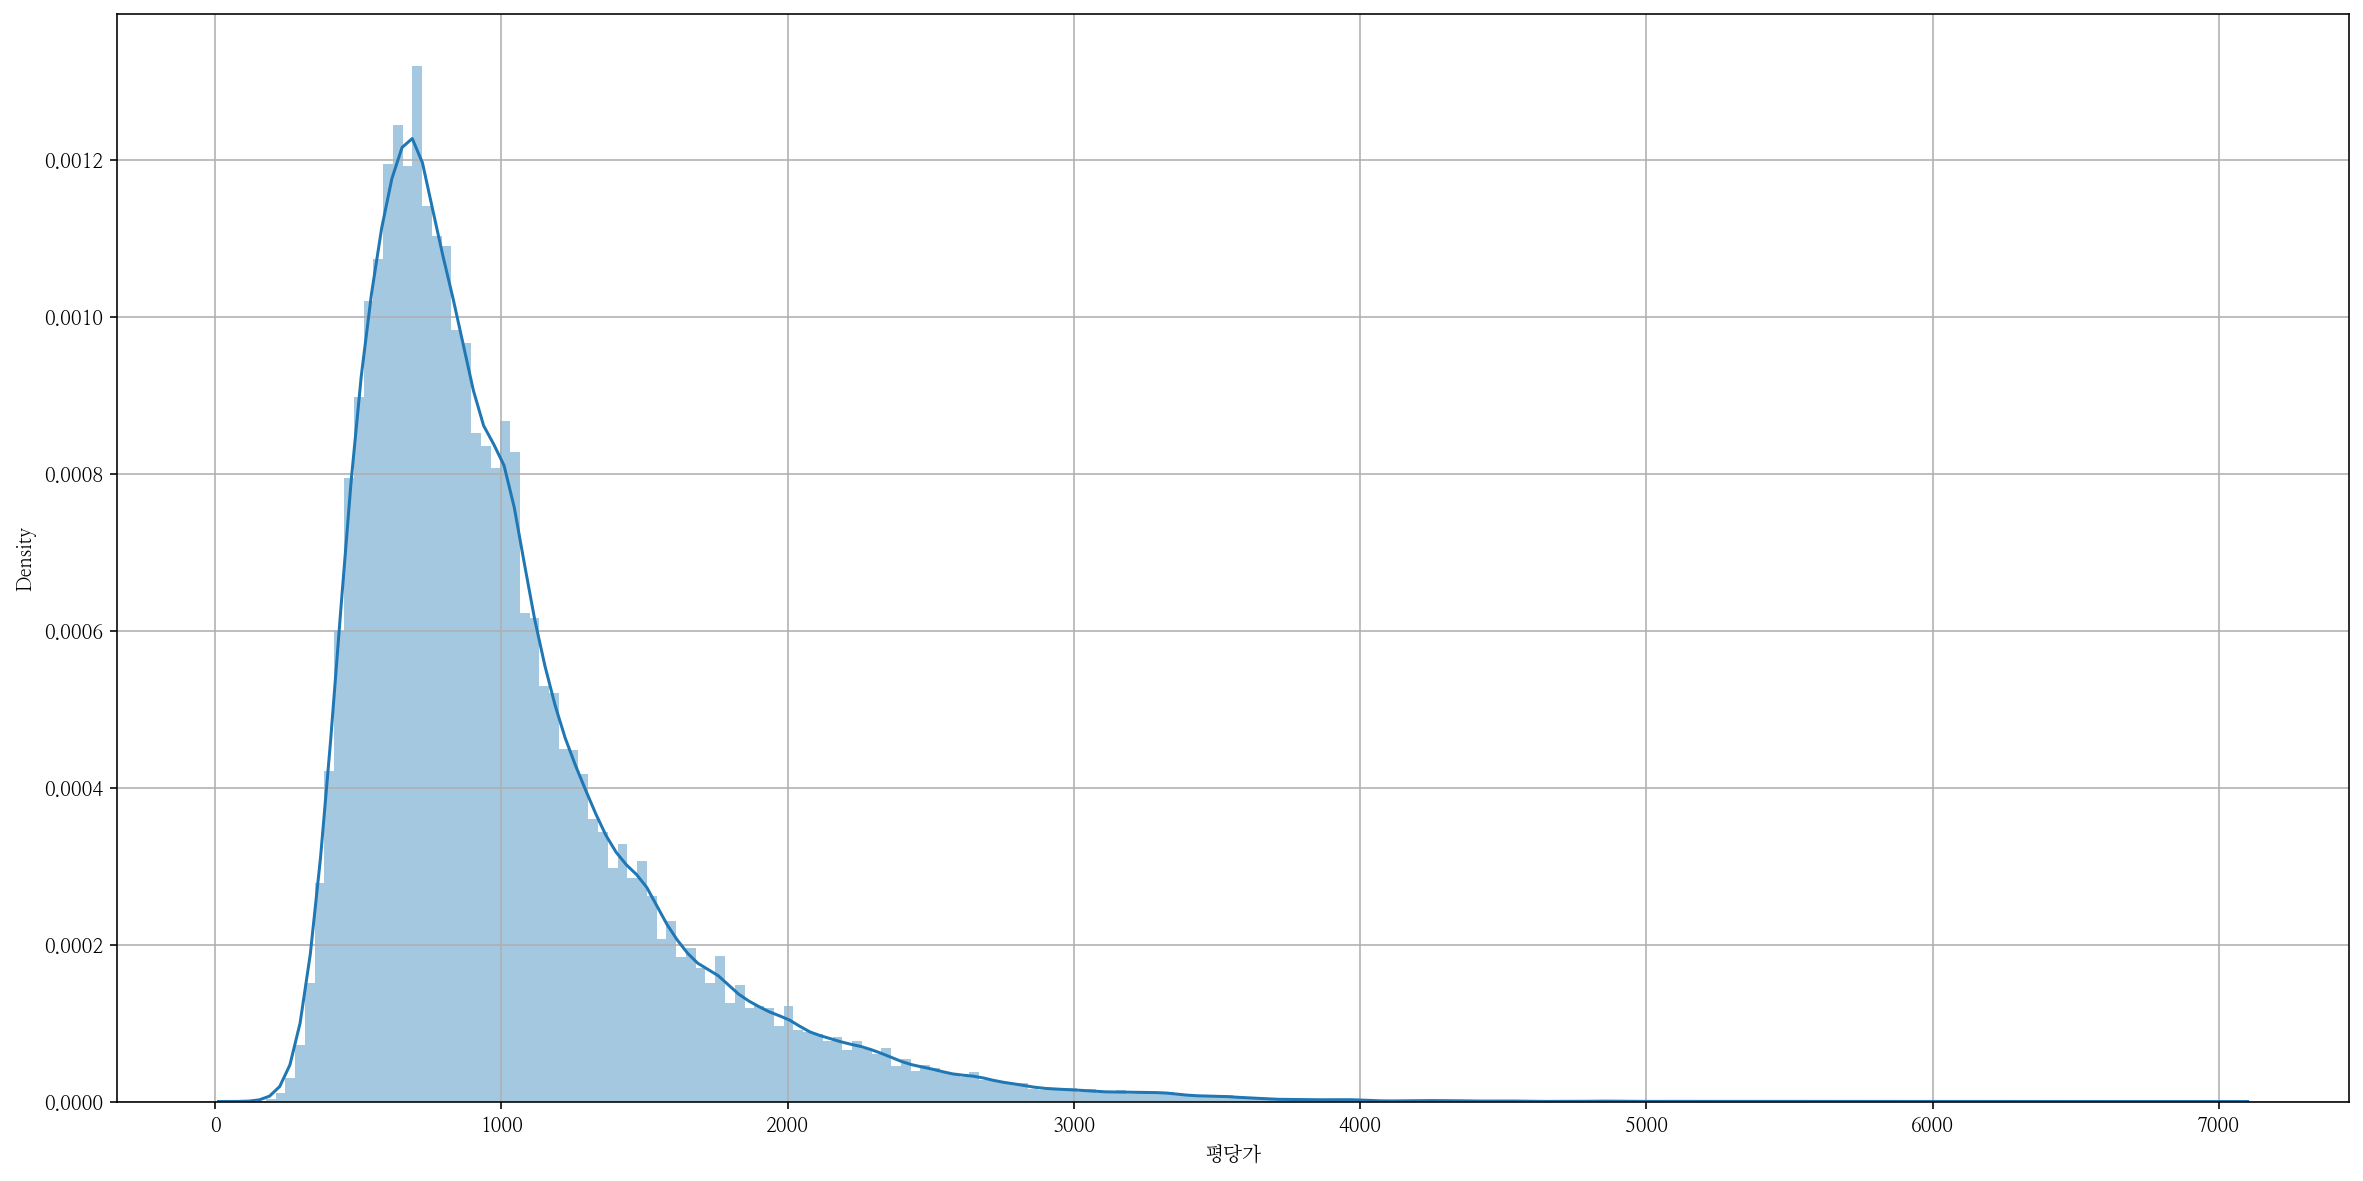

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.평당가,bins=200)

### 2.7.2 아파트별 평당가 plot

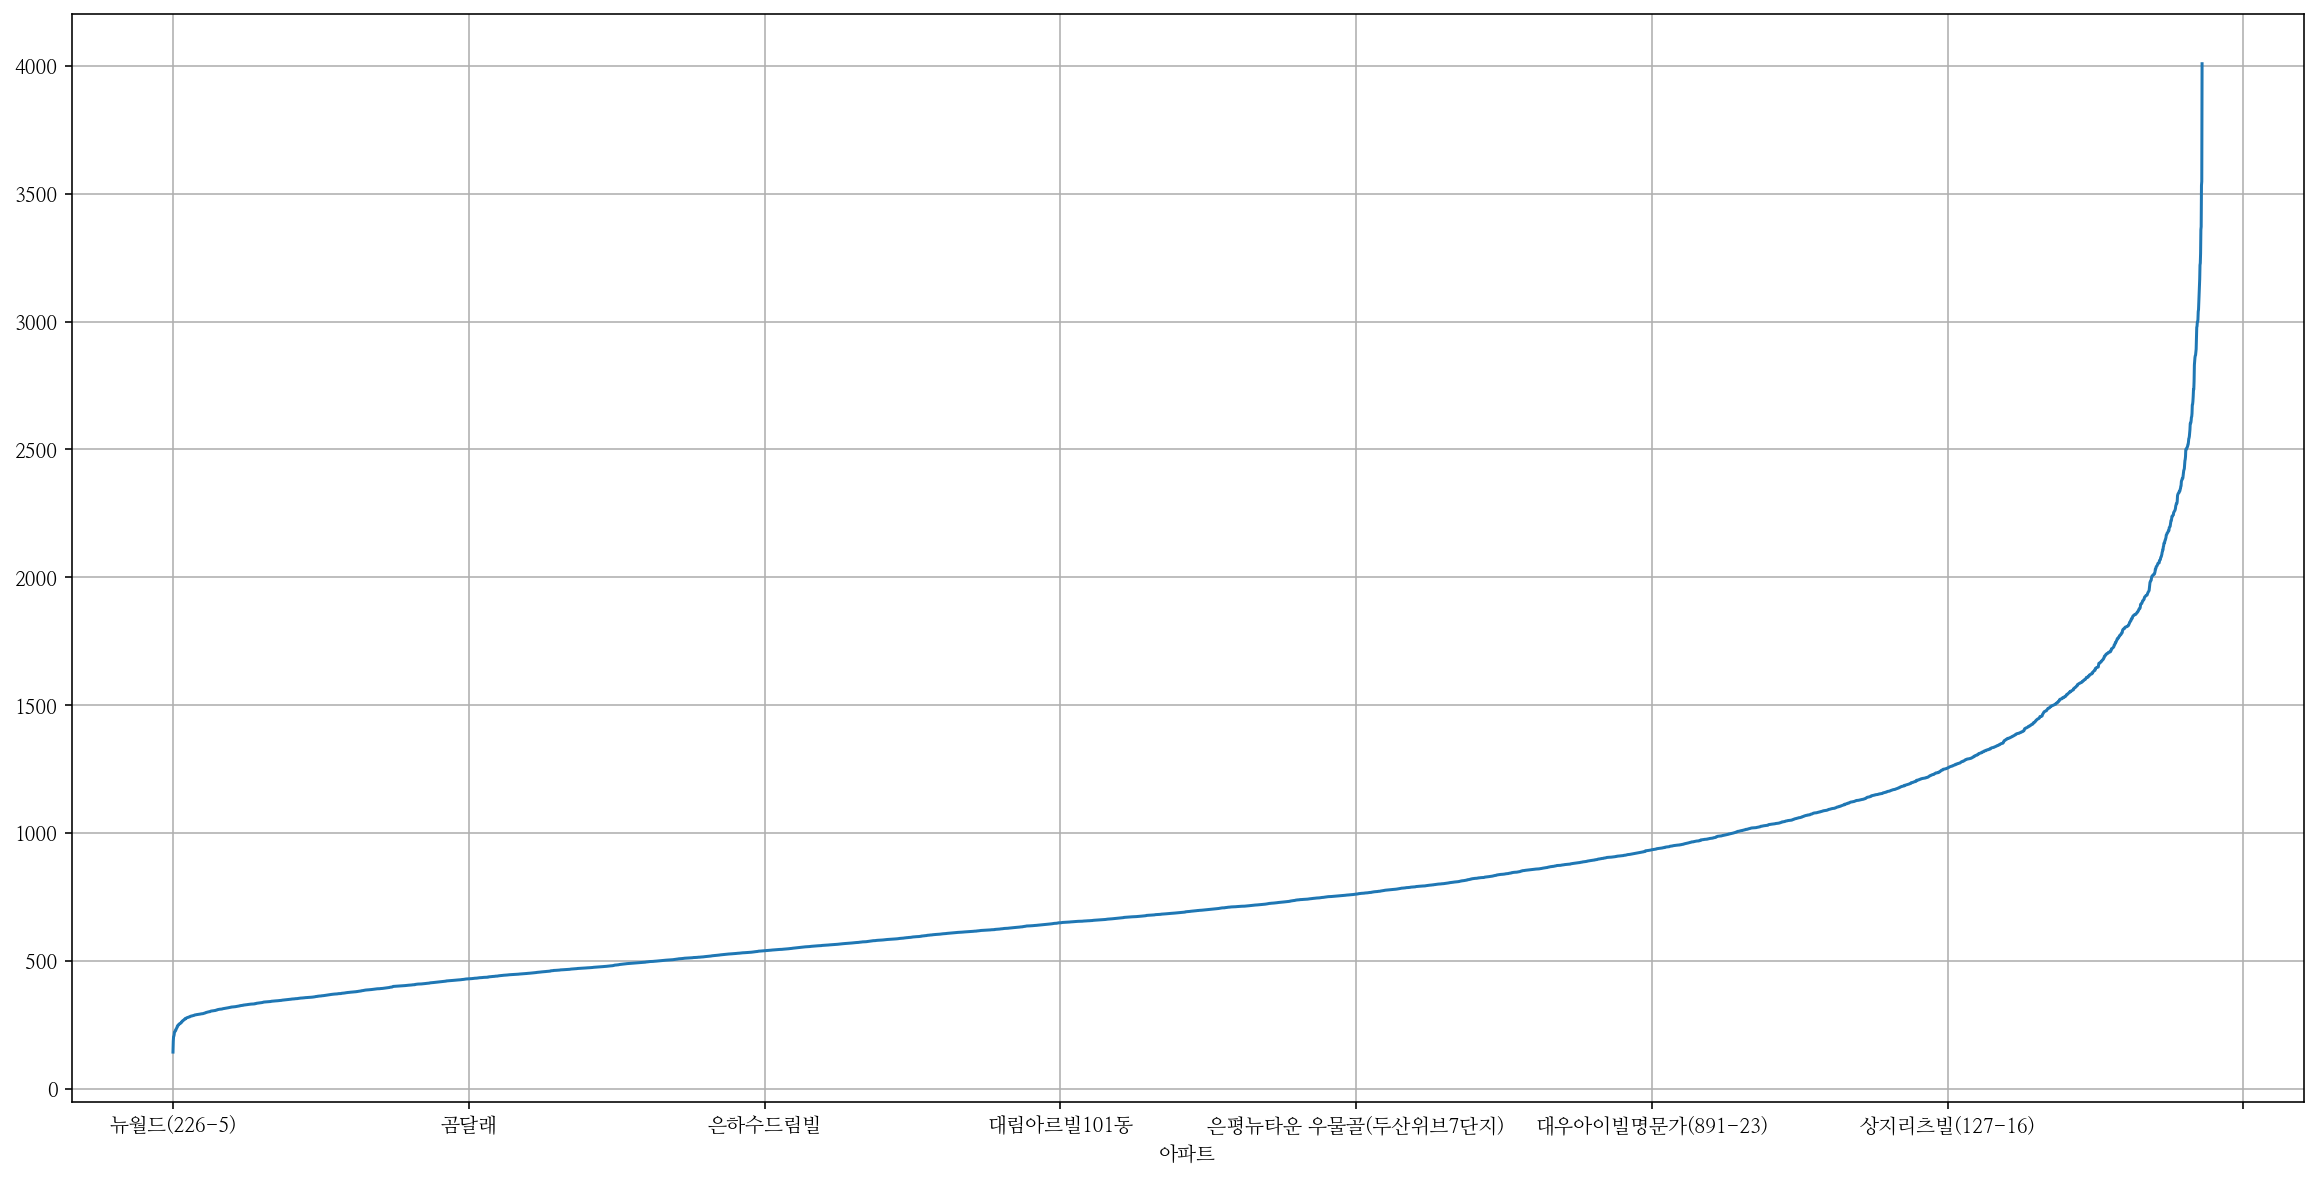

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
df.groupby('아파트').mean().sort_values('평당가').평당가.plot()

## 2.8 K Clustering

### 2.8.1 탐색

In [ ]:
df.head(1)

지역코드  법정동        아파트  지번  ...        HG        CL         평당가  거래횟수
0  종로구  내수동  경희궁의아침2단지  71  ...  3.315405  75.53619  923.426623     1

[1 rows x 48 columns]

In [ ]:
구별랭킹

평당가           거래금액   거래횟수
강남구   1965.900547  172790.735915  12265
서초구   1726.341862  163525.710964   9850
송파구   1423.073380  117229.070079  15240
용산구   1417.798535  145481.003948   4812
성동구   1266.980612   98494.772688   9344
마포구   1191.961147   90848.400701   8842
광진구   1114.909593   93132.966703   4535
동작구   1071.001067   85849.420518   8461
영등포구  1029.975473   78392.765241  10121
강동구   1027.079886   75117.814662  12399
중구    1011.835658   79091.760355   3380
양천구   1000.926721   80106.613279  11507
종로구    946.691028   74959.540149   2142
서대문구   904.409304   68237.382385   8209
강서구    859.112329   61072.219892  15021
동대문구   848.548937   59769.149452   8752
성북구    769.144509   58858.286911  12774
관악구    760.426104   54469.209824   8021
은평구    734.623953   55065.121912   9351
노원구    726.248617   45667.180333  25464
구로구    697.858907   49927.368378  13478
강북구    674.652714   49009.045639   5653
중랑구    657.136930   45164.718913   8243
금천구    634.319841   43204.616049   4860
도봉구    601.020968   41282.194681  11732

### 2.8.2 Elbow Method

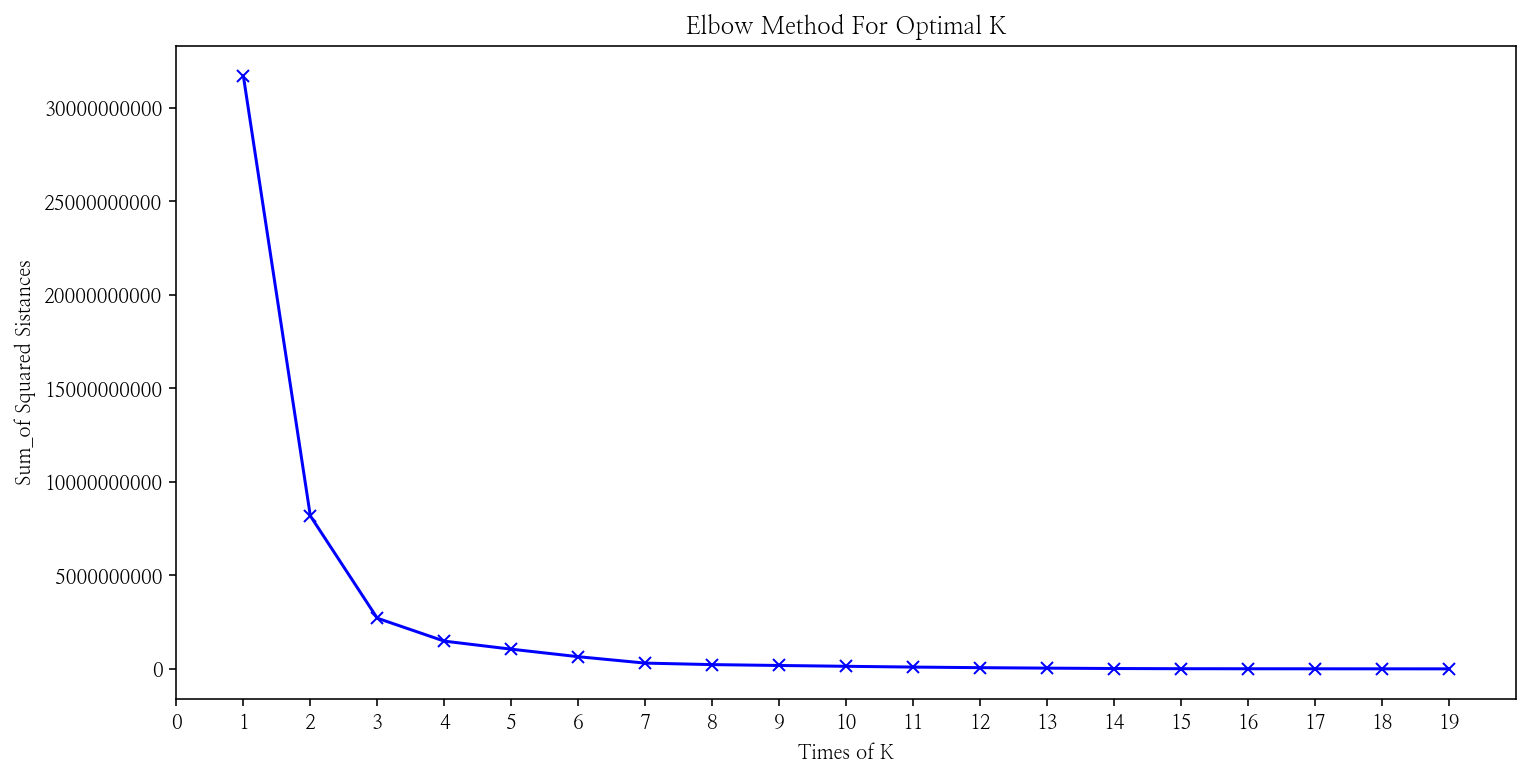

In [ ]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# df_kmeans = df_kmeans.drop('cluster',axis=1)
for n_k in range(1, 20) :
    num = KMeans(n_clusters = n_k)
    num = num.fit(구별랭킹[['평당가','거래금액']])
    sum_of_squared_distances.append(num.inertia_)

plt.figure(figsize=(12,6))

plt.xlim(0, 20)
plt.xticks(ticks=np.arange(0, 20, step=1))
plt.plot(range(1, 20), sum_of_squared_distances, 'bx-')
plt.xlabel('Times of K')
plt.ylabel('Sum_of Squared Sistances')
plt.title('Elbow Method For Optimal K')
plt.grid()
plt.show();

### 2.8.3 5-Clustering (구별 K)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(구별랭킹)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
구별랭킹['구별K'] = kmeans.labels_
구별랭킹

평당가           거래금액   거래횟수  구별K
강남구   1965.900547  172790.735915  12265    2
서초구   1726.341862  163525.710964   9850    2
송파구   1423.073380  117229.070079  15240    0
용산구   1417.798535  145481.003948   4812    2
성동구   1266.980612   98494.772688   9344    4
마포구   1191.961147   90848.400701   8842    4
광진구   1114.909593   93132.966703   4535    4
동작구   1071.001067   85849.420518   8461    4
영등포구  1029.975473   78392.765241  10121    1
강동구   1027.079886   75117.814662  12399    1
중구    1011.835658   79091.760355   3380    1
양천구   1000.926721   80106.613279  11507    1
종로구    946.691028   74959.540149   2142    1
서대문구   904.409304   68237.382385   8209    1
강서구    859.112329   61072.219892  15021    3
동대문구   848.548937   59769.149452   8752    3
성북구    769.144509   58858.286911  12774    3
관악구    760.426104   54469.209824   8021    3
은평구    734.623953   55065.121912   9351    3
노원구    726.248617   45667.180333  25464    3
구로구    697.858907   49927.368378  13478    3
강북구    674.652714   49009.045639   5653    3
중랑구    657.136930   45164.718913   8243    3
금천구    634.319841   43204.616049   4860    3
도봉구    601.020968   41282.194681  11732    3

In [ ]:
gu_mapper = {gu:k for gu,k in zip(구별랭킹.index,구별랭킹.구별K)}

In [ ]:
df['구별K'] = df['지역코드'].copy()
df['구별K'] = df['구별K'].replace(gu_mapper)

## 2.9 전용면적 vs 거래금액

### 2.9.1 구별K에 따른 평당가 분포

In [ ]:
pip install ptitprince

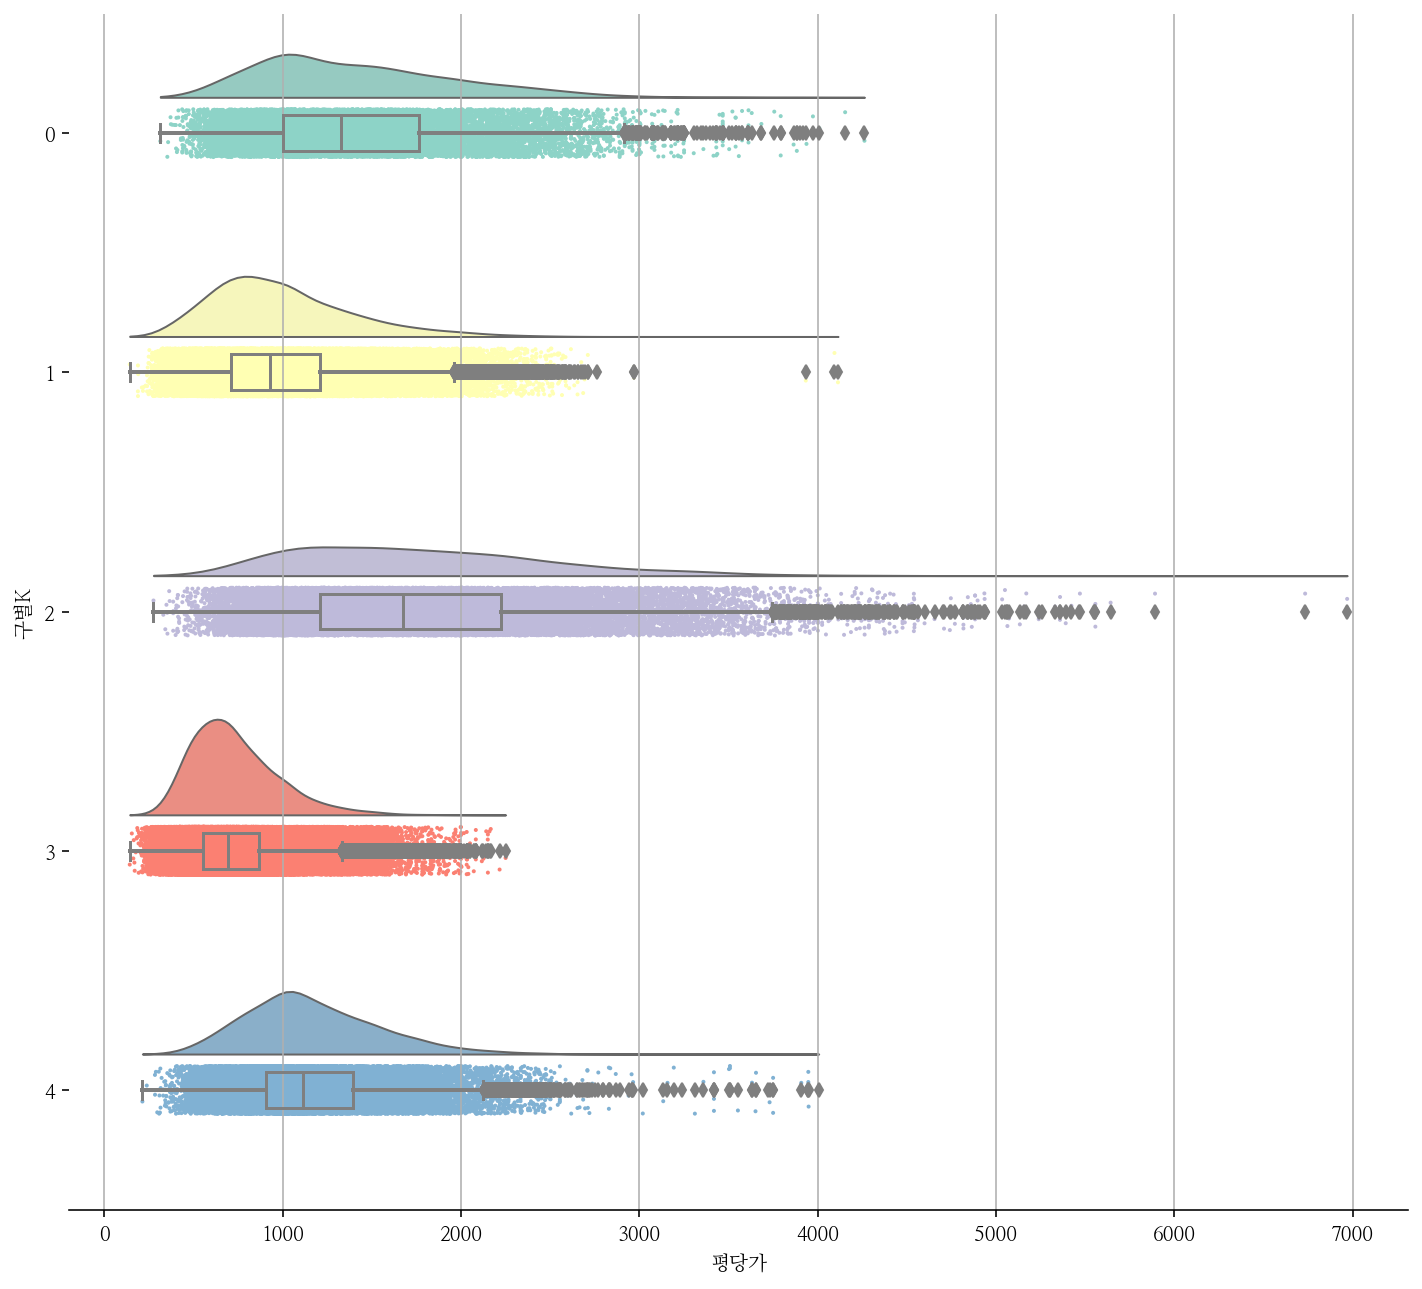

In [ ]:
from ptitprince import PtitPrince as pt

f, ax = plt.subplots(figsize=(12, 11))

dx="평당가"; dy="구별K"; ort="h"
ax=pt.half_violinplot(data=df, palette="Set3", bw=.2,  linewidth=1,cut=0.,\
                   scale="area", width=.8, inner=None,orient=ort,x=dx,y=dy)
ax=sns.stripplot(data=df, palette="Set3", edgecolor="white",size=2,orient=ort,\
                 x=dx,y=dy,jitter=1,zorder=0)
ax=sns.boxplot(data=df, color="#d4d4d4",orient=ort,width=.15,x=dx,y=dy,zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1)

# Finalize the figure
#ax.set(ylim=(3.5, -.7))
sns.despine(left=True)

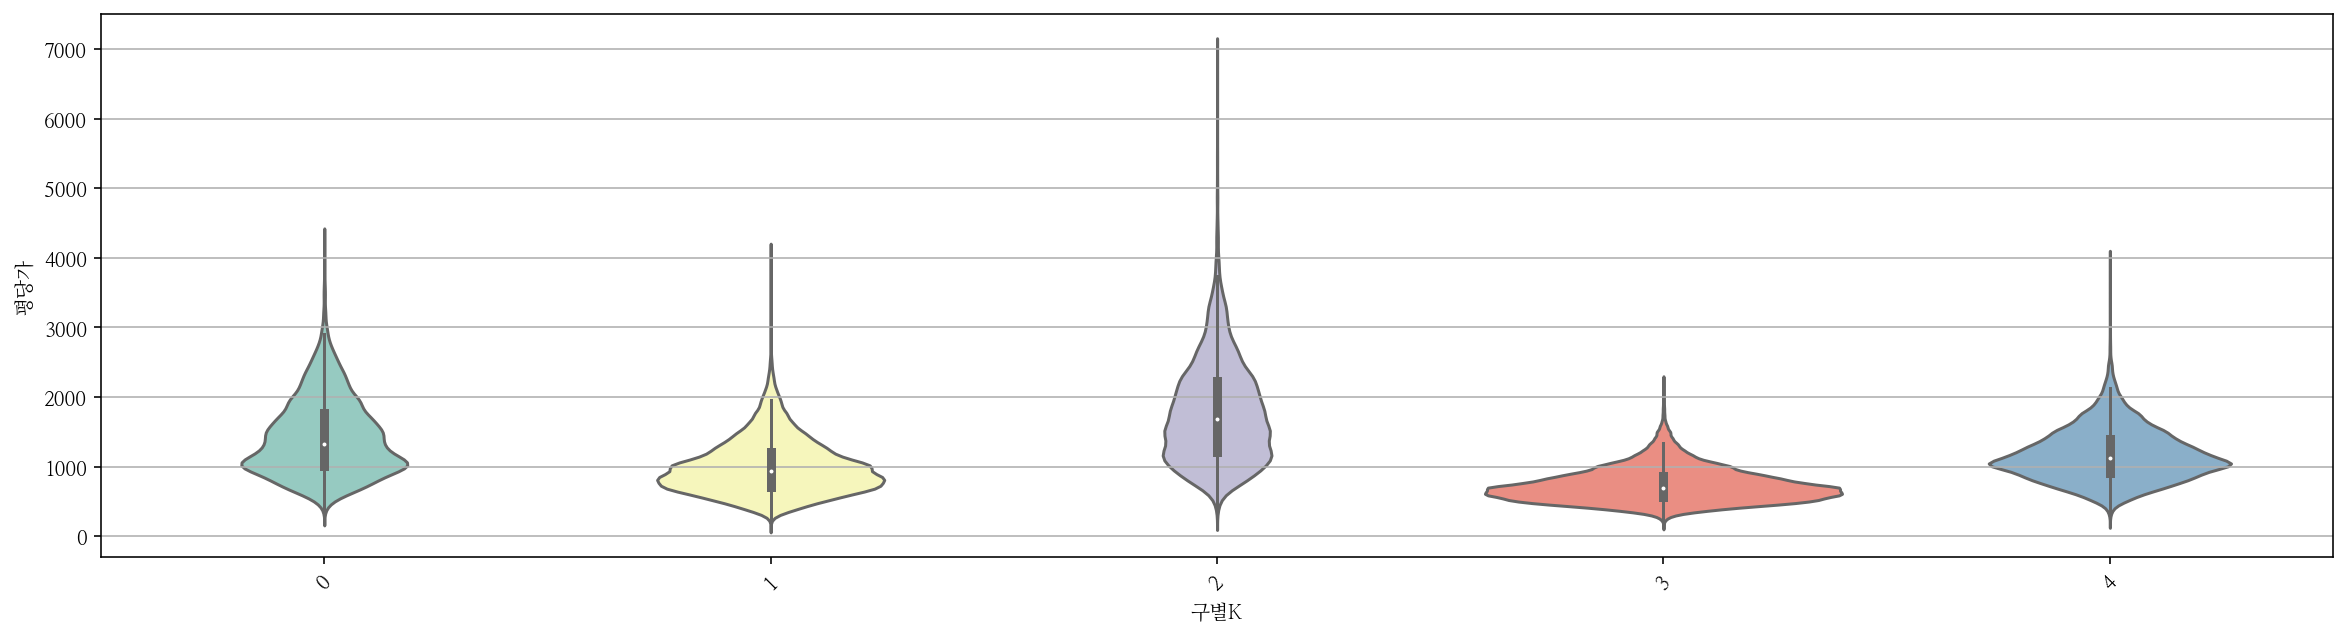

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.violinplot('구별K','평당가',data=df,palette="Set3");

### 2.9.2 지역코드에 따른 평당가 Boxplot

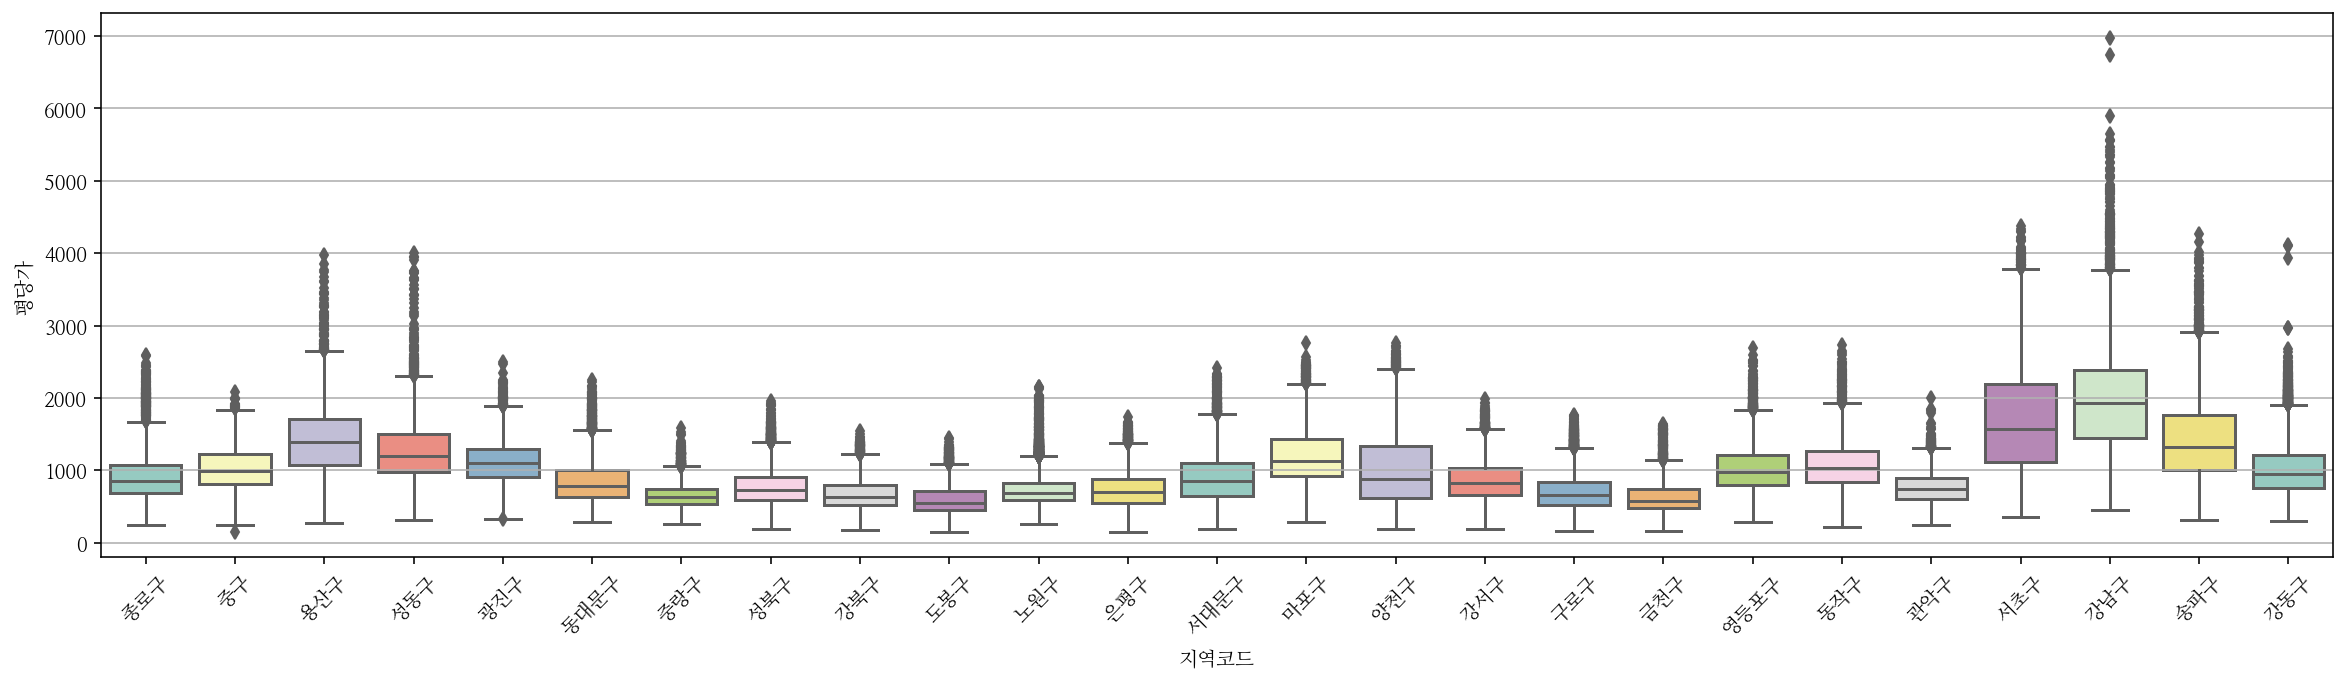

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot('지역코드','평당가',data=df,palette="Set3");

### 2.9.3 거래월일에 따른 평당가 분포

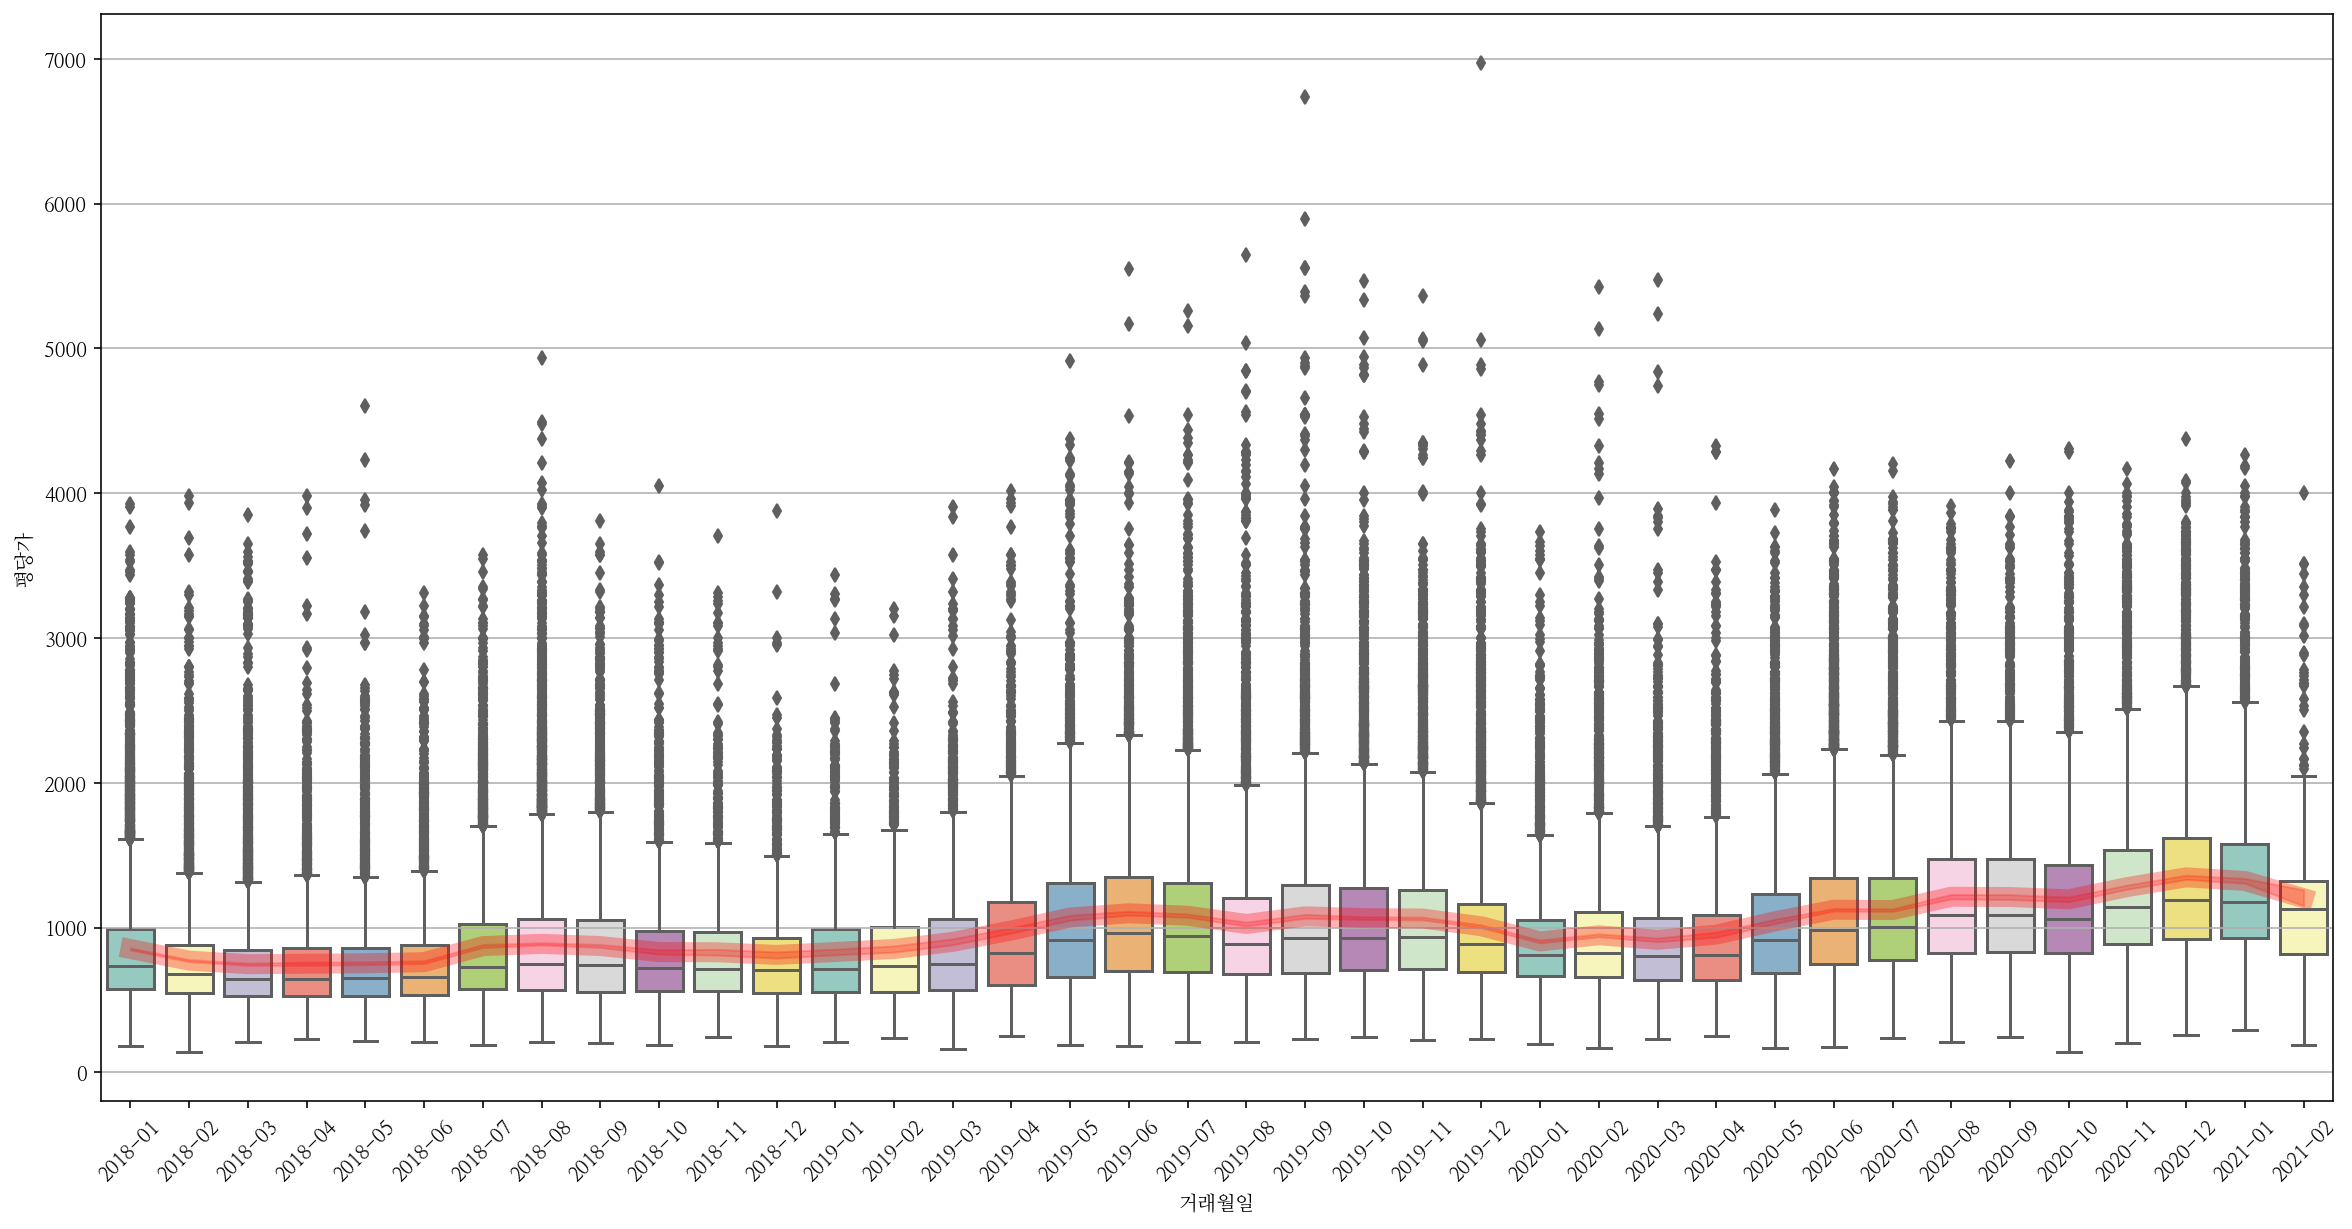

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot('거래월일','평당가',data=df,palette="Set3")
sns.lineplot(data=df,x='거래월일',y='평당가',color='r',linewidth=10,alpha=0.3);

### 2.9.4 건축년도에 따른 평당가 산점도 (hue=구별K)

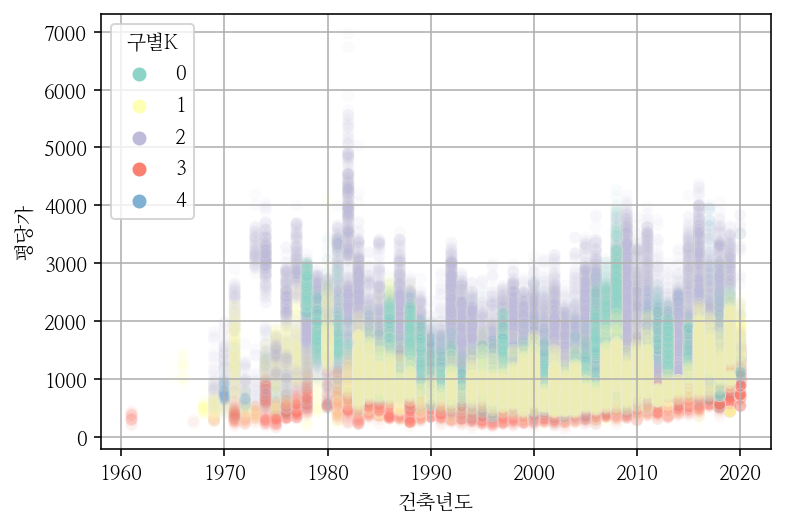

In [ ]:
sns.scatterplot('건축년도','평당가',hue='구별K',data=df,palette="Set3",alpha=0.05)

### 2.9.5 전용면적에 따른 평당가 산점도 (hue=구별K)

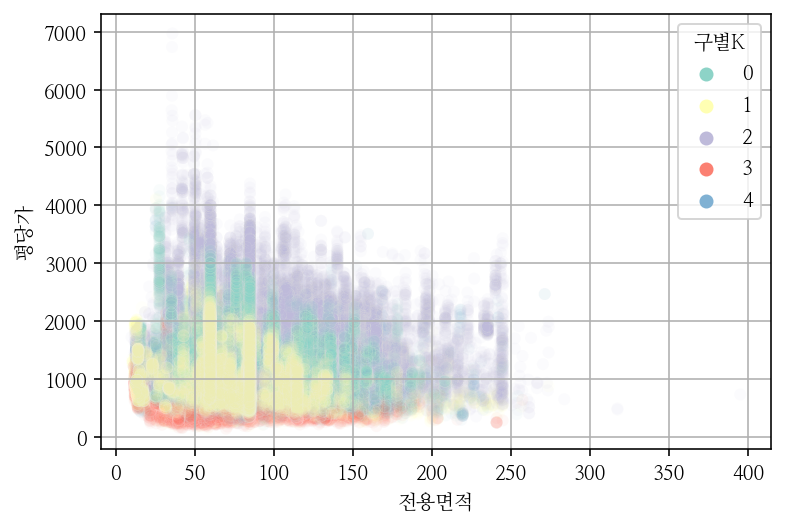

In [ ]:
sns.scatterplot('전용면적','평당가',hue='구별K',data=df,palette="Set3",alpha=0.05)

### 2.9.6 건축년도에 따른 거래금액 산점도 (hue=구별K)

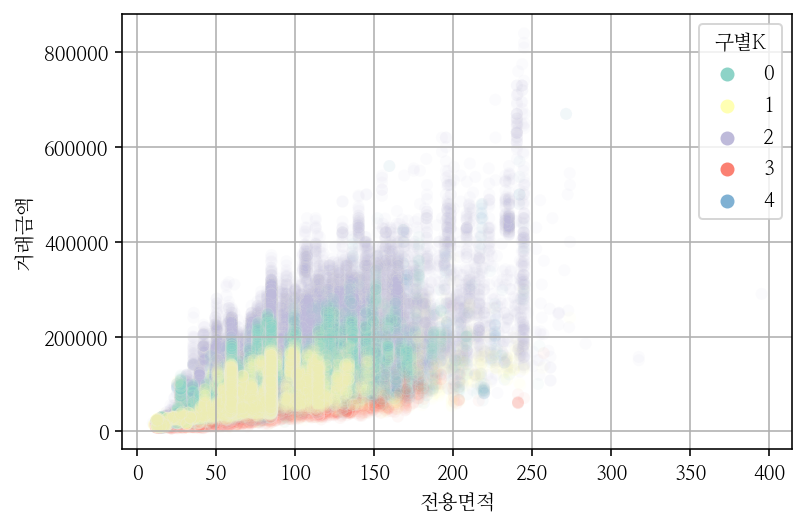

In [ ]:
sns.scatterplot('전용면적','거래금액',hue='구별K',data=df,palette="Set3",alpha=0.05)

### 2.9.7 거래금액 따른 평당가 산점도 (hue=구별K)

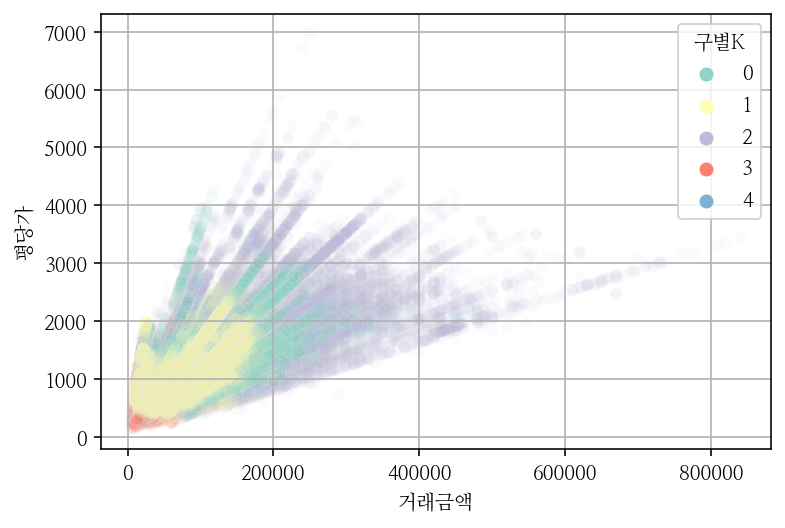

In [ ]:
sns.scatterplot('거래금액','평당가',hue='구별K',data=df,palette="Set3",alpha=0.05)